In [1]:
from utils import *
from seaborn import heatmap

In [2]:
path_simus = Path('./preprocessing/')
path_index = path_simus / 'index.parquet'

In [3]:
index = pl.read_parquet(path_index)
len(index)

2160

In [4]:
percentiles = [0.99, 0.90, 0.75, 0.50, 0.25, 0.10, 0.01]

# Check runs counts (and lengths)

In [5]:
paths = [str(path) for path in path_simus.glob('[0-9]*.parquet')]
paths = pl.DataFrame(paths, schema=['path_preprocessing'])
not_run = index.join(paths, on='path_preprocessing', how='anti')
print(len(index), len(paths), len(index.join(paths, on='path_preprocessing', how='inner')), len(not_run))

2160 2160 2160 0


In [6]:
# lengths = [
#     (path, pl.scan_parquet(path).select(pl.len()).collect().item())
#     for path in paths.to_series()
# ]
# lengths = pl.DataFrame(lengths, schema=['path_preprocessing', 'len'])
# lenghts = lengths.join(index, on='path_preprocessing', how='left')
# lenghts.describe()

In [7]:
paths = [str(path) for path in path_simus.glob('metric_[0-9]*.parquet')]
paths = pl.DataFrame(paths, schema=['path_preprocessing'])
print(len(index), len(paths))

2160 2160


# Look at metrics

In [8]:
metrics_and_params = (
    pl.scan_parquet(path_simus.glob('metric_[0-9]*.parquet'))
    .join(index.lazy(), on='path_preprocessing', how='left')
    .collect()
)
parts = (
    metrics_and_params
    .partition_by('first_step', 'third_step', as_dict=True)
)

('do_nothing', 'do_nothing')


<Figure size 900x500 with 0 Axes>

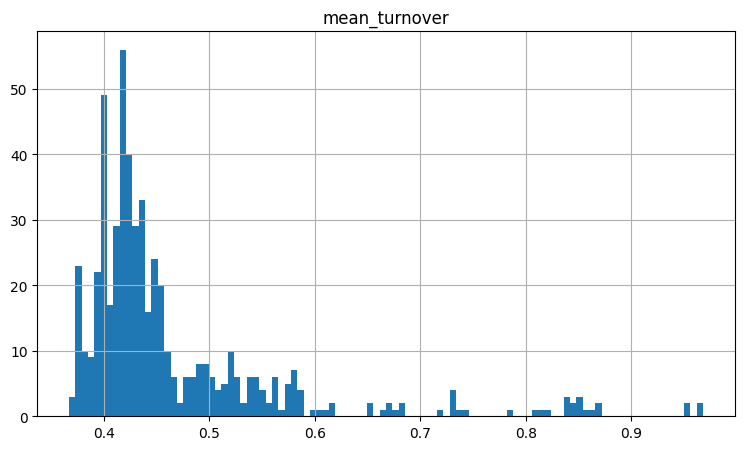

       mean_turnover
count     540.000000
mean        0.465182
std         0.103207
min         0.366909
25%         0.409318
50%         0.428571
75%         0.481977
max         0.967950
('do_nothing', 'rank_scale')


<Figure size 900x500 with 0 Axes>

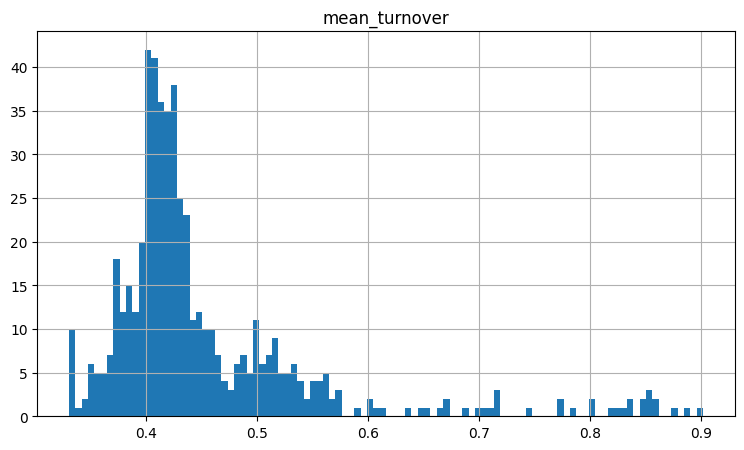

       mean_turnover
count     540.000000
mean        0.453786
std         0.100045
min         0.330831
25%         0.402615
50%         0.422454
75%         0.470201
max         0.901715
('get_leverage_one', 'do_nothing')


<Figure size 900x500 with 0 Axes>

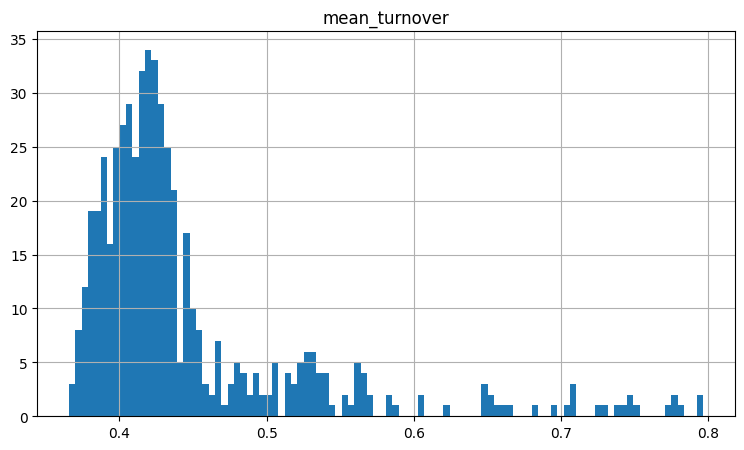

       mean_turnover
count     540.000000
mean        0.445740
std         0.078380
min         0.365822
25%         0.401979
50%         0.421562
75%         0.449100
max         0.796586
('get_leverage_one', 'rank_scale')


<Figure size 900x500 with 0 Axes>

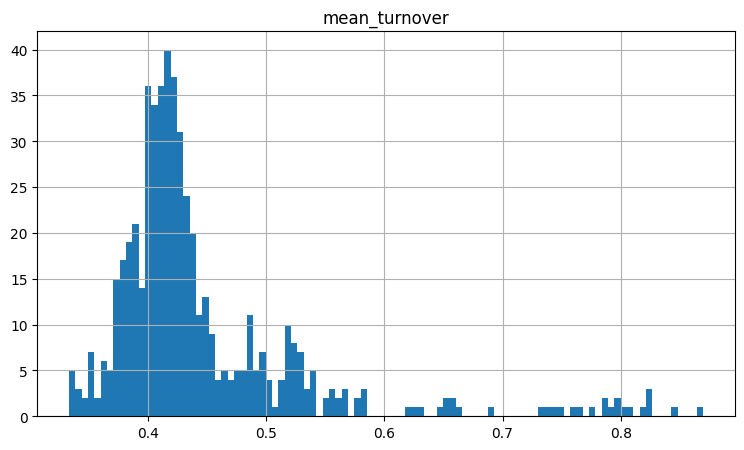

       mean_turnover
count     540.000000
mean        0.446100
std         0.088408
min         0.333082
25%         0.400147
50%         0.419779
75%         0.455227
max         0.869773


In [9]:
metric = 'mean_turnover'
for names, values in parts.items():
    print(names)
    vals = values.select(metric).to_pandas()
    plt.figure()
    vals.hist(bins=100)
    plt.show()
    print(vals.describe())

('do_nothing', 'do_nothing')


<Figure size 900x500 with 0 Axes>

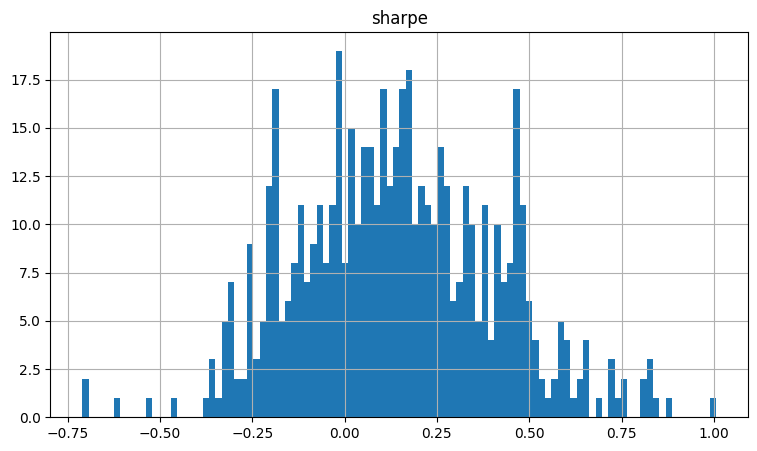

           sharpe
count  540.000000
mean     0.141616
std      0.269091
min     -0.710398
25%     -0.046675
50%      0.132481
75%      0.324514
max      1.006607
('do_nothing', 'rank_scale')


<Figure size 900x500 with 0 Axes>

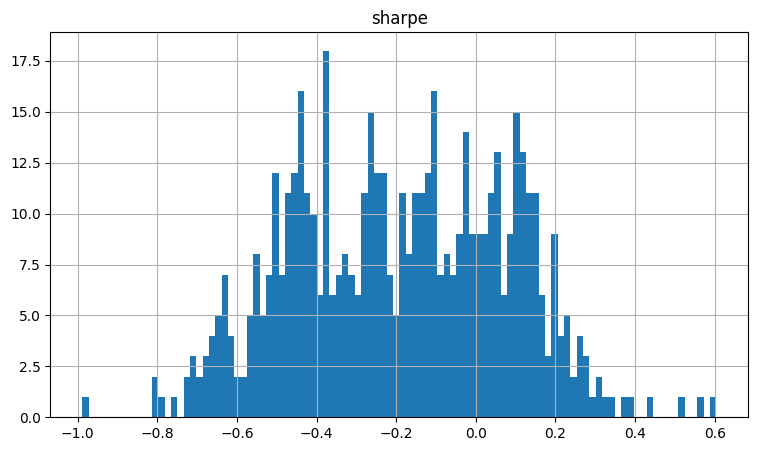

           sharpe
count  540.000000
mean    -0.189390
std      0.269869
min     -0.988463
25%     -0.410411
50%     -0.183370
75%      0.030955
max      0.603817
('get_leverage_one', 'do_nothing')


<Figure size 900x500 with 0 Axes>

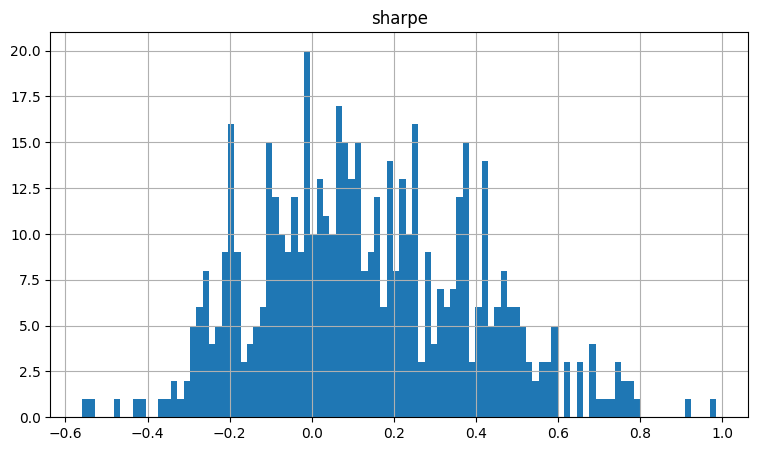

           sharpe
count  540.000000
mean     0.135394
std      0.262406
min     -0.559161
25%     -0.052316
50%      0.107922
75%      0.324297
max      0.985303
('get_leverage_one', 'rank_scale')


<Figure size 900x500 with 0 Axes>

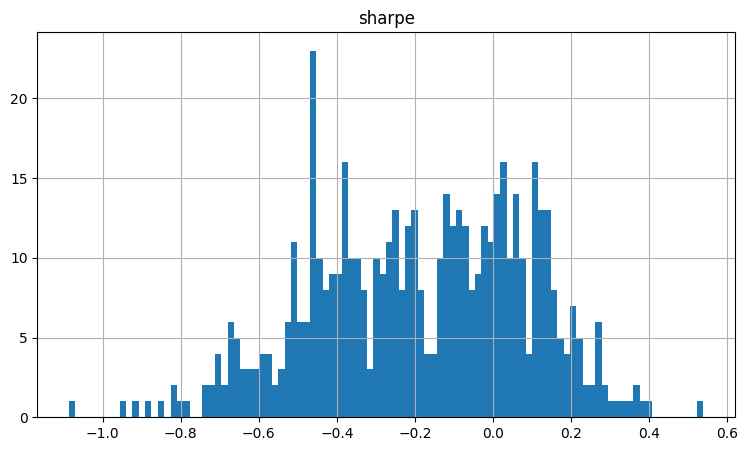

           sharpe
count  540.000000
mean    -0.187837
std      0.273005
min     -1.085867
25%     -0.399980
50%     -0.178201
75%      0.029797
max      0.538043


In [10]:
metric = 'sharpe'
for names, values in parts.items():
    print(names)
    vals = values.select(metric).to_pandas()
    plt.figure()
    vals.hist(bins=100)
    plt.show()
    print(vals.describe())

# Look at stability for (do_nothing, do_nothing)

In [11]:
nothing_done = (
    metrics_and_params
    .filter(pl.col('first_step') == 'do_nothing')
    .filter(pl.col('third_step') == 'do_nothing')
    .with_columns(pl.col([pl.Float32, pl.Float64]).round(2))
)
hyperparameters_names = ['formation_length', 't_max', 'n_stocks', 'window']
assert are_keys(nothing_done, hyperparameters_names)[0]

****************************************************************************************************
('formation_length', 't_max')


{'n_stocks': 100, 'window': 4}
(-0.25, 0.8)


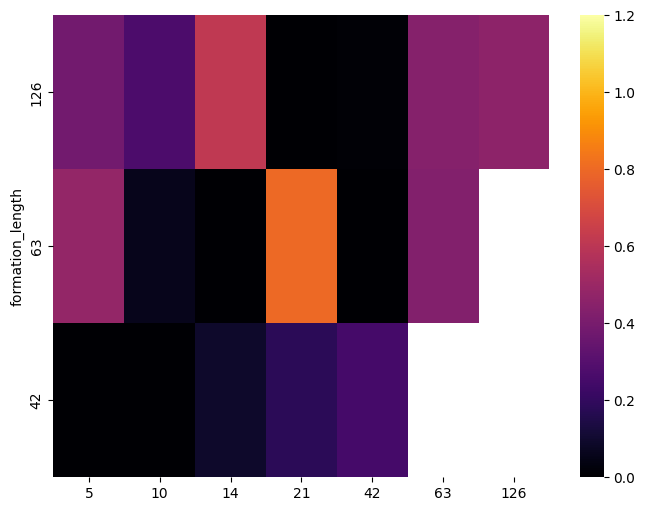

{'n_stocks': 10, 'window': 10}
(-0.2, 0.76)


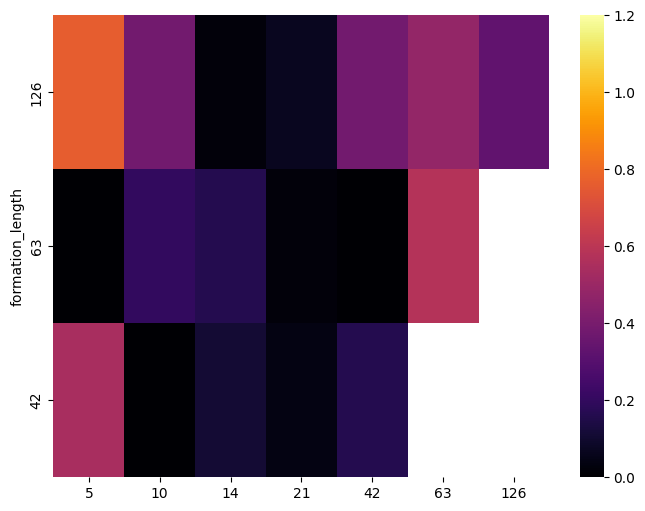

{'n_stocks': 100, 'window': 14}
(-0.32, 1.01)


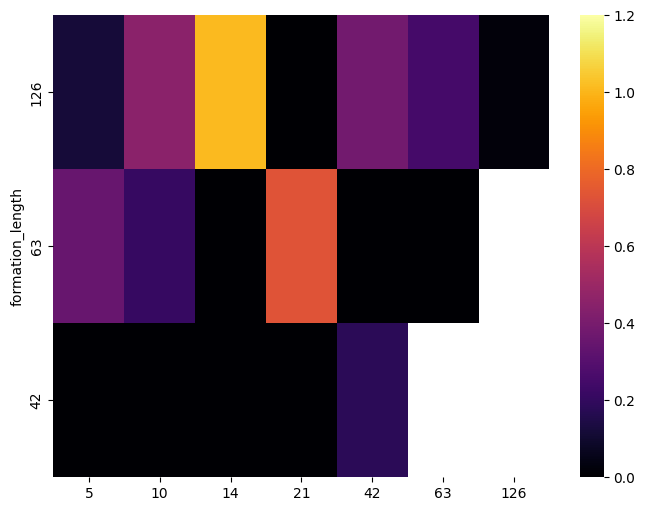

{'n_stocks': 100, 'window': 5}
(-0.36, 0.76)


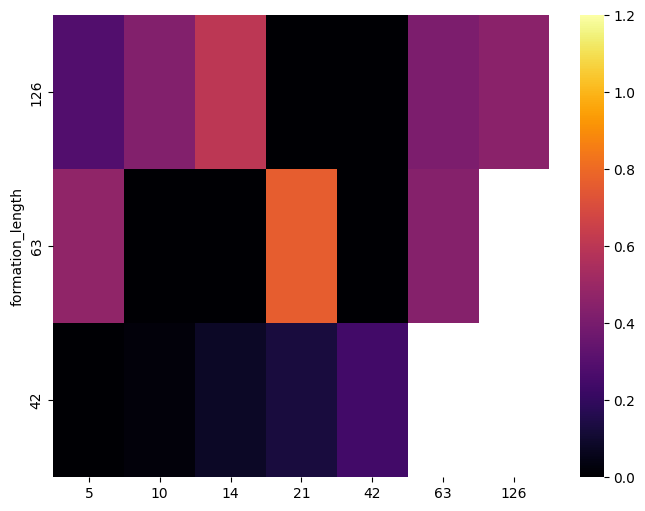

{'n_stocks': 10, 'window': 42}
(-0.7, 0.5)


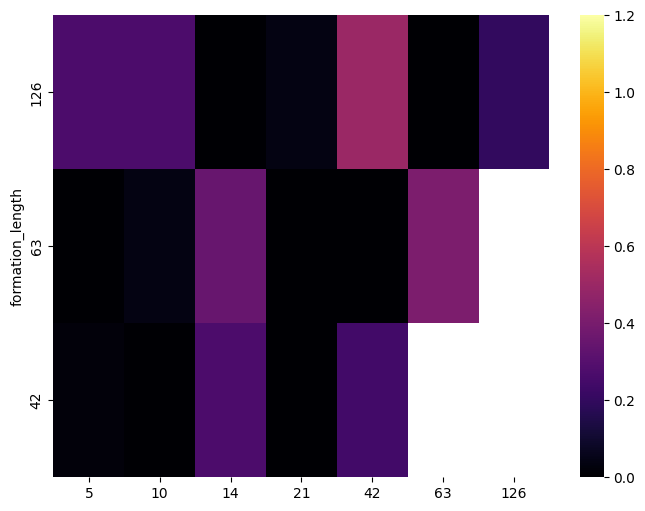

{'n_stocks': 10, 'window': 63}
(-0.32, 0.89)


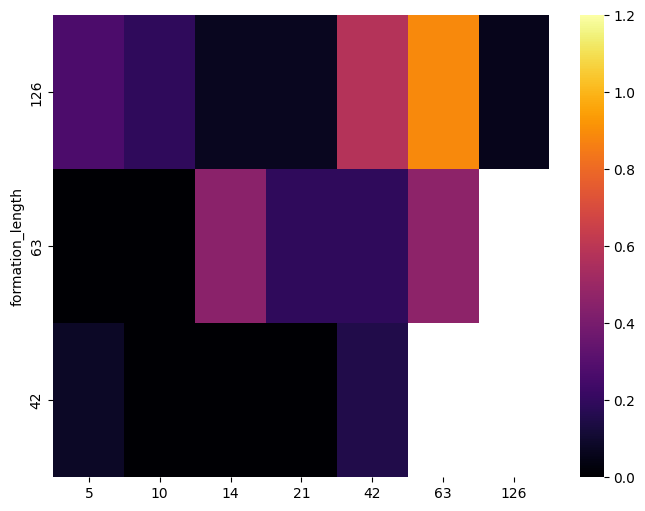

{'n_stocks': 10, 'window': 5}
(-0.23, 0.58)


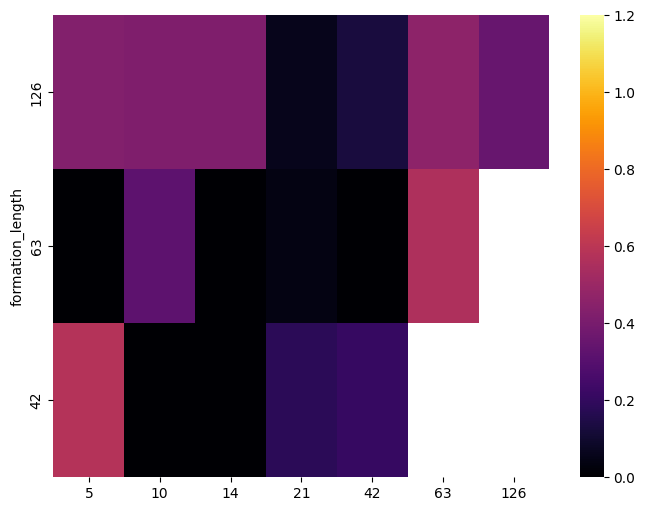

{'n_stocks': 1000, 'window': 2}
(-0.21, 0.73)


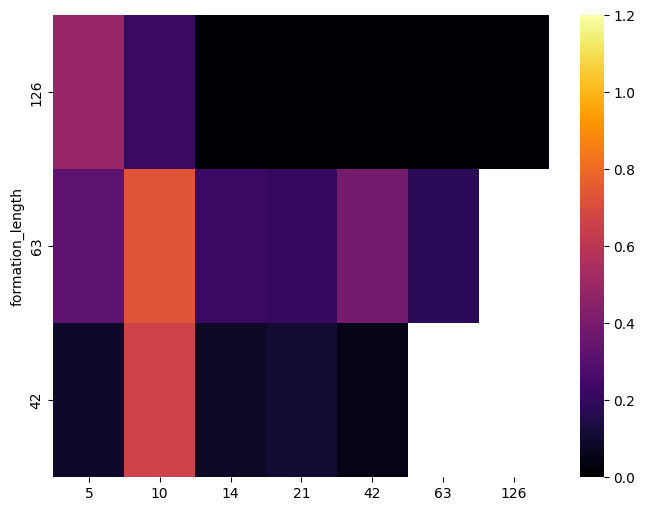

{'n_stocks': 10, 'window': 14}
(-0.25, 0.64)


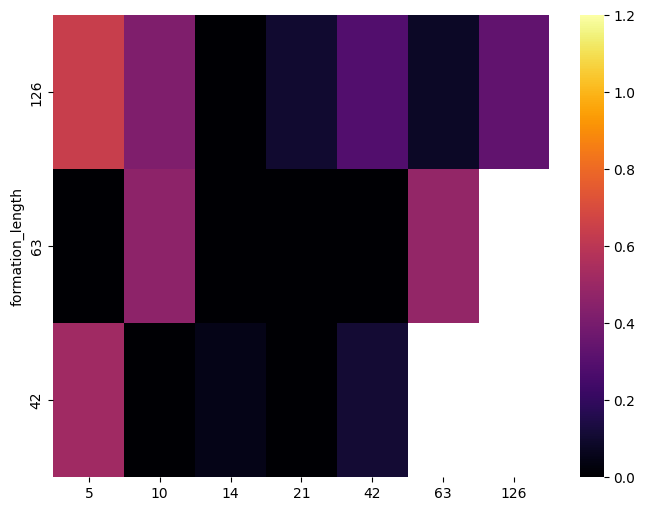

{'n_stocks': 1000, 'window': 10}
(-0.35, 0.83)


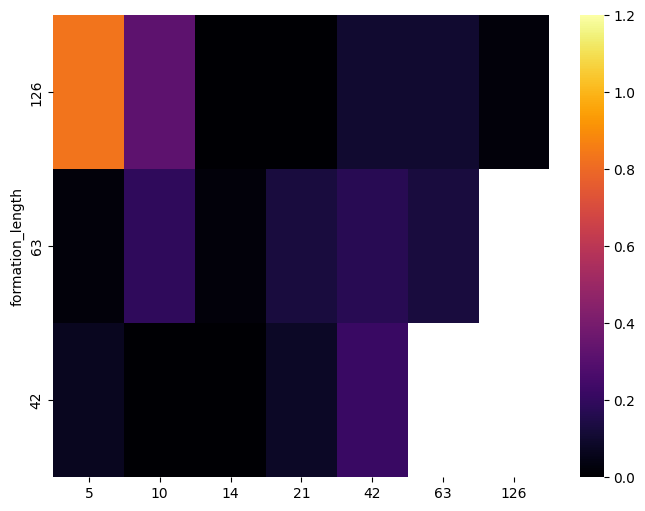

{'n_stocks': 1000, 'window': 14}
(-0.12, 0.7)


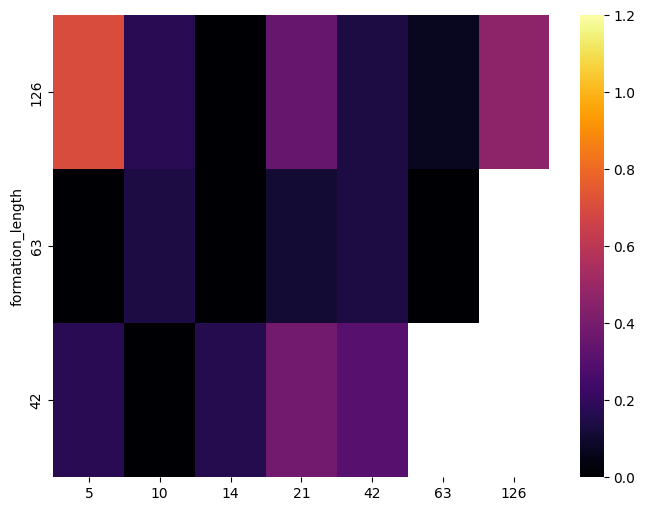

{'n_stocks': 10, 'window': 2}
(-0.19, 0.82)


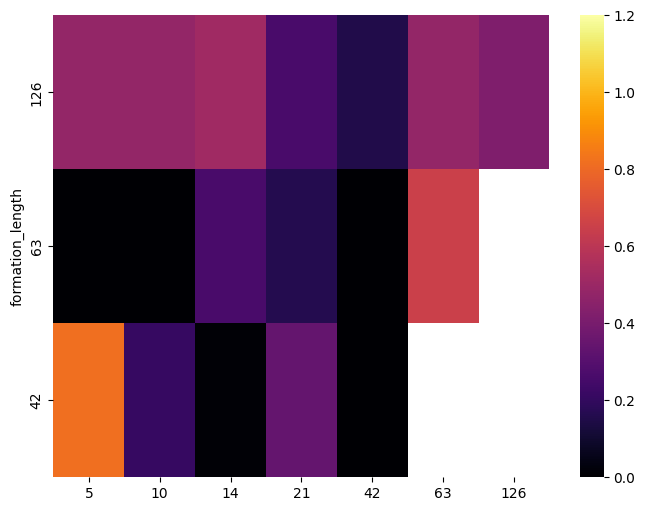

{'n_stocks': 1000, 'window': 5}
(-0.28, 0.51)


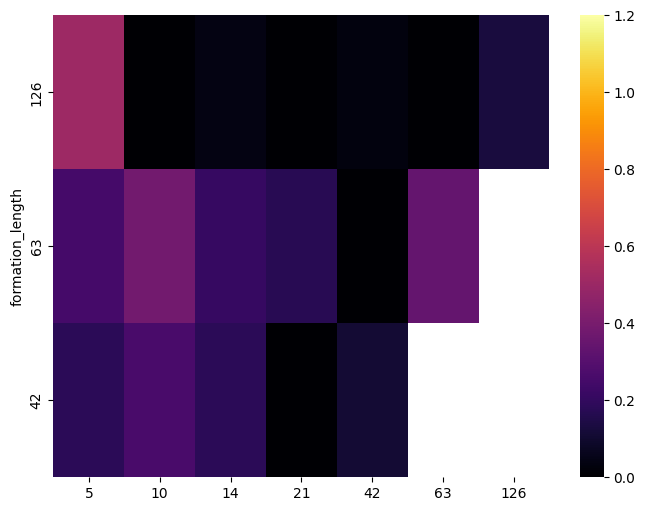

{'n_stocks': 10, 'window': 4}
(-0.19, 0.65)


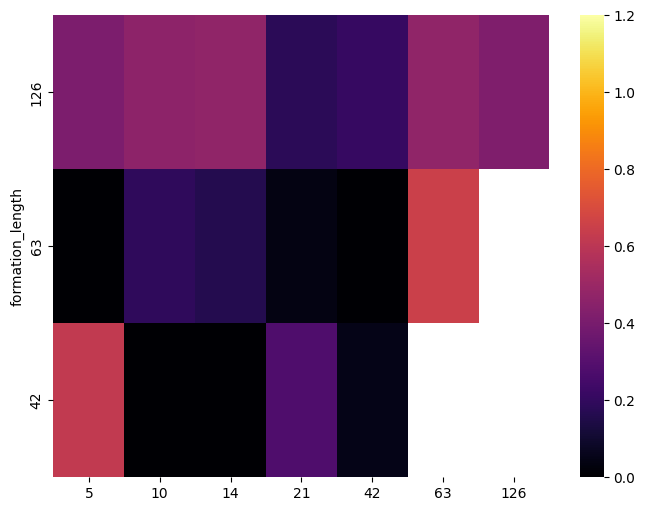

{'n_stocks': 1000, 'window': 3}
(-0.31, 0.59)


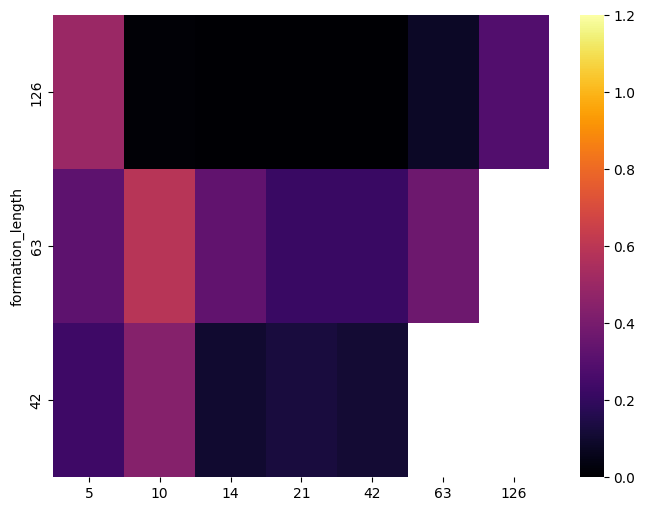

{'n_stocks': 100, 'window': 10}
(-0.33, 0.82)


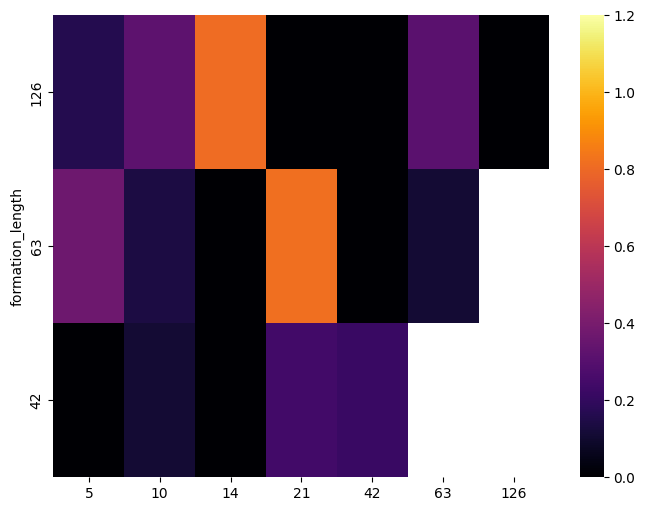

{'n_stocks': 10, 'window': 3}
(-0.19, 0.72)


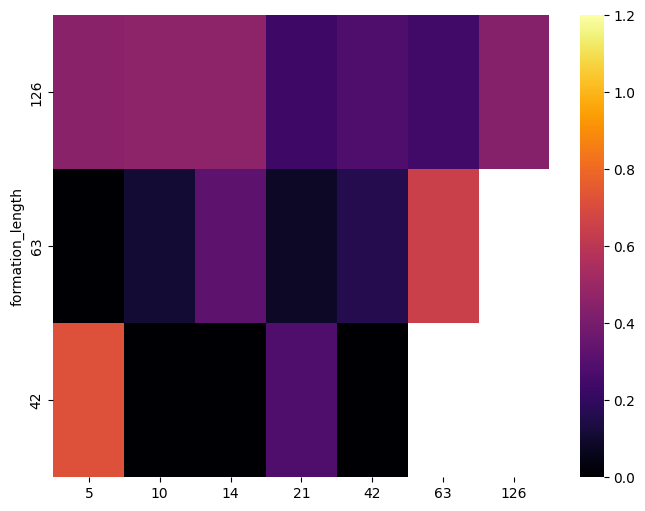

{'n_stocks': 100, 'window': 126}
(-0.71, 0.52)


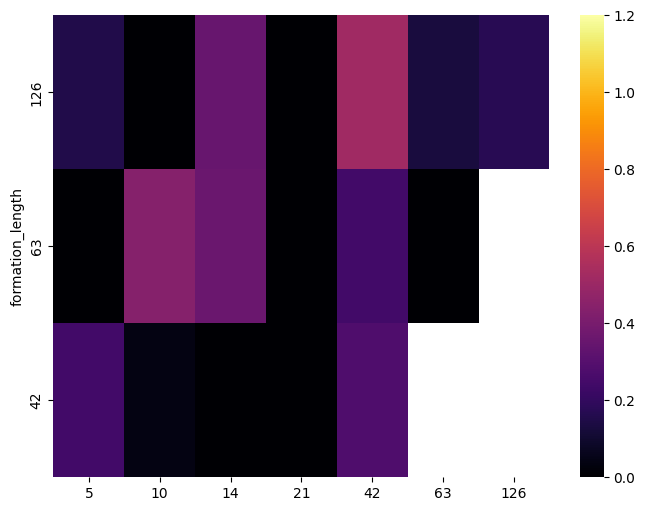

{'n_stocks': 1000, 'window': 126}
(-0.36, 0.45)


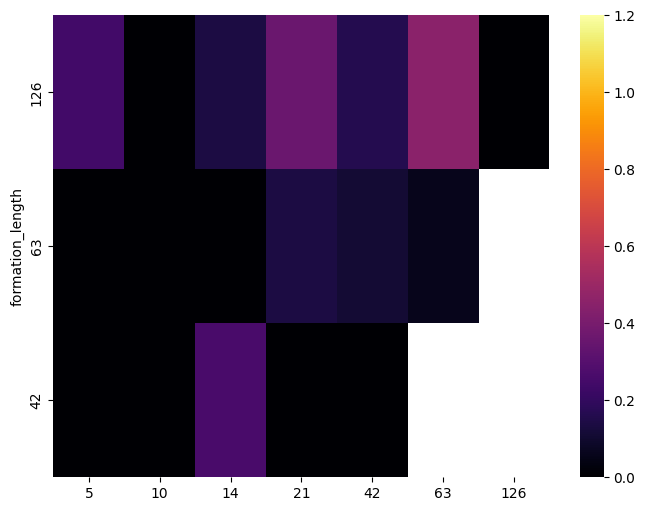

{'n_stocks': 1000, 'window': 4}
(-0.25, 0.47)


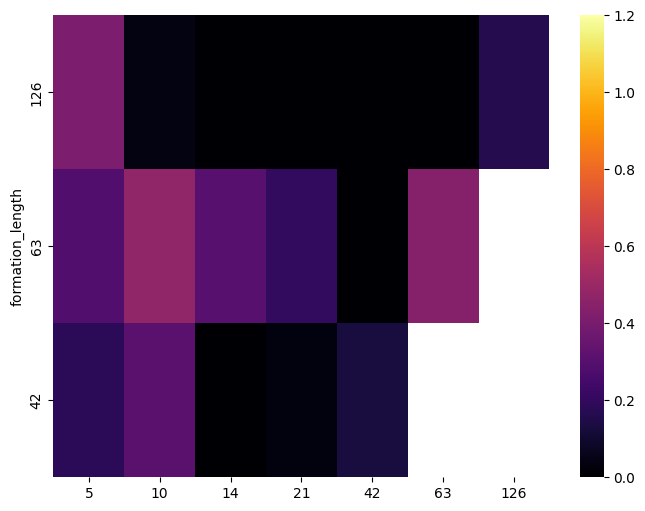

{'n_stocks': 100, 'window': 21}
(-0.3, 0.64)


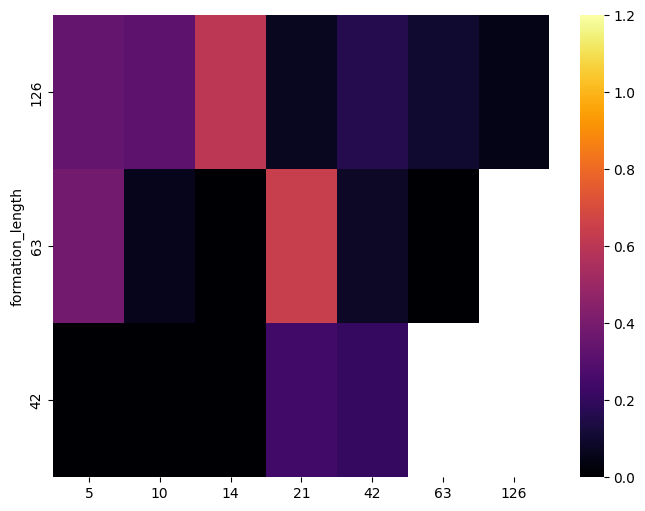

{'n_stocks': 100, 'window': 42}
(-0.53, 0.52)


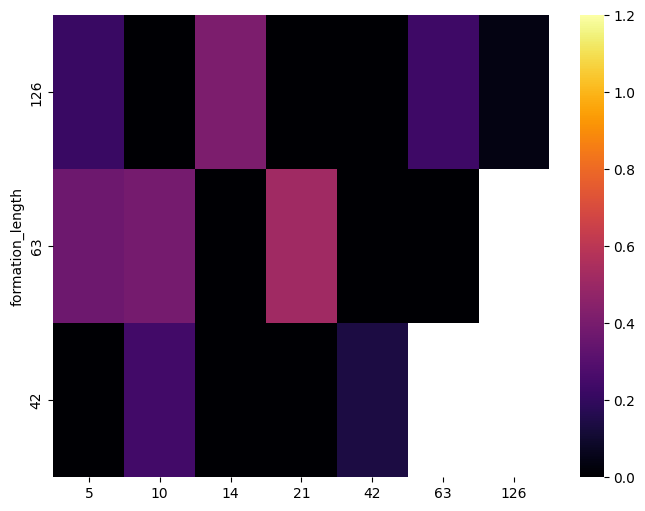

{'n_stocks': 10, 'window': 126}
(-0.26, 0.58)


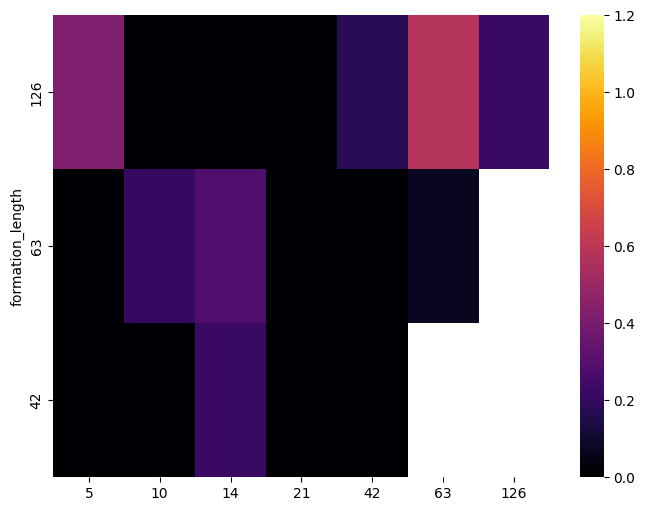

{'n_stocks': 100, 'window': 3}
(-0.26, 0.84)


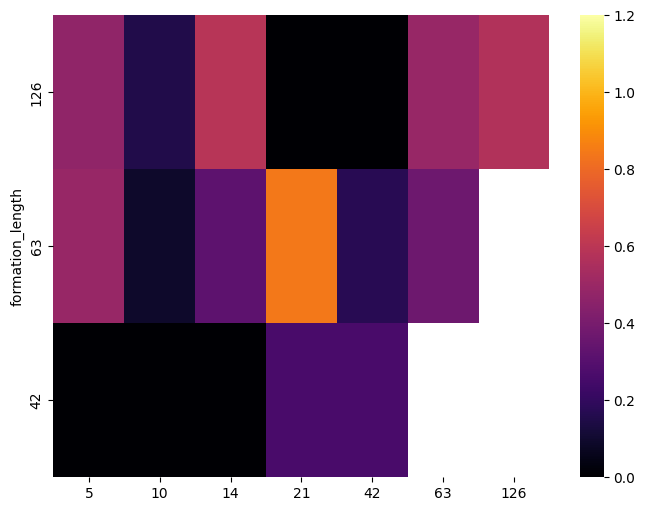

{'n_stocks': 10, 'window': 21}
(-0.21, 0.4)


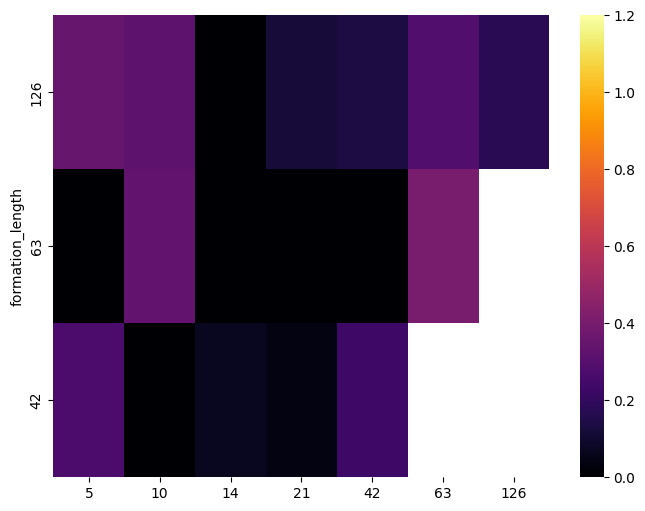

{'n_stocks': 1000, 'window': 63}
(-0.21, 0.46)


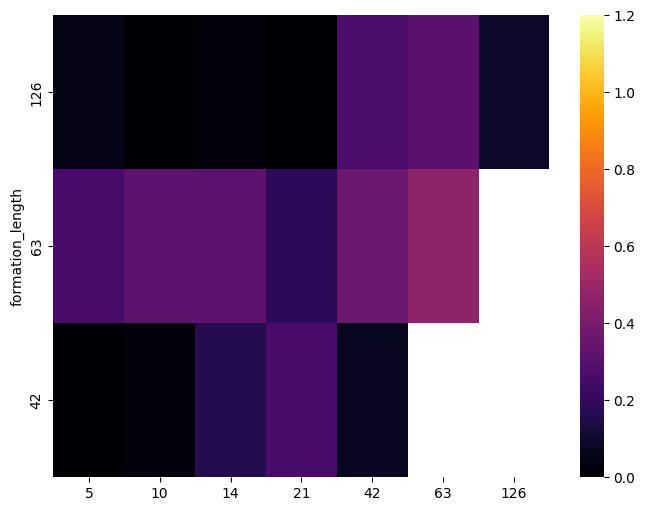

{'n_stocks': 1000, 'window': 42}
(-0.32, 0.47)


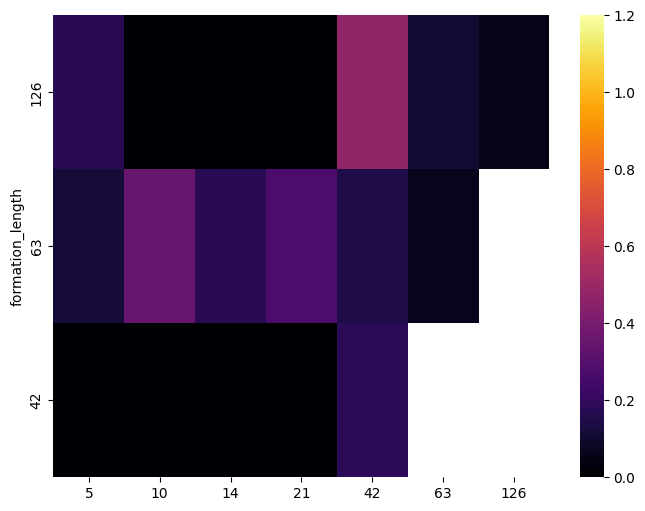

{'n_stocks': 100, 'window': 63}
(-0.38, 0.53)


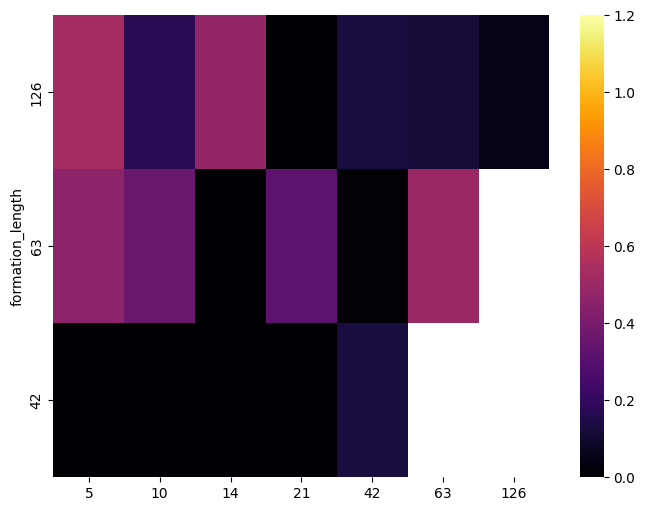

{'n_stocks': 1000, 'window': 21}
(-0.31, 0.43)


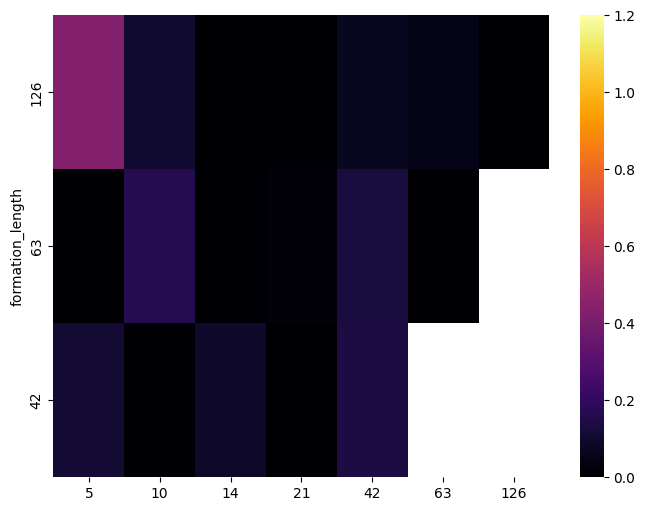

{'n_stocks': 100, 'window': 2}
(-0.35, 0.75)


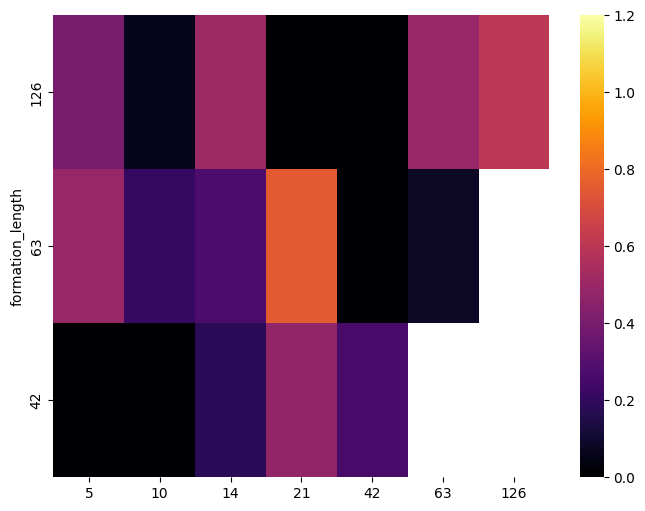

****************************************************************************************************
('formation_length', 'n_stocks')


{'t_max': 21, 'window': 4}
(-0.25, 0.8)


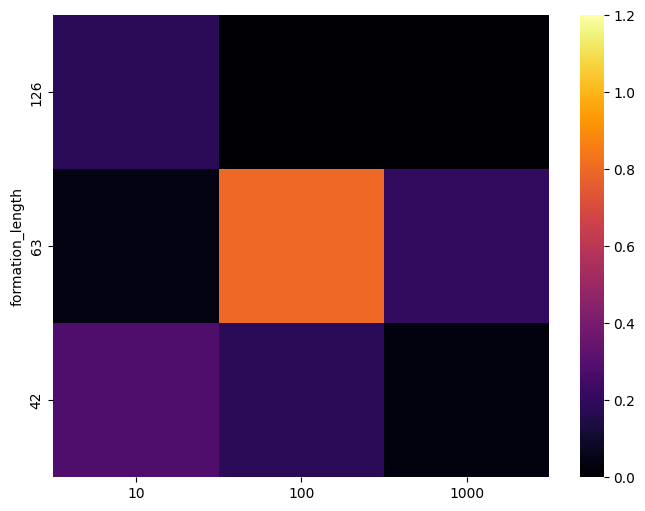

{'t_max': 14, 'window': 10}
(-0.33, 0.81)


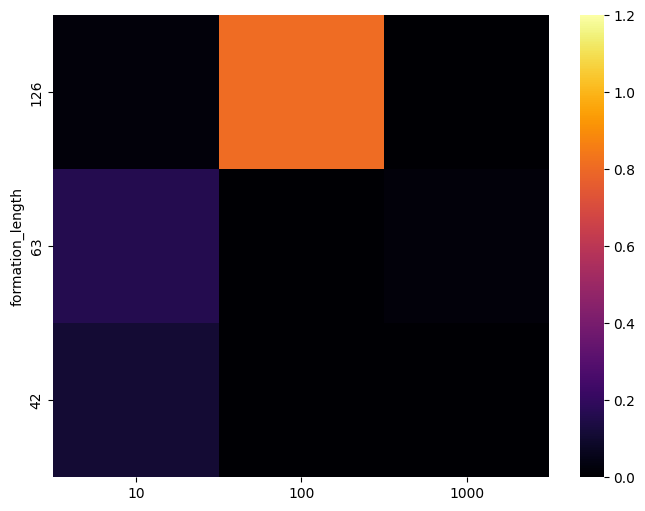

{'t_max': 42, 'window': 14}
(-0.32, 0.38)


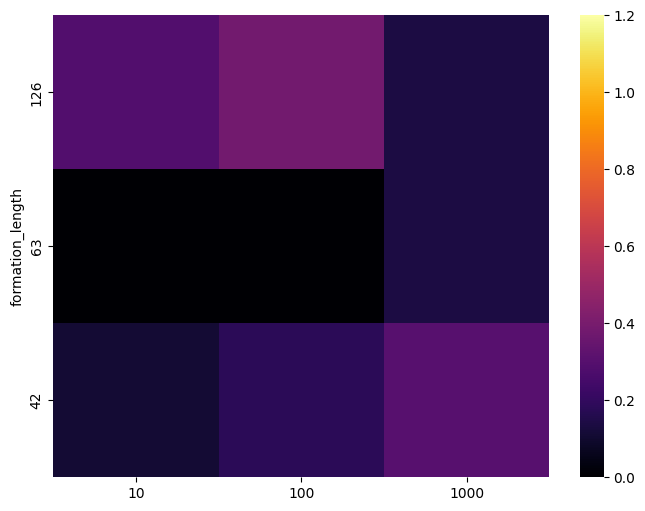

{'t_max': 10, 'window': 5}
(-0.07, 0.43)


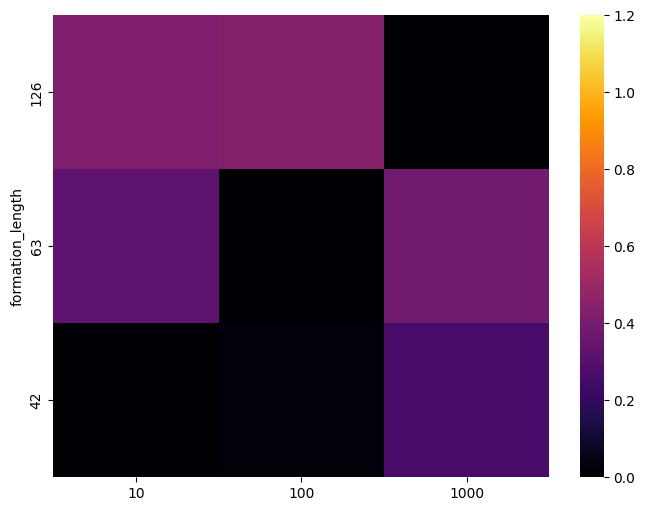

{'t_max': 63, 'window': 42}
(-0.08, 0.41)


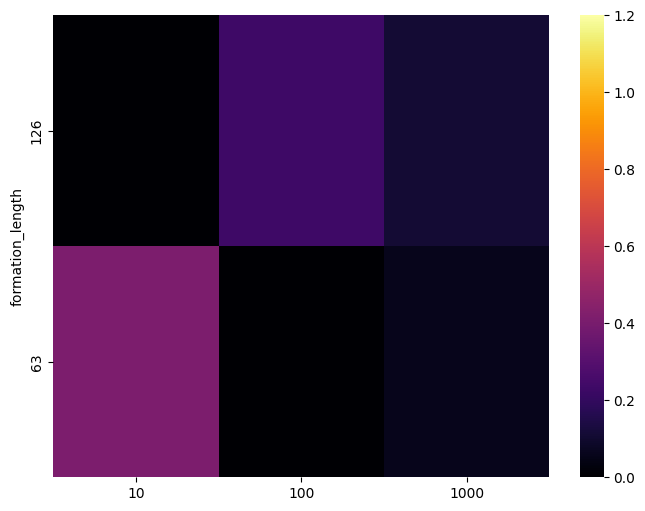

{'t_max': 21, 'window': 63}
(-0.26, 0.32)


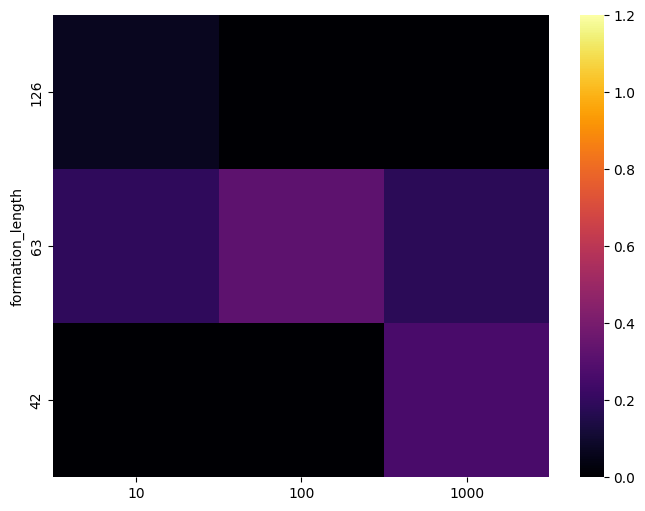

{'t_max': 21, 'window': 5}
(-0.18, 0.76)


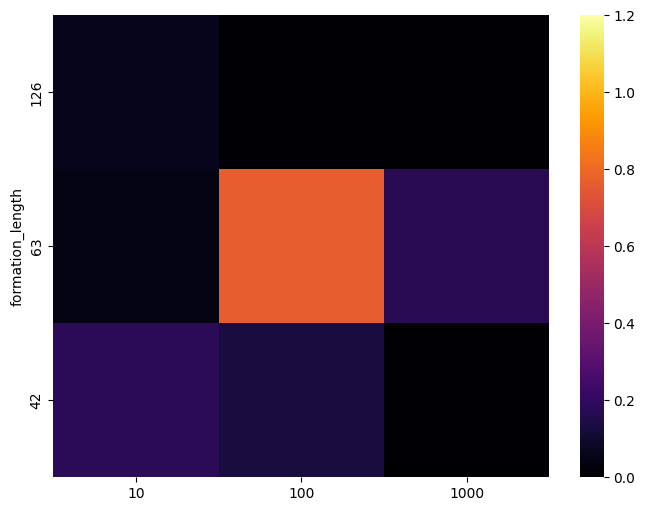

{'t_max': 10, 'window': 2}
(-0.27, 0.73)


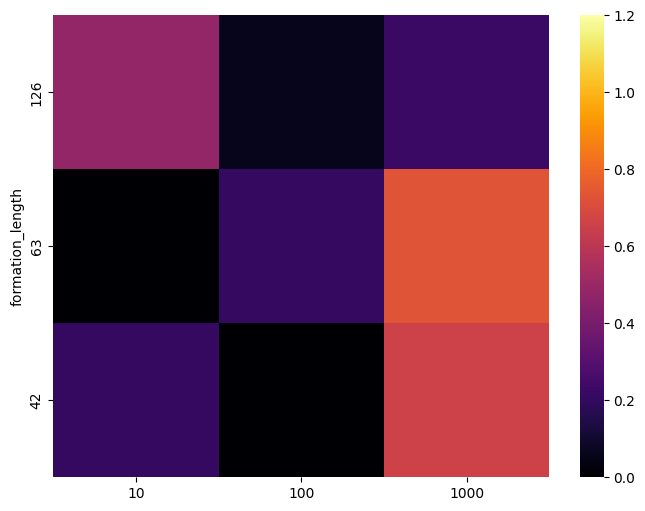

{'t_max': 10, 'window': 10}
(-0.05, 0.38)


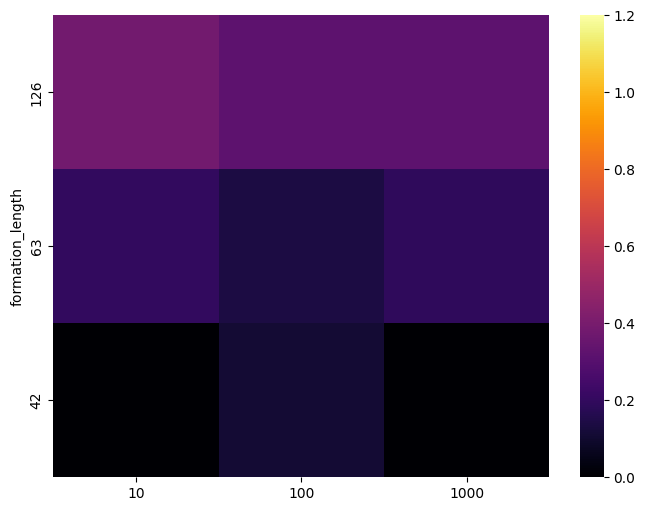

{'t_max': 10, 'window': 14}
(-0.22, 0.46)


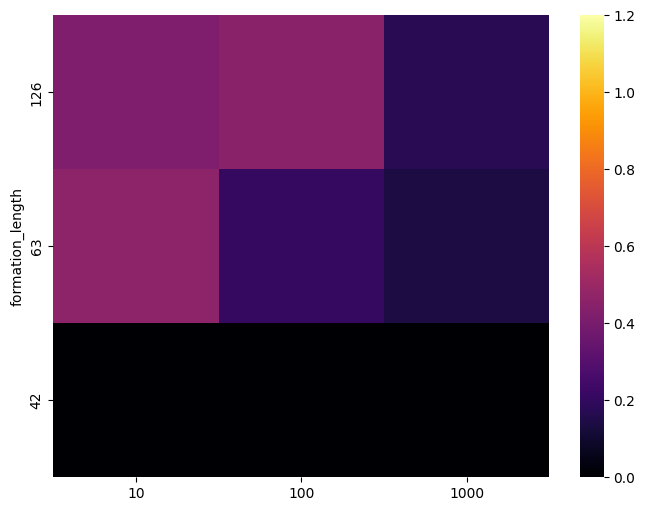

{'t_max': 63, 'window': 2}
(-0.01, 0.65)


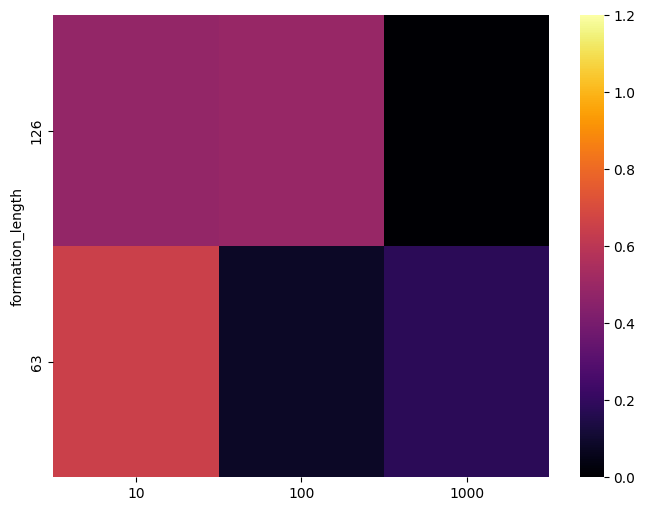

{'t_max': 5, 'window': 5}
(-0.36, 0.58)


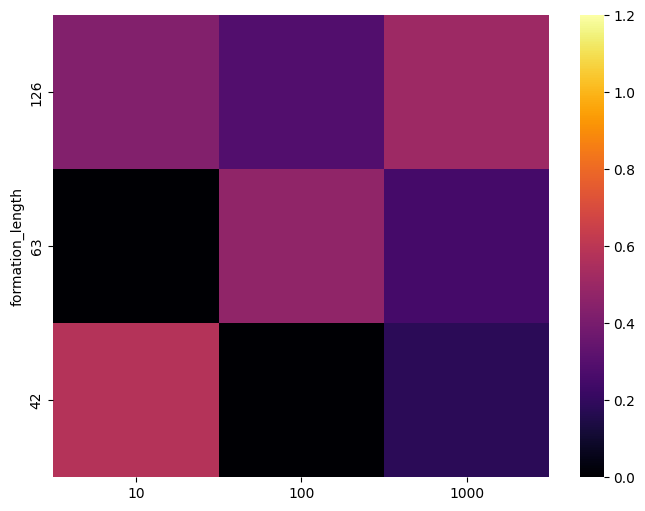

{'t_max': 63, 'window': 5}
(-0.28, 0.56)


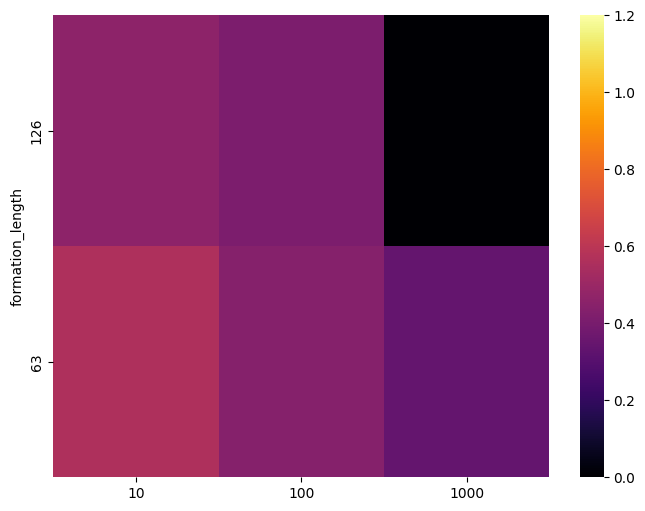

{'t_max': 63, 'window': 14}
(-0.08, 0.48)


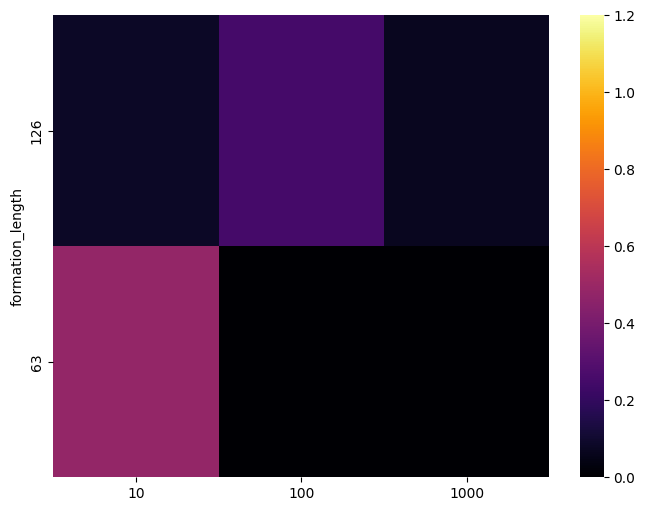

{'t_max': 14, 'window': 63}
(-0.38, 0.48)


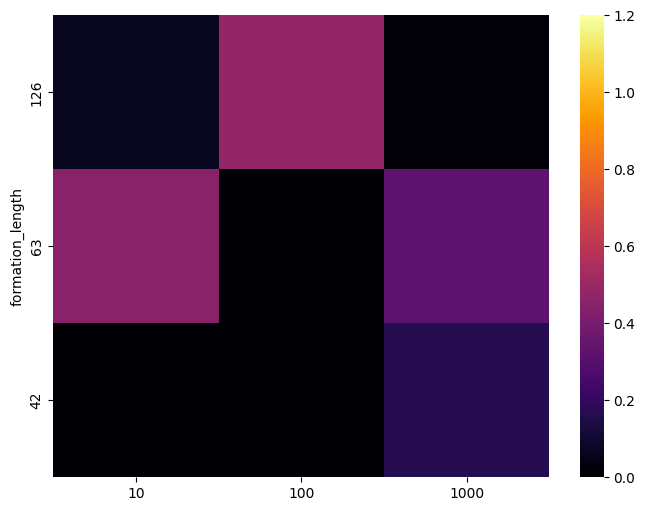

{'t_max': 5, 'window': 4}
(-0.19, 0.62)


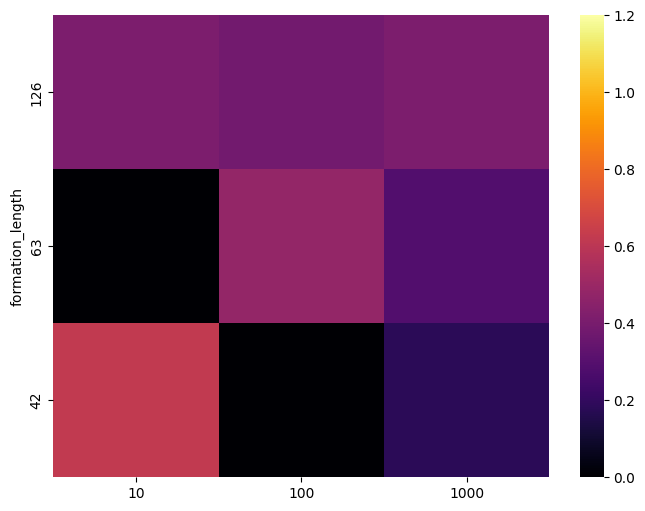

{'t_max': 5, 'window': 3}
(-0.19, 0.72)


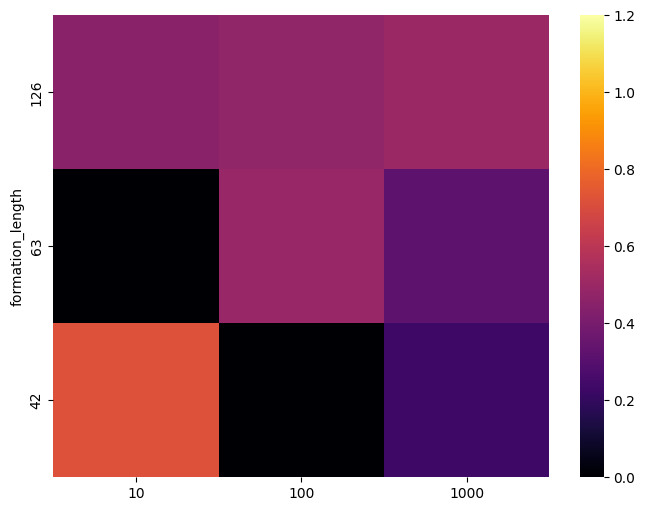

{'t_max': 5, 'window': 10}
(-0.2, 0.83)


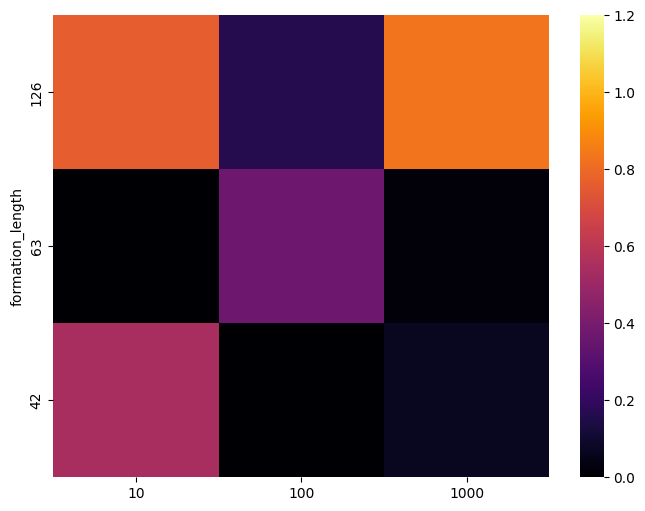

{'t_max': 126, 'window': 5}
(0.13, 0.45)


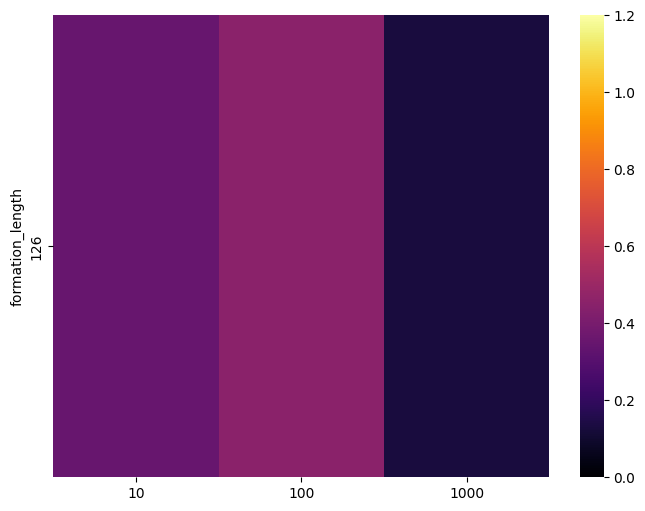

{'t_max': 21, 'window': 14}
(-0.25, 0.73)


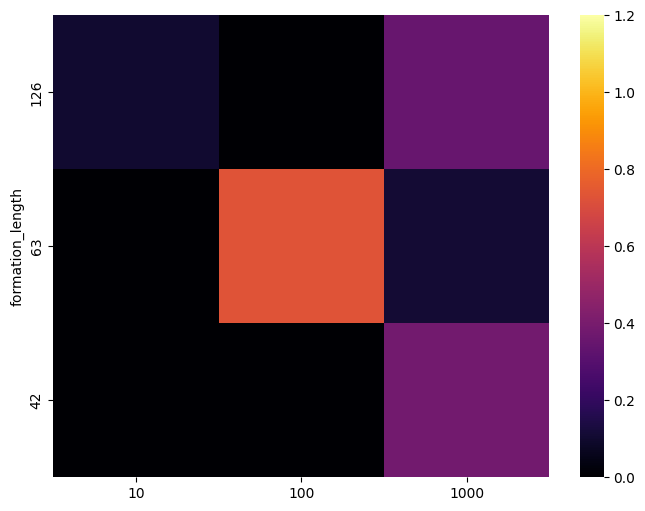

{'t_max': 21, 'window': 3}
(-0.31, 0.84)


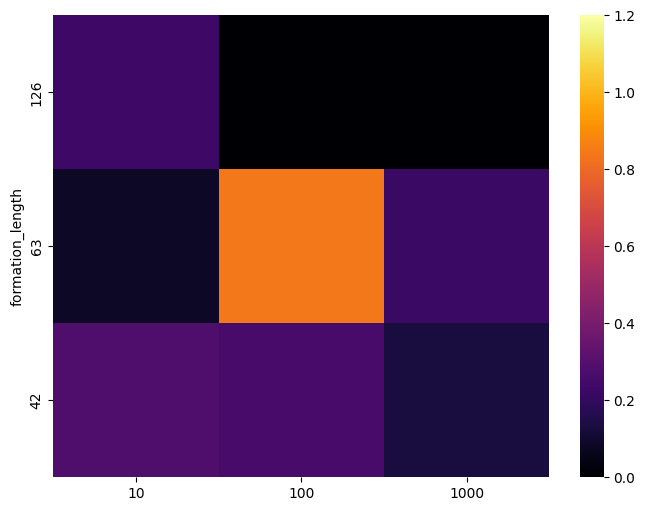

{'t_max': 10, 'window': 3}
(-0.26, 0.59)


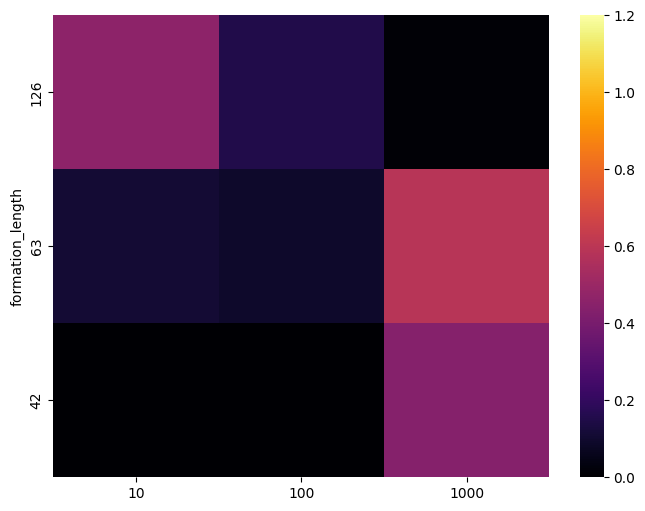

{'t_max': 63, 'window': 126}
(-0.31, 0.58)


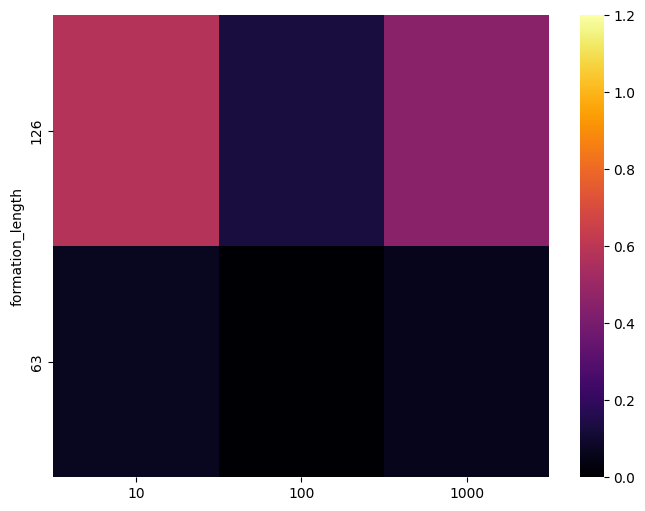

{'t_max': 21, 'window': 126}
(-0.26, 0.36)


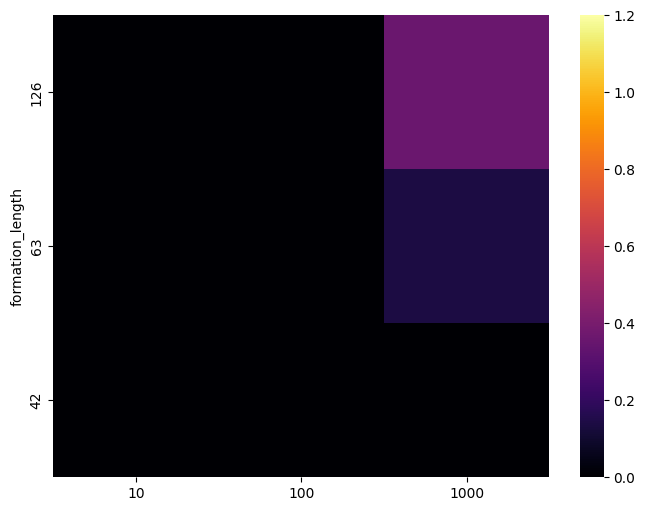

{'t_max': 14, 'window': 21}
(-0.31, 0.6)


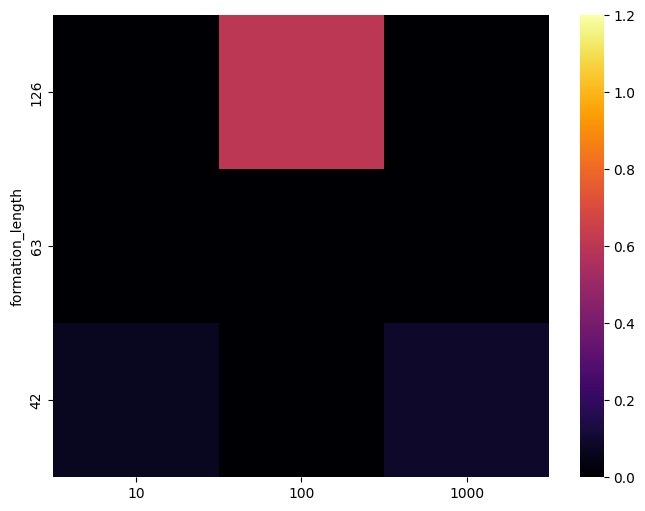

{'t_max': 5, 'window': 42}
(-0.53, 0.37)


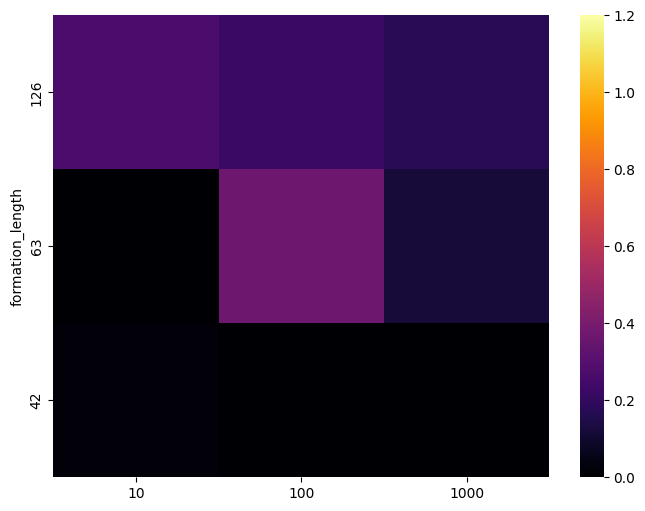

{'t_max': 21, 'window': 10}
(-0.35, 0.82)


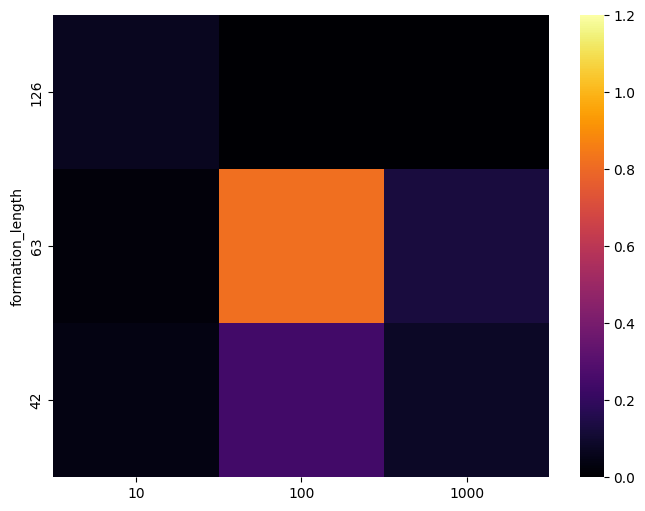

{'t_max': 10, 'window': 4}
(-0.17, 0.47)


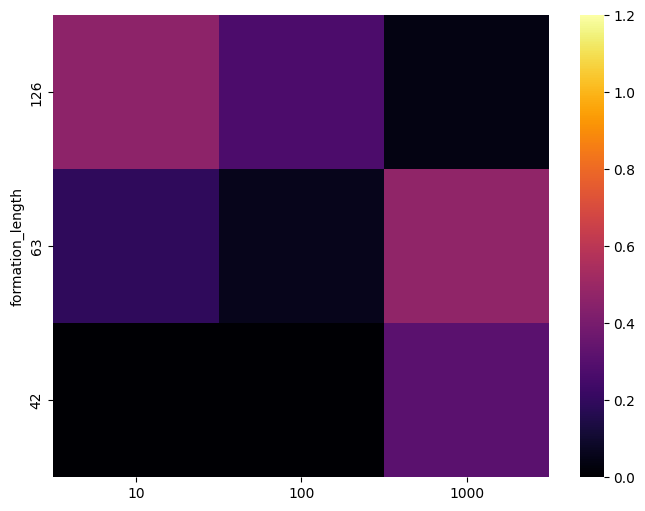

{'t_max': 10, 'window': 63}
(-0.32, 0.36)


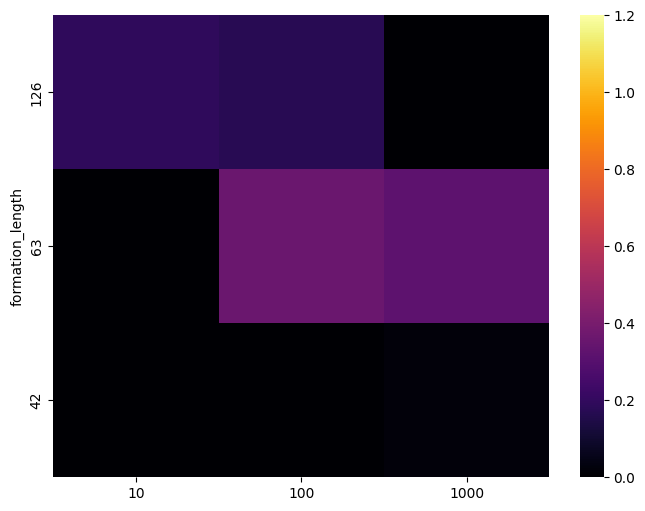

{'t_max': 14, 'window': 2}
(-0.07, 0.52)


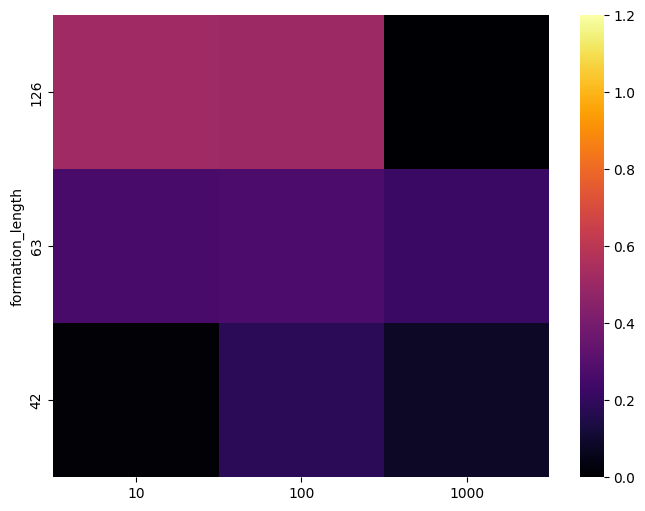

{'t_max': 14, 'window': 5}
(-0.2, 0.6)


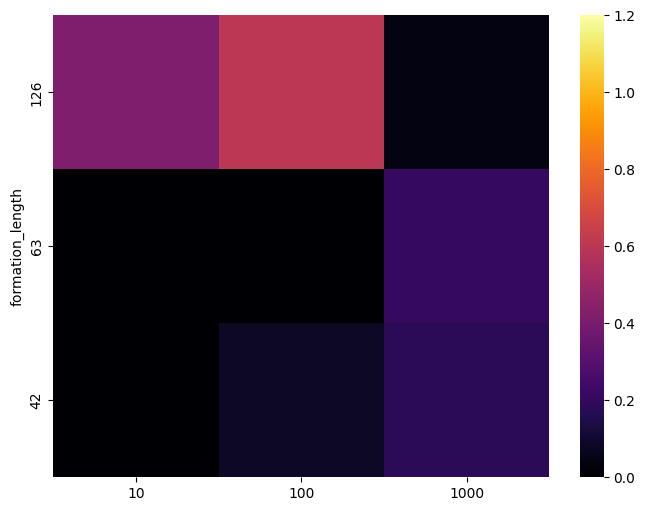

{'t_max': 42, 'window': 4}
(-0.16, 0.25)


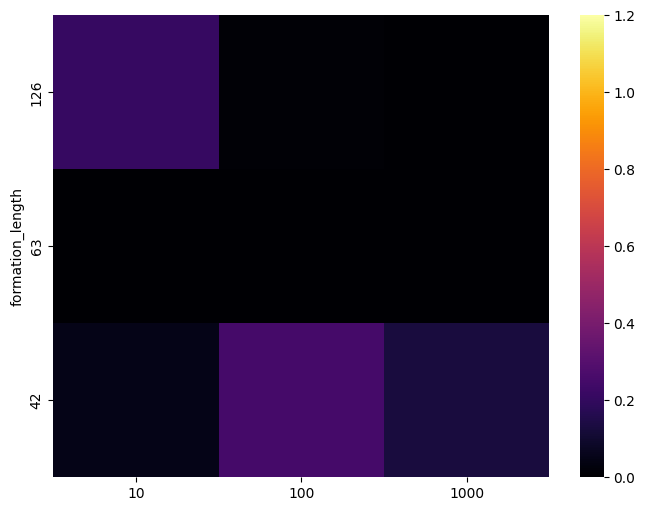

{'t_max': 10, 'window': 42}
(-0.7, 0.39)


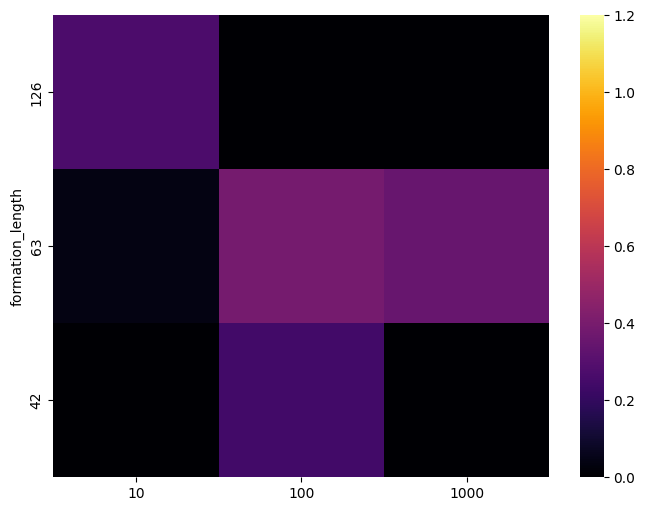

{'t_max': 63, 'window': 21}
(-0.11, 0.4)


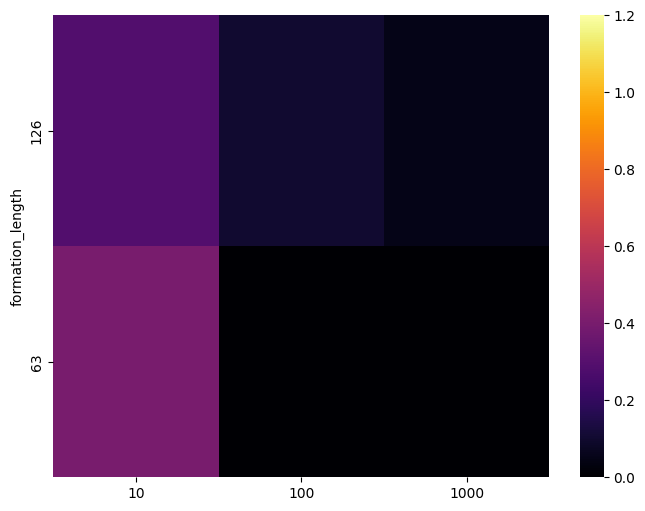

{'t_max': 42, 'window': 3}
(-0.17, 0.28)


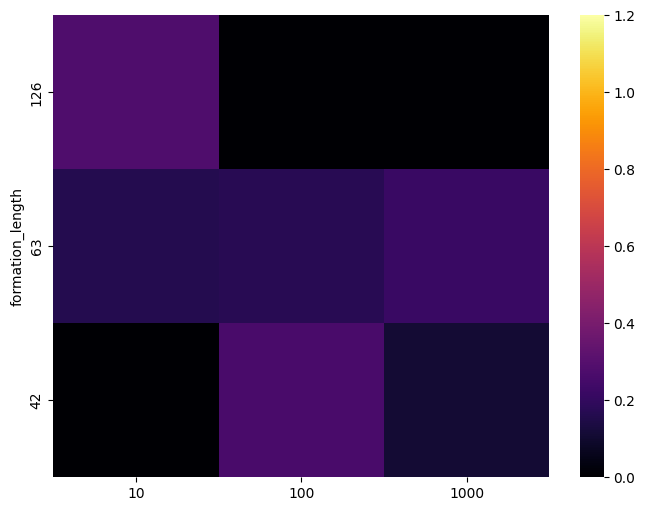

{'t_max': 42, 'window': 42}
(-0.3, 0.5)


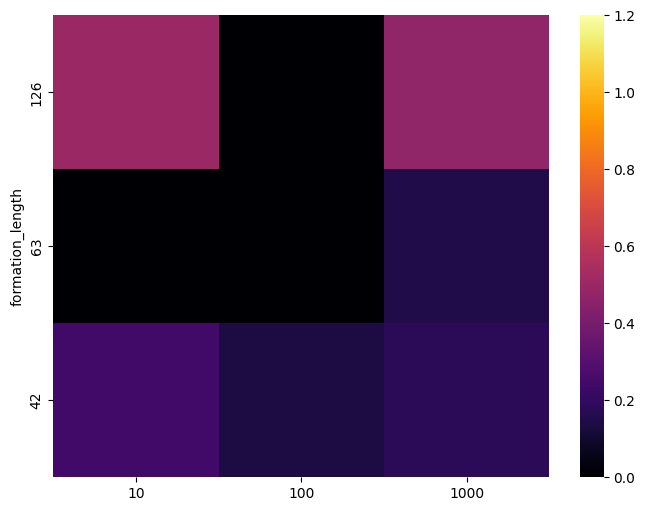

{'t_max': 126, 'window': 63}
(0.05, 0.09)


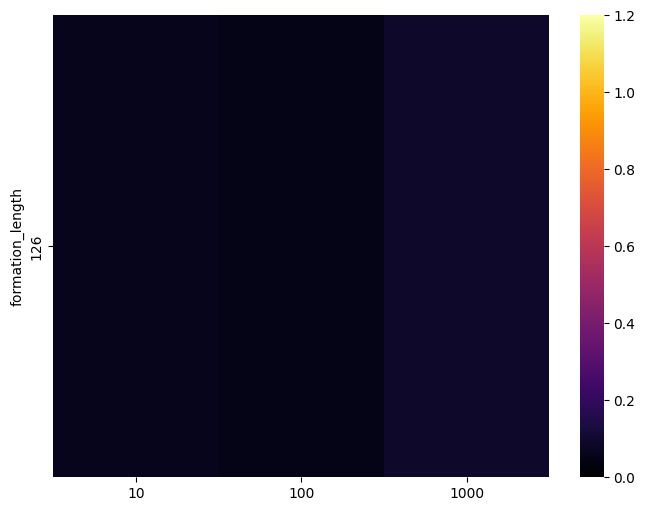

{'t_max': 126, 'window': 3}
(0.29, 0.57)


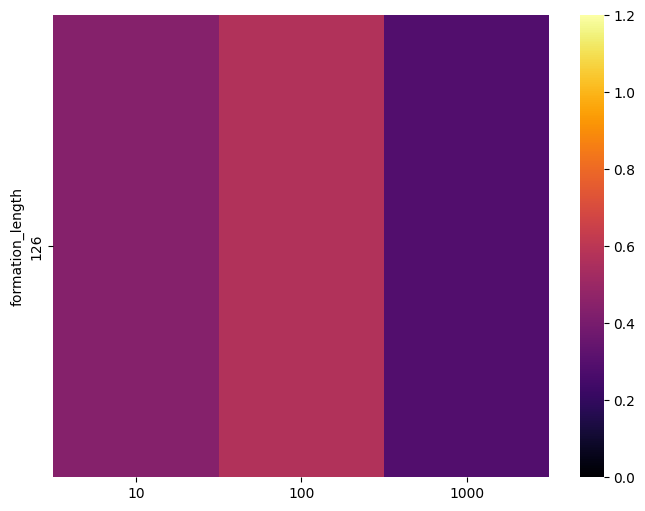

{'t_max': 5, 'window': 2}
(-0.19, 0.82)


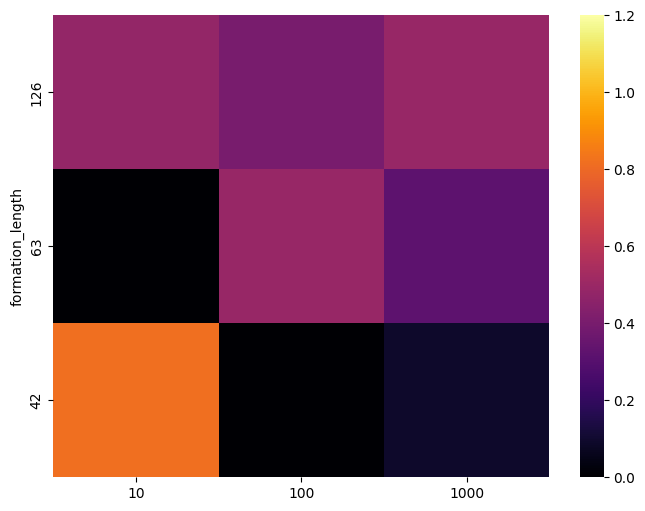

{'t_max': 126, 'window': 126}
(-0.13, 0.22)


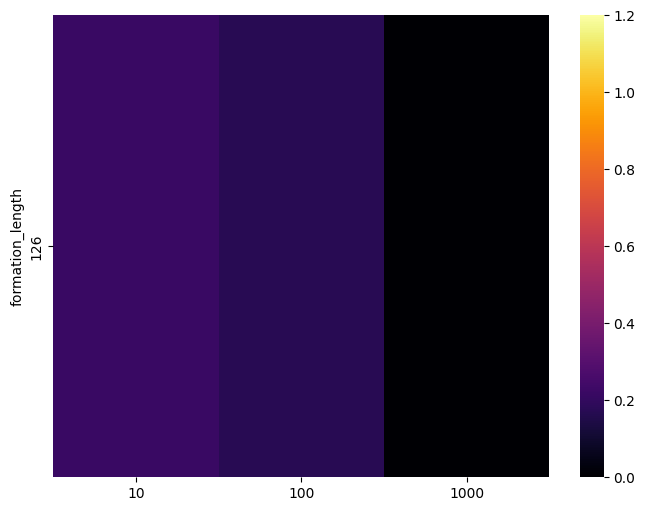

{'t_max': 5, 'window': 63}
(-0.19, 0.53)


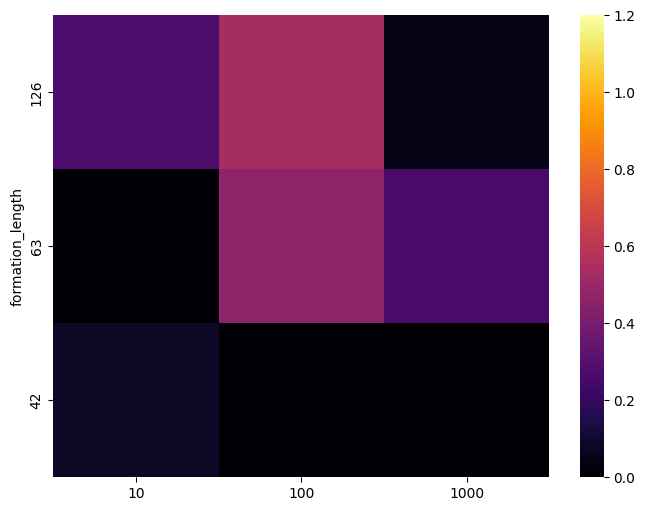

{'t_max': 21, 'window': 42}
(-0.46, 0.52)


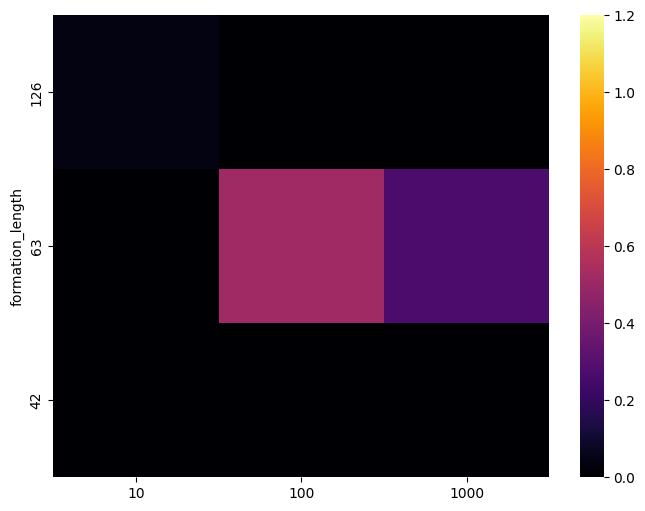

{'t_max': 5, 'window': 126}
(-0.71, 0.42)


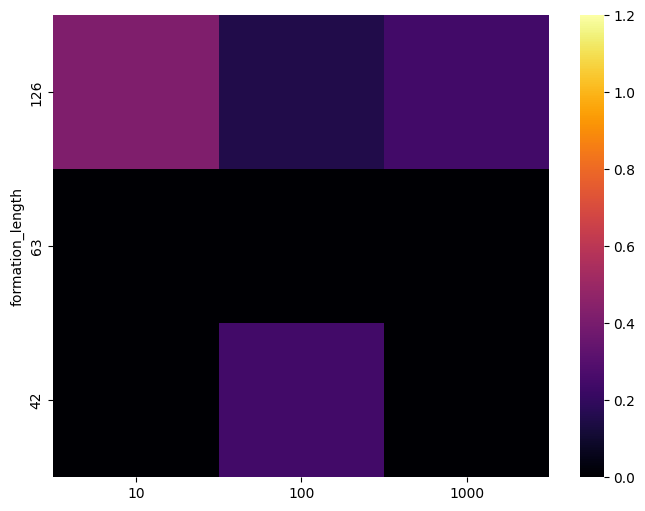

{'t_max': 42, 'window': 126}
(-0.32, 0.52)


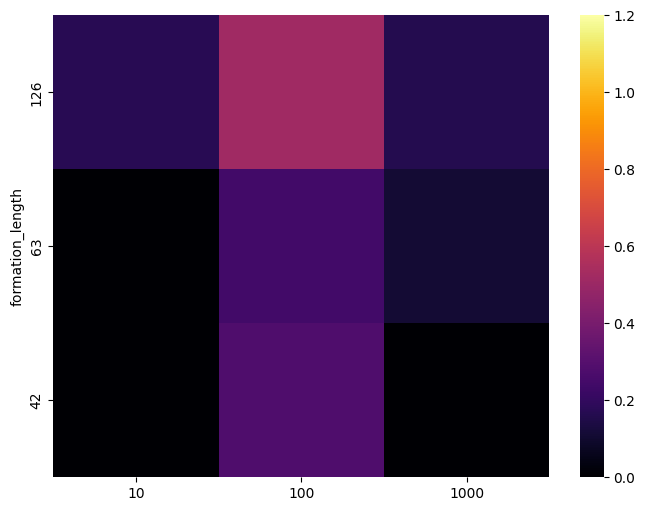

{'t_max': 14, 'window': 14}
(-0.18, 1.01)


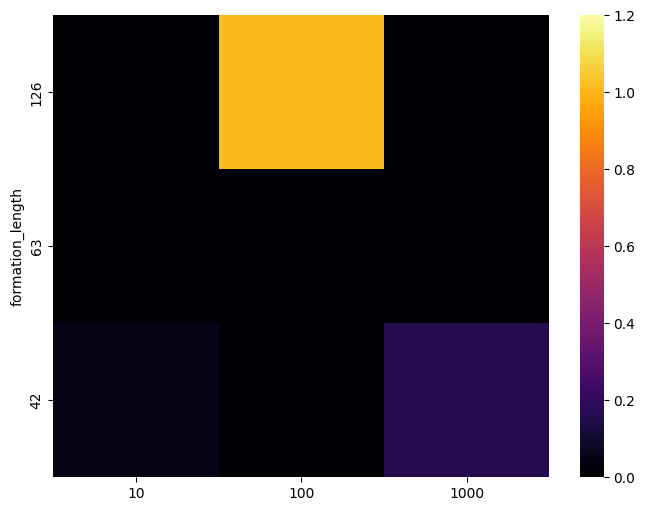

{'t_max': 14, 'window': 4}
(-0.19, 0.61)


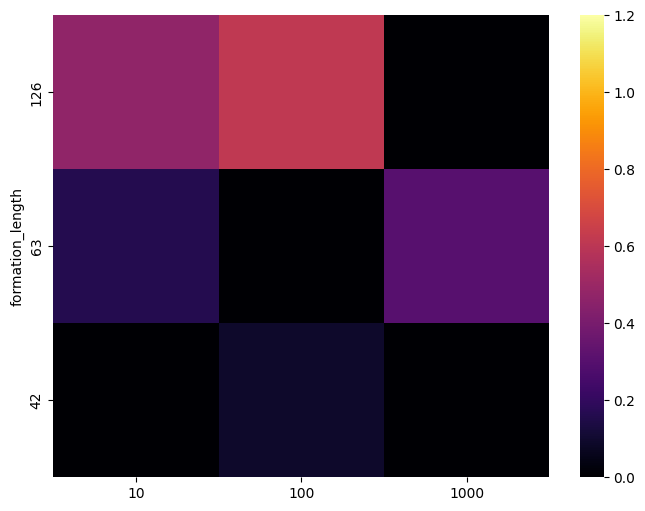

{'t_max': 63, 'window': 63}
(0.12, 0.89)


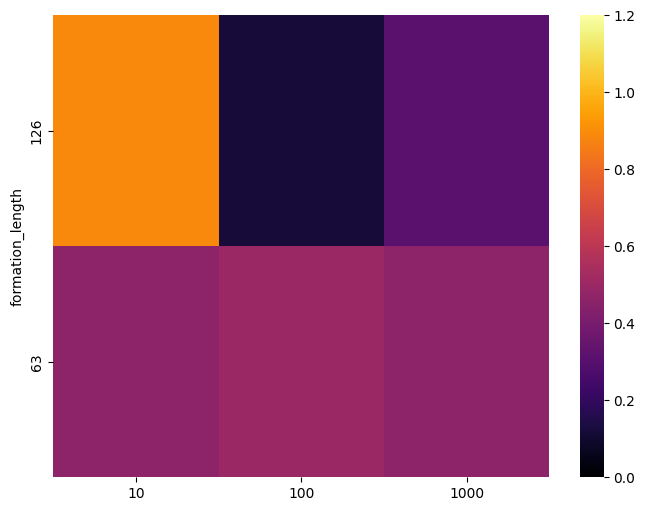

{'t_max': 5, 'window': 14}
(-0.25, 0.7)


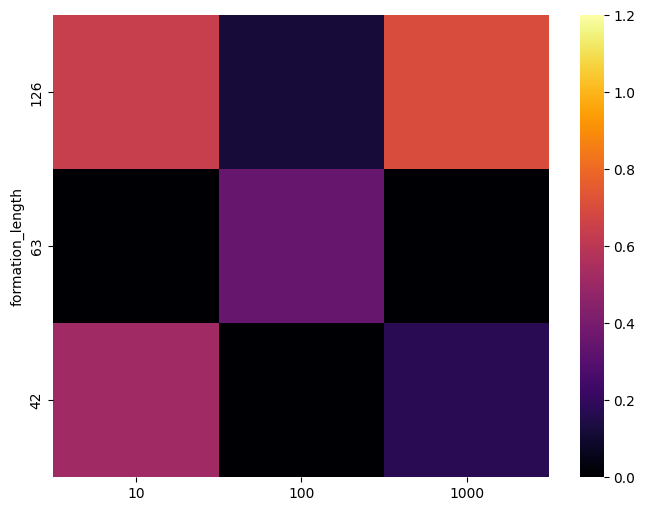

{'t_max': 5, 'window': 21}
(-0.21, 0.43)


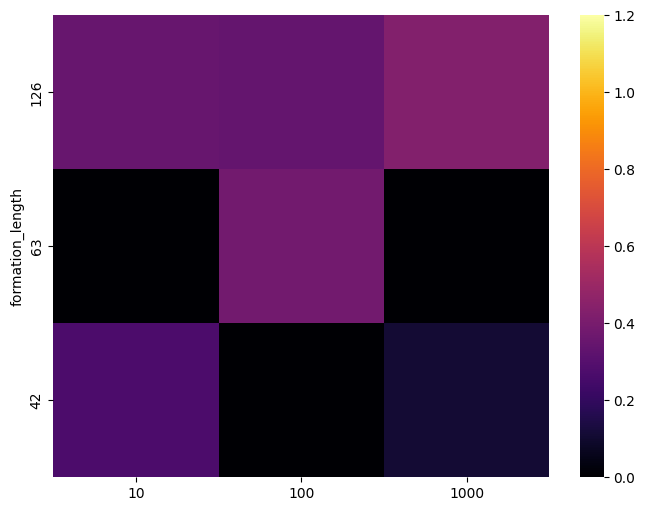

{'t_max': 14, 'window': 42}
(-0.25, 0.41)


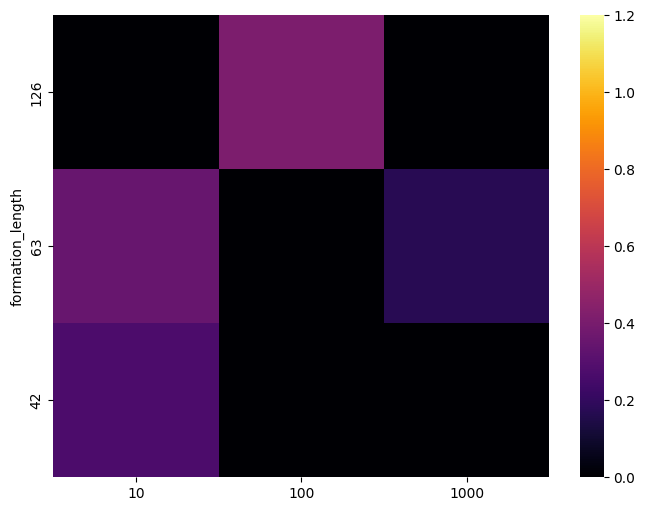

{'t_max': 21, 'window': 21}
(-0.15, 0.64)


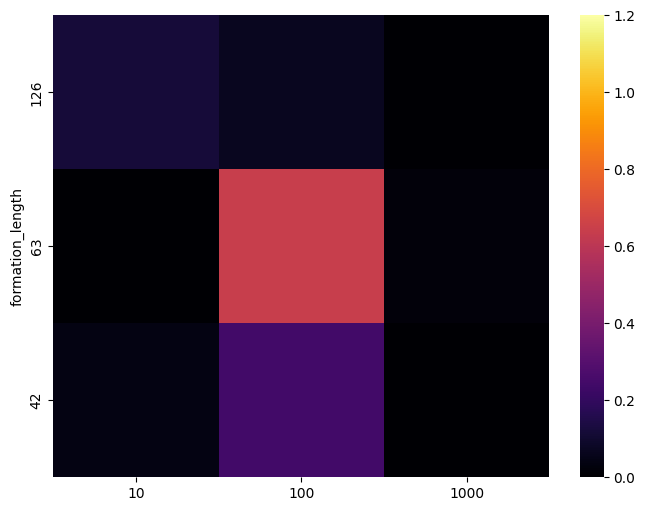

{'t_max': 126, 'window': 2}
(-0.02, 0.6)


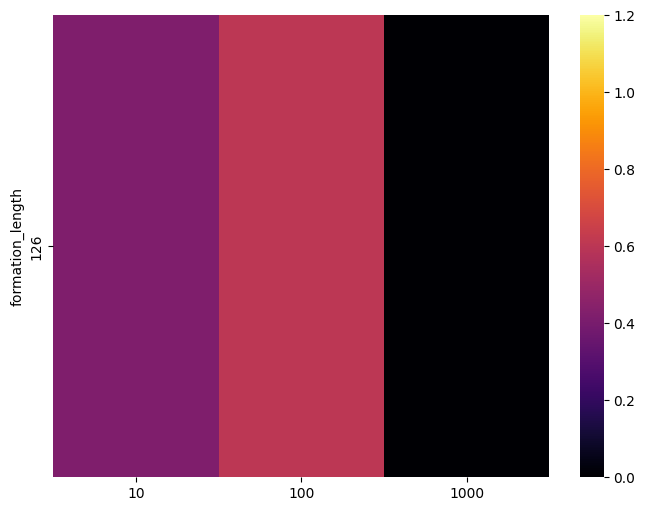

{'t_max': 42, 'window': 5}
(-0.23, 0.24)


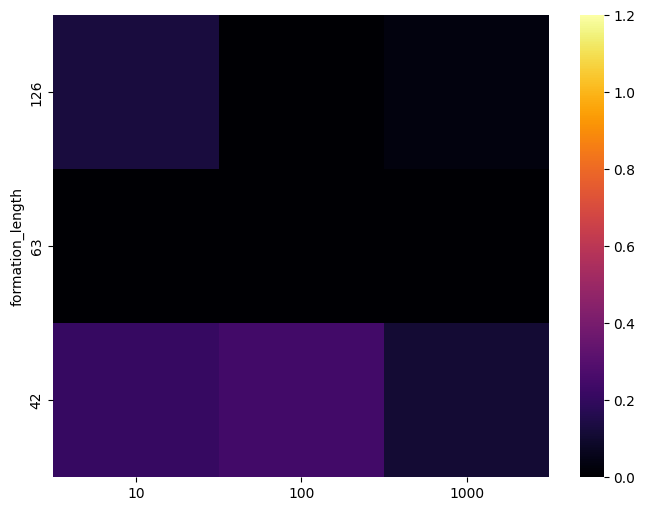

{'t_max': 126, 'window': 4}
(0.16, 0.46)


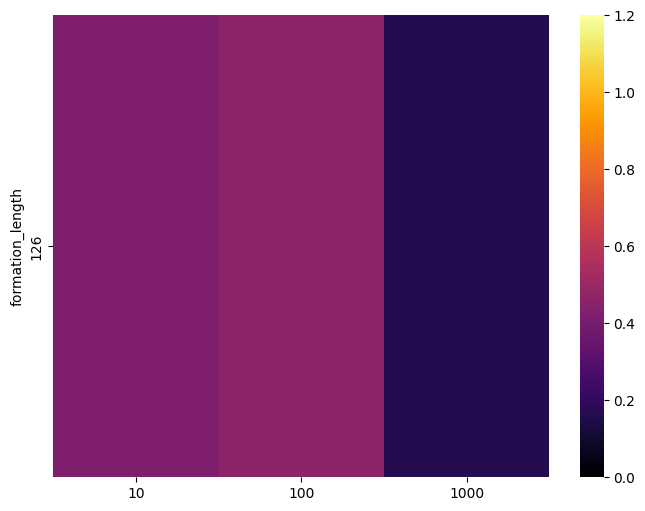

{'t_max': 42, 'window': 10}
(-0.31, 0.38)


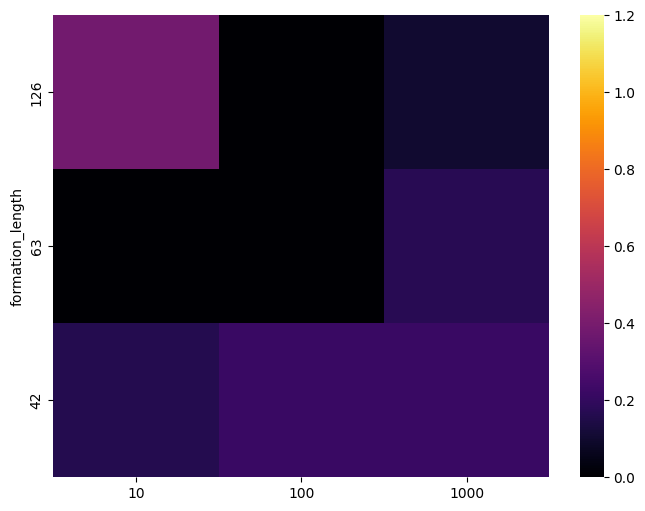

{'t_max': 14, 'window': 126}
(-0.62, 0.36)


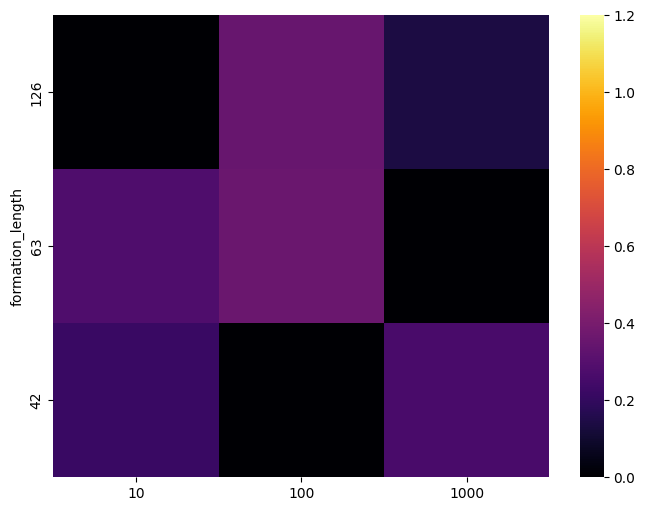

{'t_max': 42, 'window': 21}
(-0.05, 0.23)


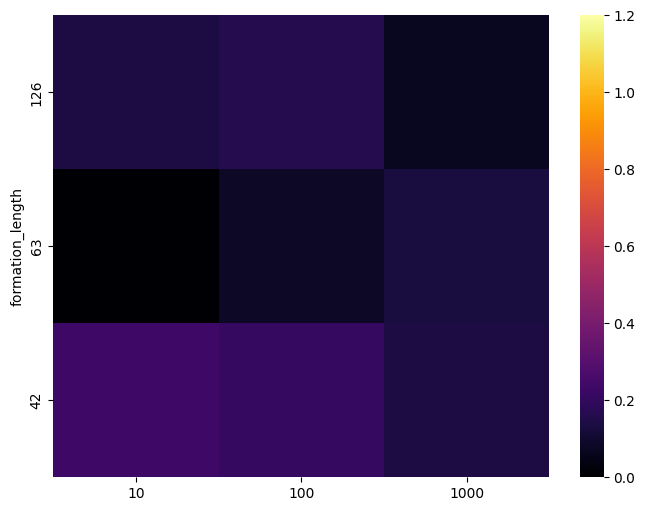

{'t_max': 14, 'window': 3}
(-0.04, 0.59)


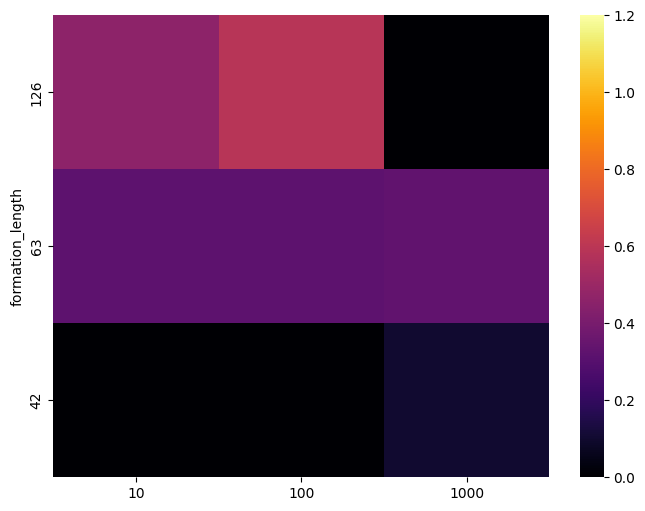

{'t_max': 63, 'window': 3}
(0.08, 0.65)


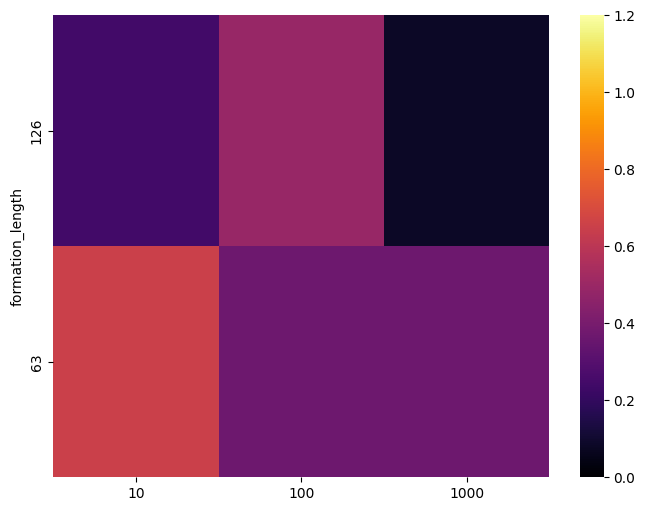

{'t_max': 10, 'window': 126}
(-0.26, 0.44)


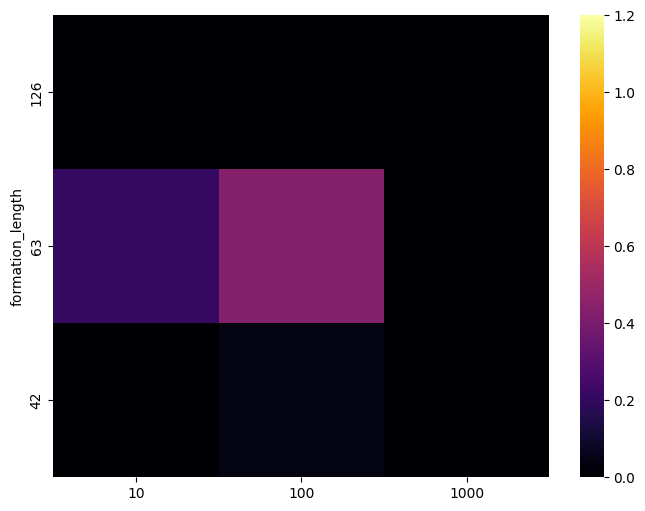

{'t_max': 42, 'window': 2}
(-0.26, 0.39)


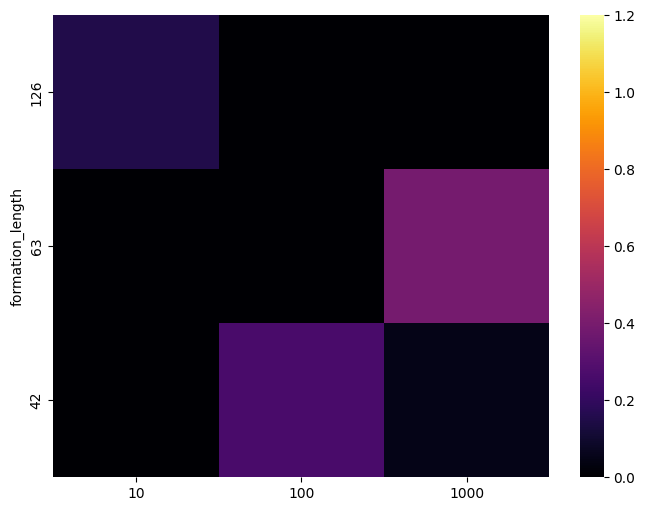

{'t_max': 63, 'window': 10}
(0.1, 0.58)


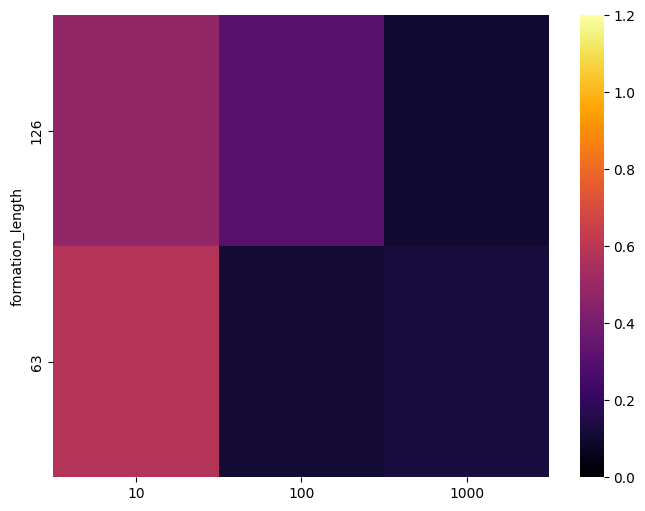

{'t_max': 42, 'window': 63}
(0.01, 0.58)


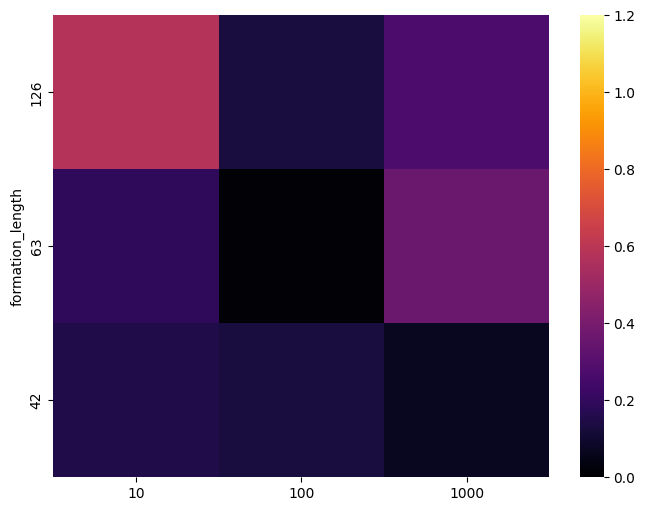

{'t_max': 126, 'window': 10}
(-0.07, 0.33)


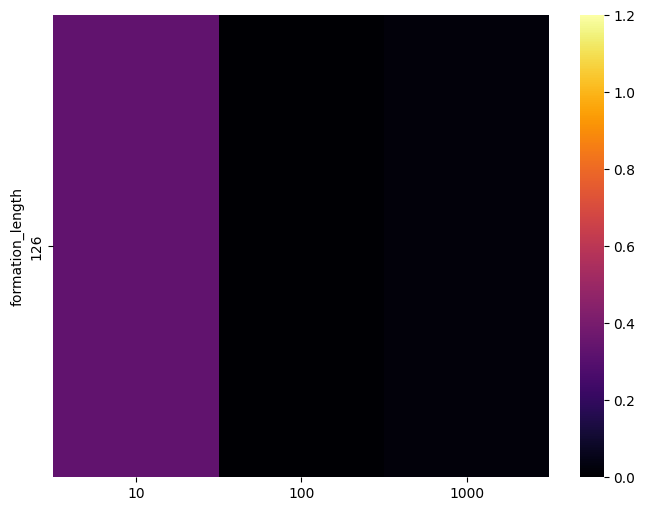

{'t_max': 126, 'window': 21}
(-0.13, 0.17)


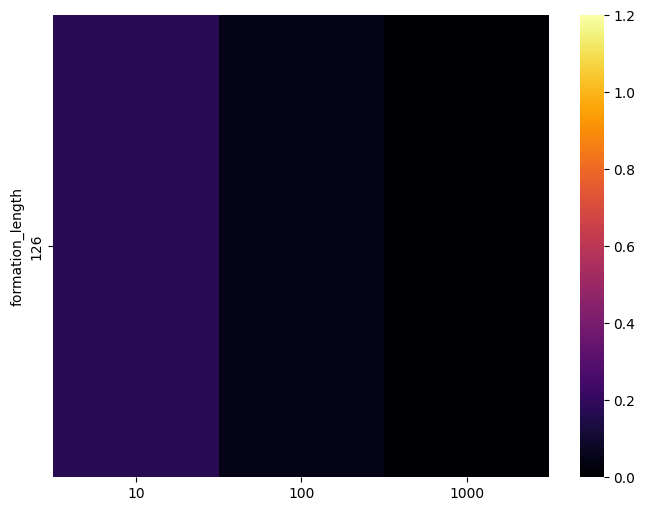

{'t_max': 126, 'window': 14}
(0.02, 0.46)


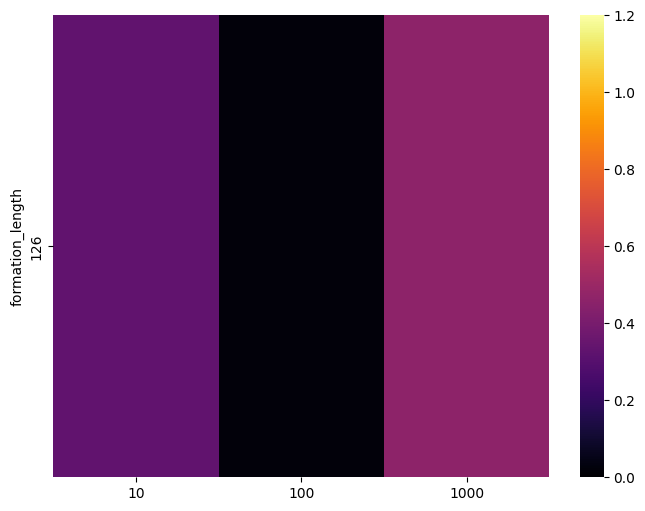

{'t_max': 21, 'window': 2}
(-0.35, 0.75)


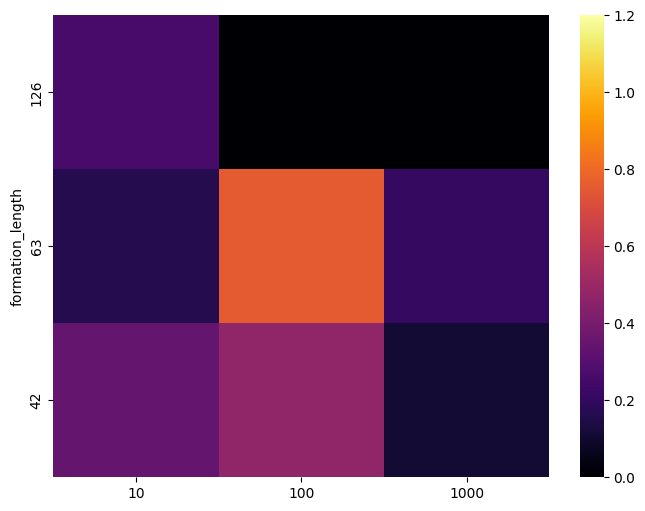

{'t_max': 10, 'window': 21}
(-0.14, 0.33)


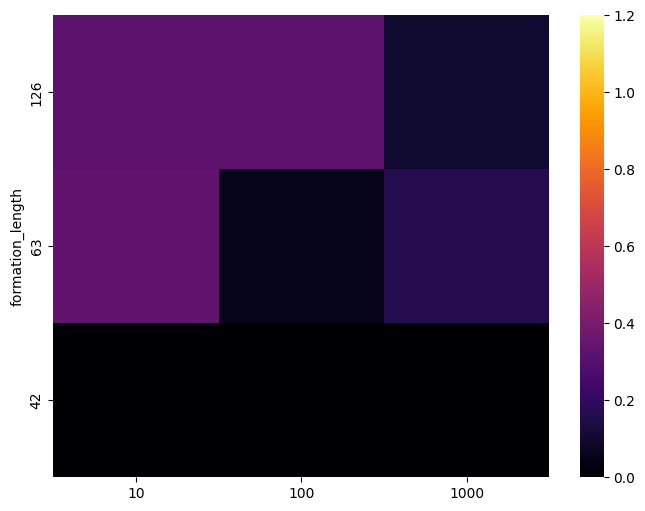

{'t_max': 63, 'window': 4}
(-0.03, 0.65)


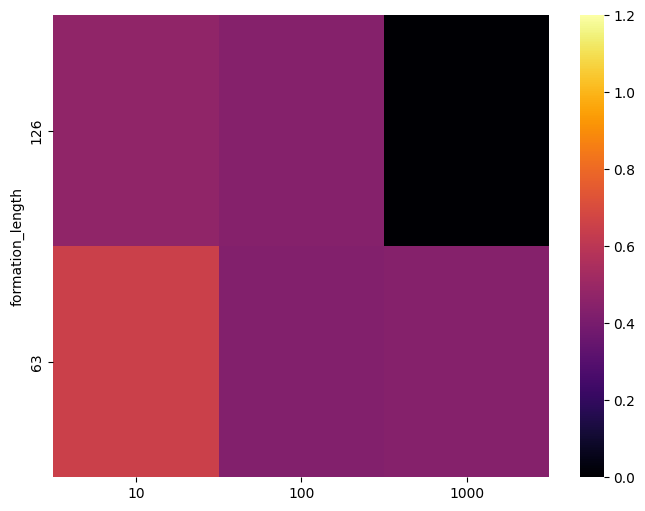

{'t_max': 126, 'window': 42}
(0.04, 0.2)


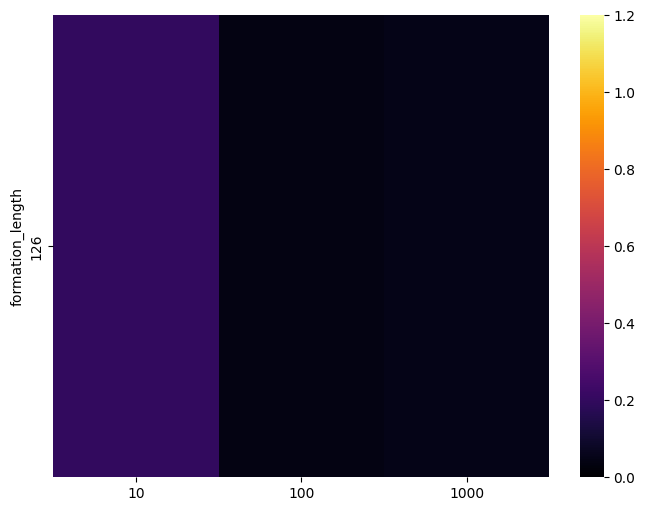

****************************************************************************************************
('formation_length', 'window')


{'n_stocks': 100, 't_max': 21}
(-0.46, 0.84)


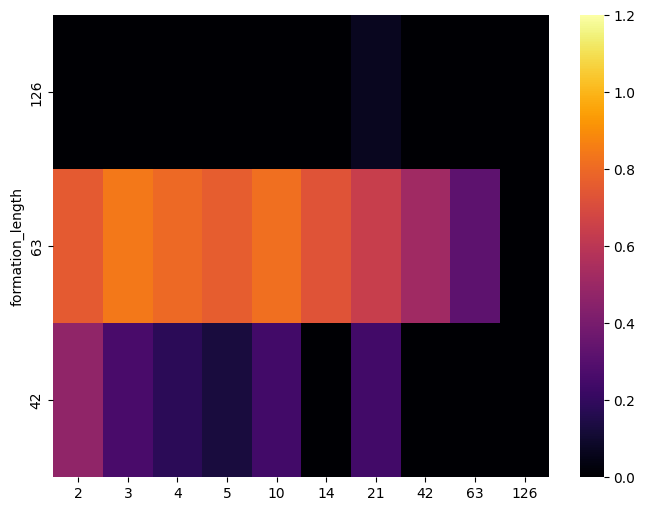

{'n_stocks': 10, 't_max': 14}
(-0.2, 0.52)


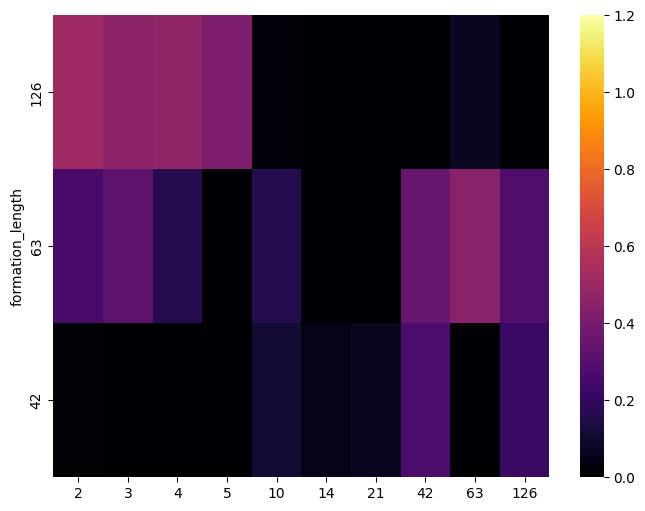

{'n_stocks': 100, 't_max': 42}
(-0.32, 0.52)


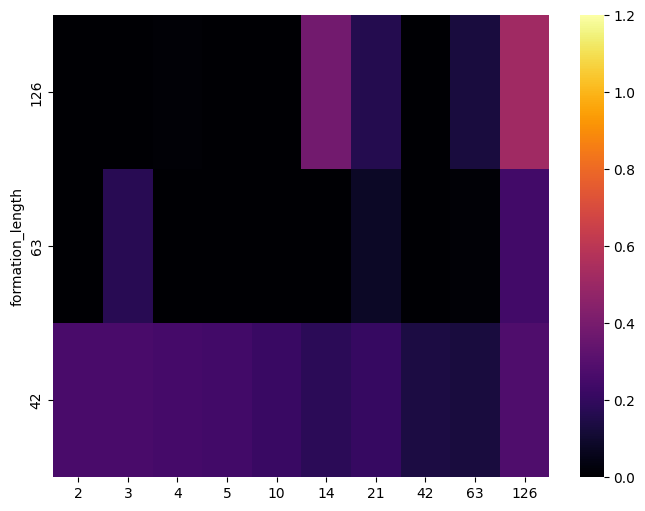

{'n_stocks': 100, 't_max': 10}
(-0.3, 0.45)


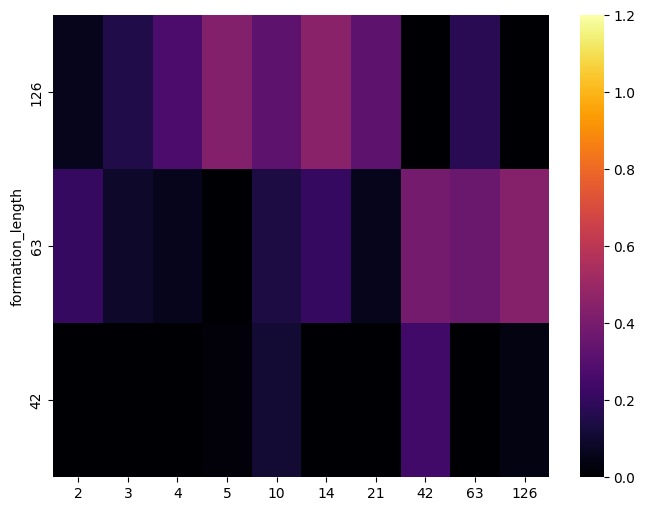

{'n_stocks': 10, 't_max': 63}
(-0.02, 0.89)


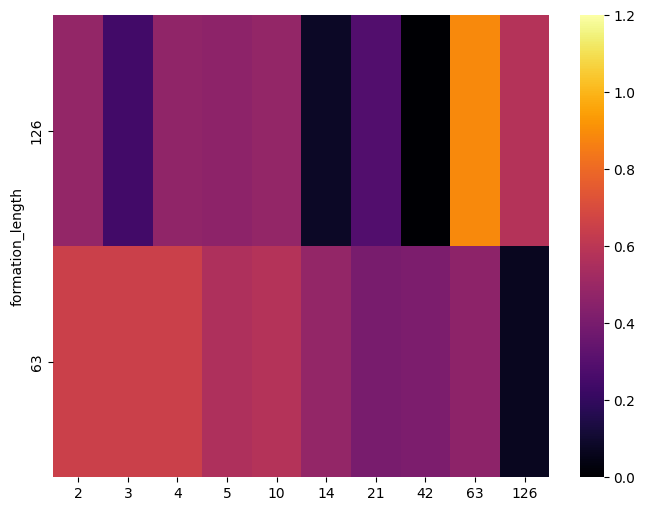

{'n_stocks': 10, 't_max': 21}
(-0.26, 0.34)


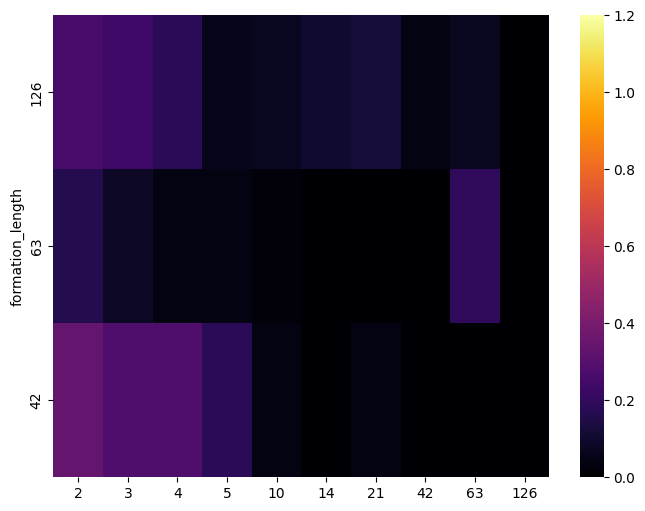

{'n_stocks': 1000, 't_max': 10}
(-0.32, 0.73)


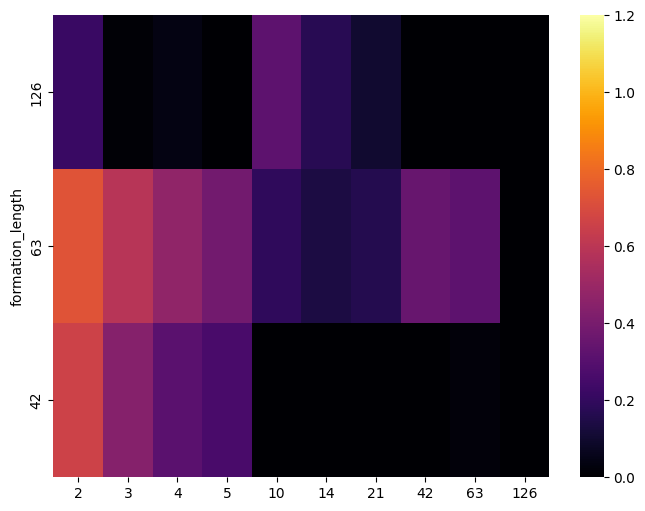

{'n_stocks': 10, 't_max': 42}
(-0.23, 0.58)


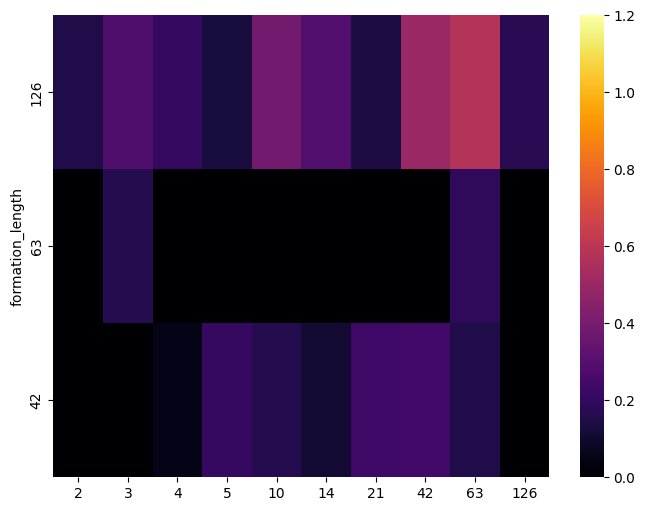

{'n_stocks': 1000, 't_max': 5}
(-0.36, 0.83)


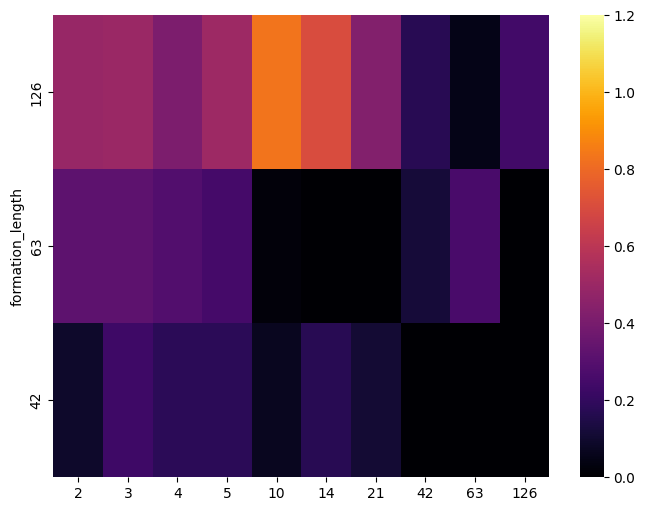

{'n_stocks': 100, 't_max': 63}
(-0.31, 0.5)


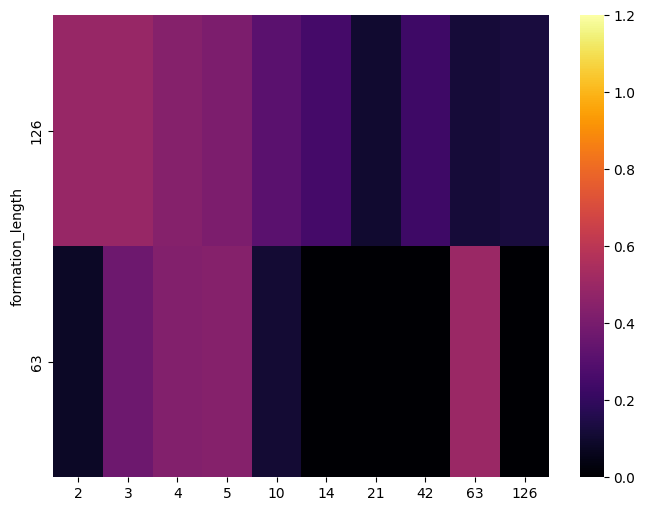

{'n_stocks': 1000, 't_max': 63}
(-0.28, 0.46)


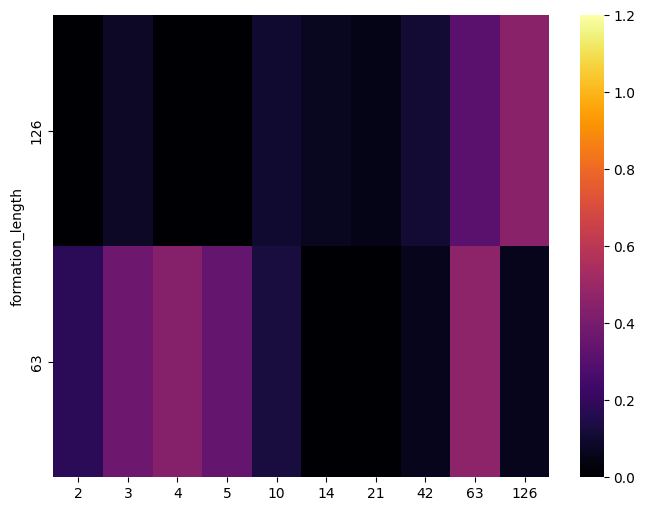

{'n_stocks': 10, 't_max': 5}
(-0.21, 0.82)


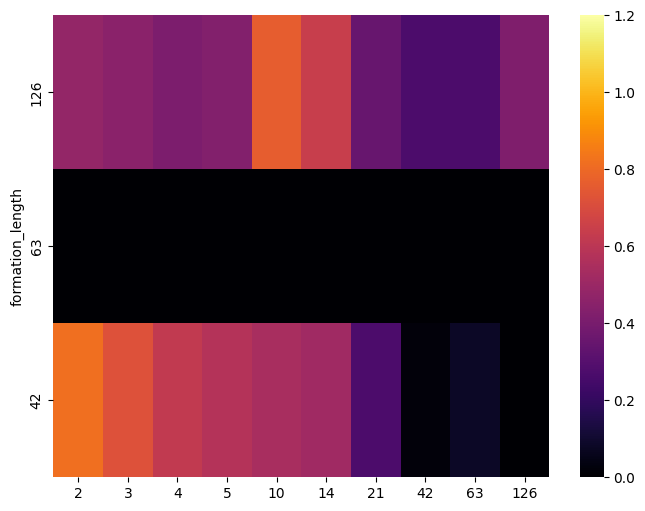

{'n_stocks': 100, 't_max': 5}
(-0.71, 0.53)


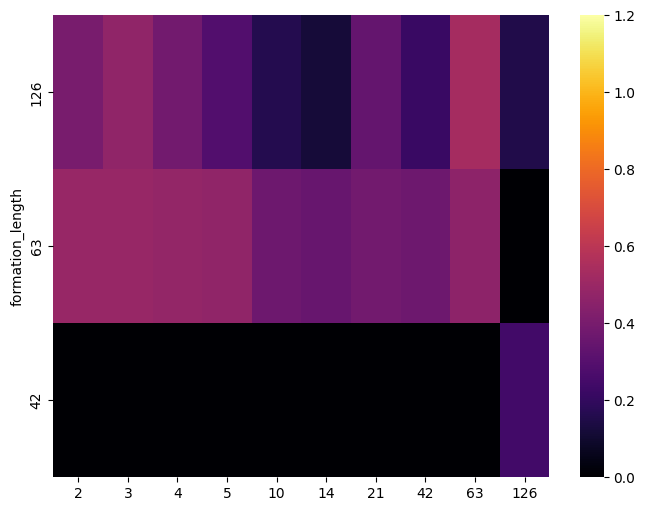

{'n_stocks': 1000, 't_max': 126}
(-0.13, 0.46)


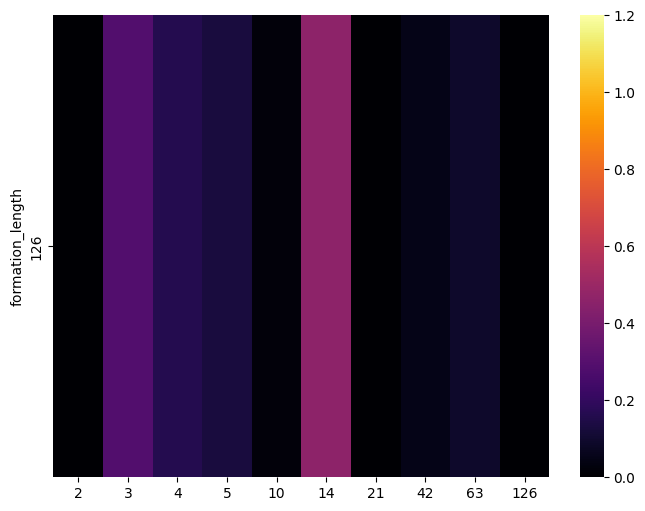

{'n_stocks': 1000, 't_max': 21}
(-0.35, 0.38)


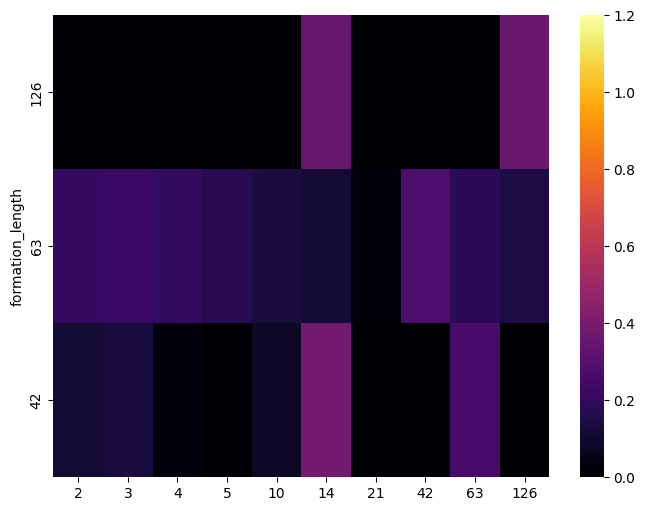

{'n_stocks': 10, 't_max': 10}
(-0.7, 0.48)


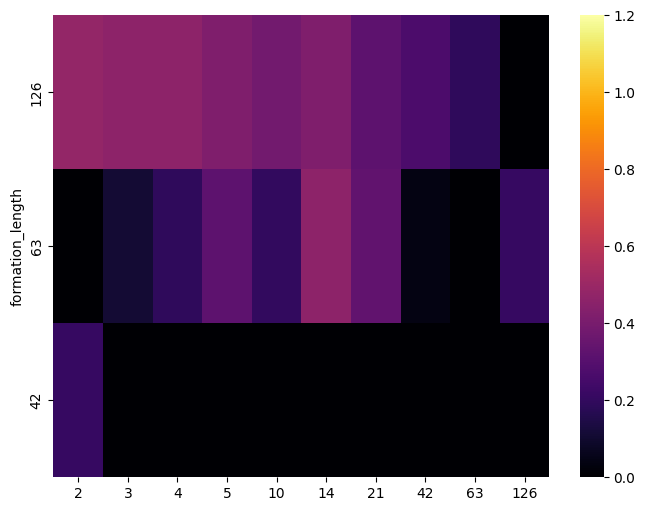

{'n_stocks': 100, 't_max': 14}
(-0.62, 1.01)


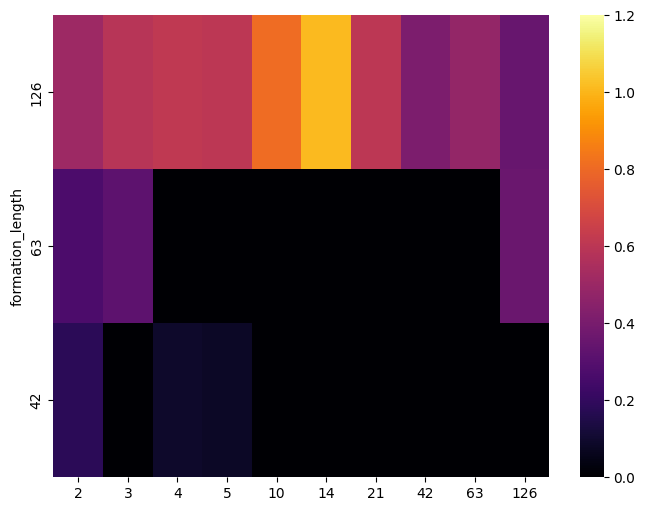

{'n_stocks': 1000, 't_max': 14}
(-0.31, 0.33)


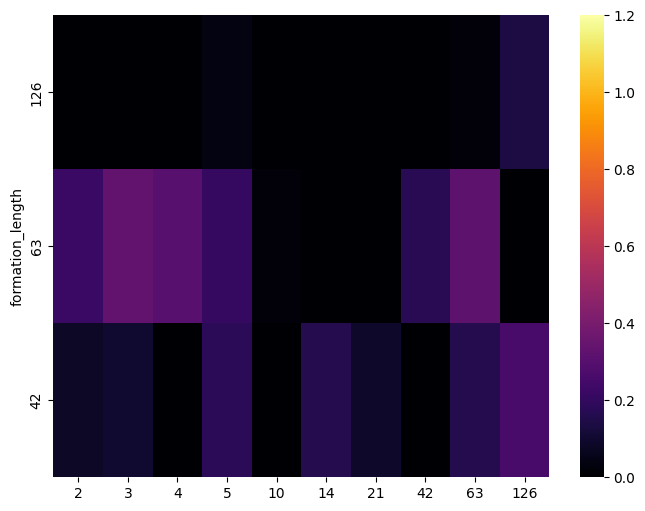

{'n_stocks': 10, 't_max': 126}
(0.06, 0.44)


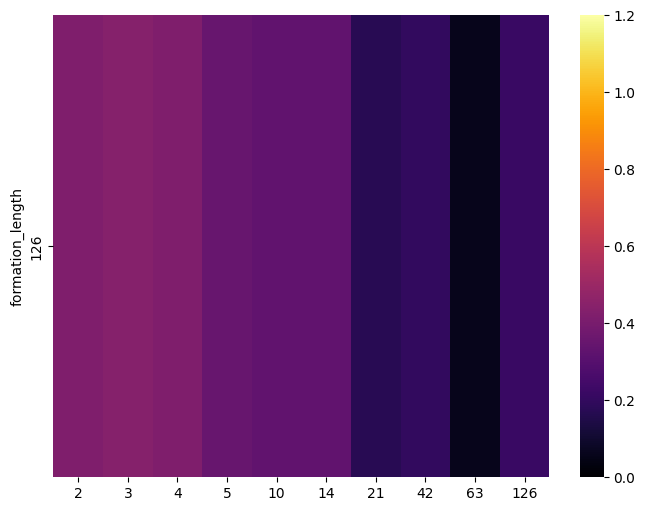

{'n_stocks': 1000, 't_max': 42}
(-0.32, 0.47)


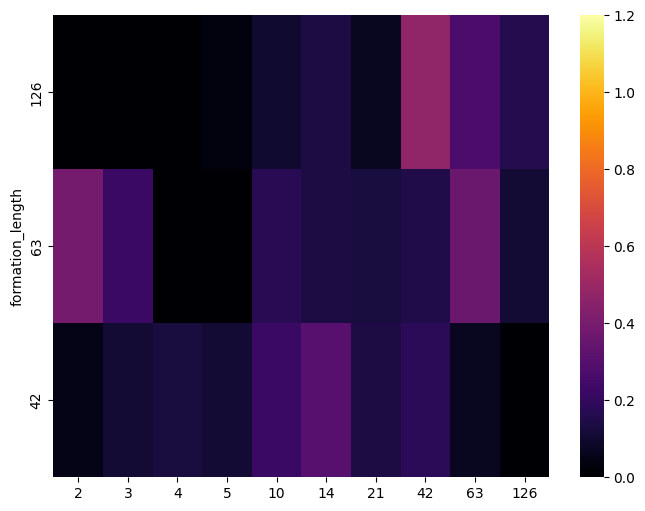

{'n_stocks': 100, 't_max': 126}
(-0.07, 0.6)


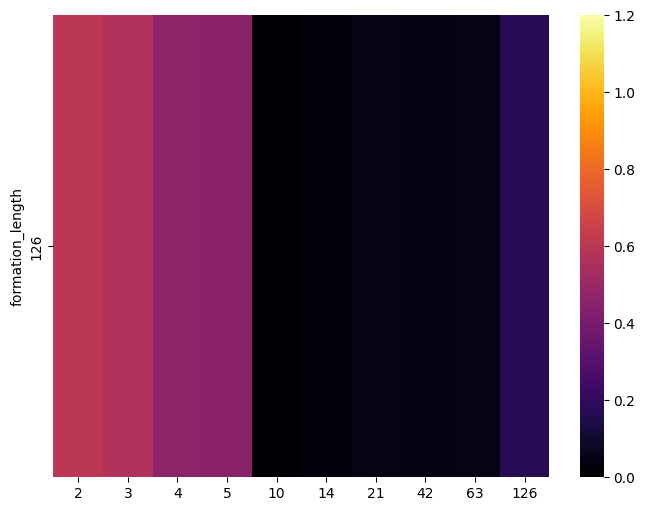

****************************************************************************************************
('t_max', 'n_stocks')


{'formation_length': 63, 'window': 4}
(-0.19, 0.8)


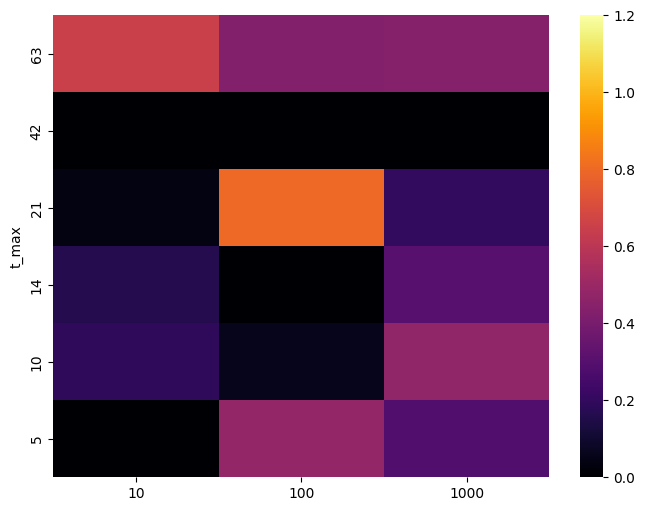

{'formation_length': 63, 'window': 10}
(-0.31, 0.82)


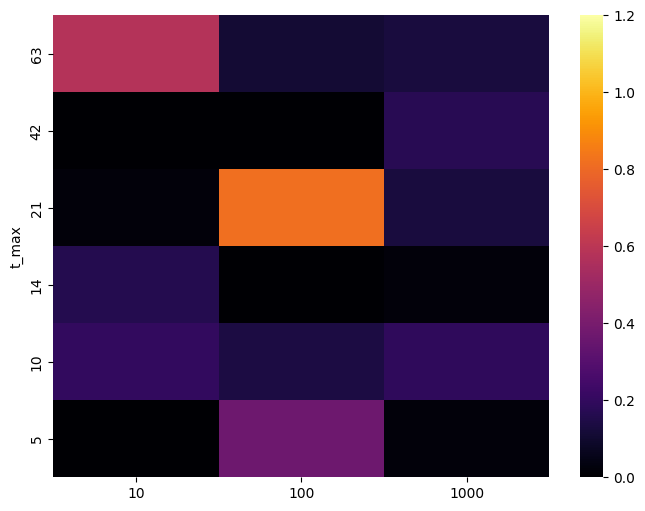

{'formation_length': 126, 'window': 14}
(-0.13, 1.01)


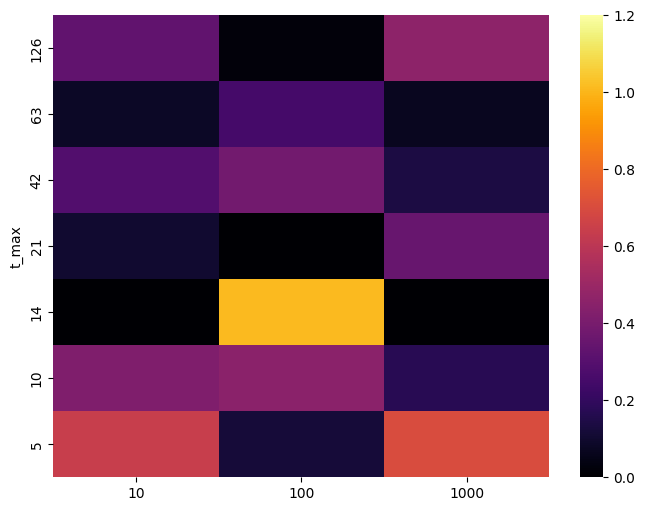

{'formation_length': 63, 'window': 5}
(-0.23, 0.76)


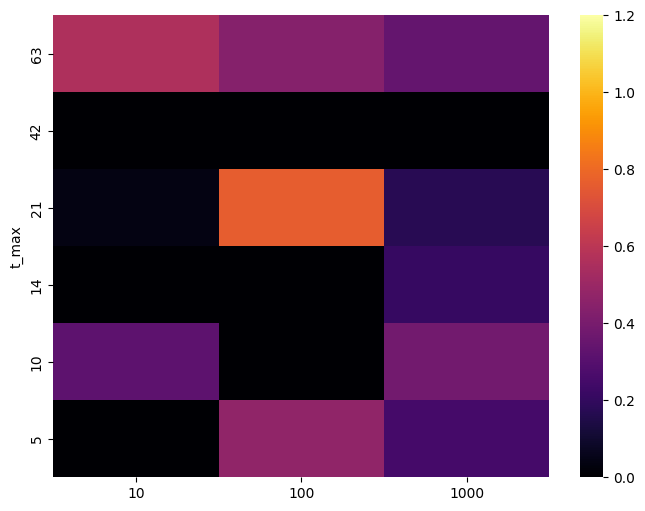

{'formation_length': 126, 'window': 42}
(-0.3, 0.5)


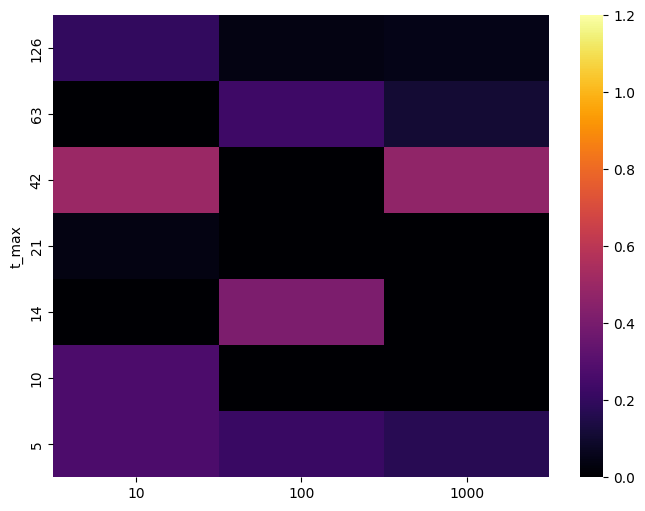

{'formation_length': 42, 'window': 63}
(-0.38, 0.26)


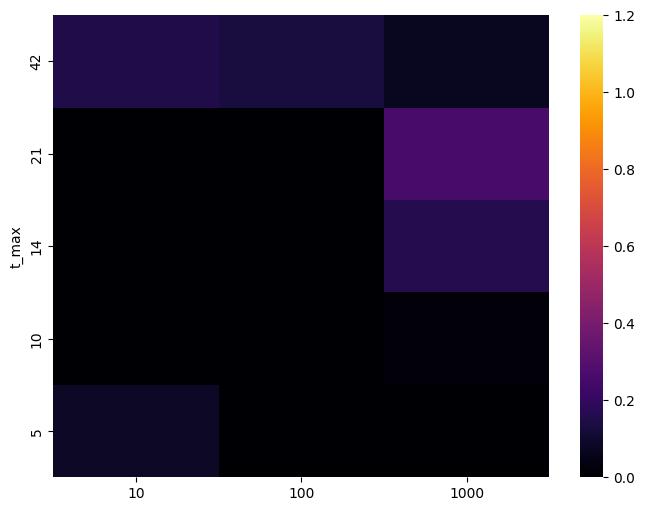

{'formation_length': 126, 'window': 2}
(-0.35, 0.6)


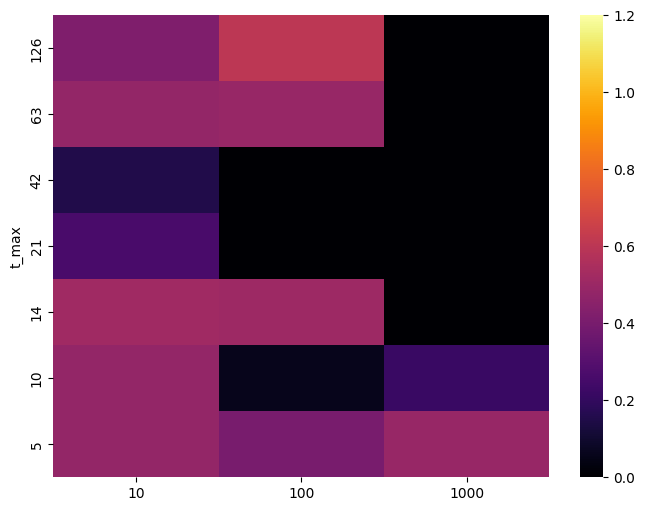

{'formation_length': 42, 'window': 14}
(-0.25, 0.52)


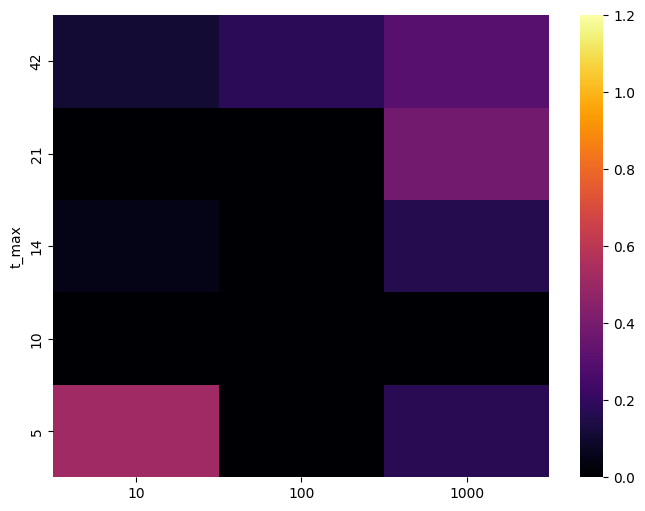

{'formation_length': 126, 'window': 10}
(-0.35, 0.83)


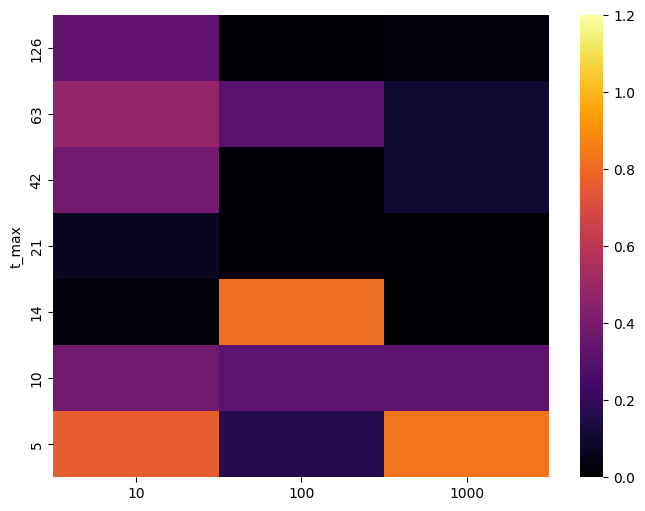

{'formation_length': 126, 'window': 5}
(-0.28, 0.6)


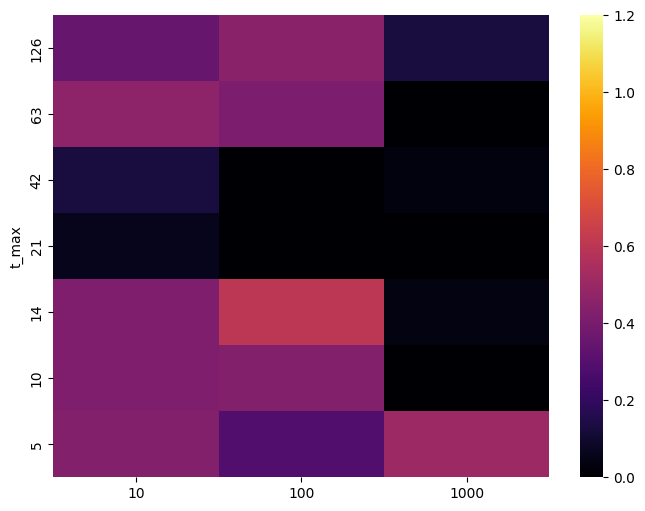

{'formation_length': 42, 'window': 2}
(-0.27, 0.82)


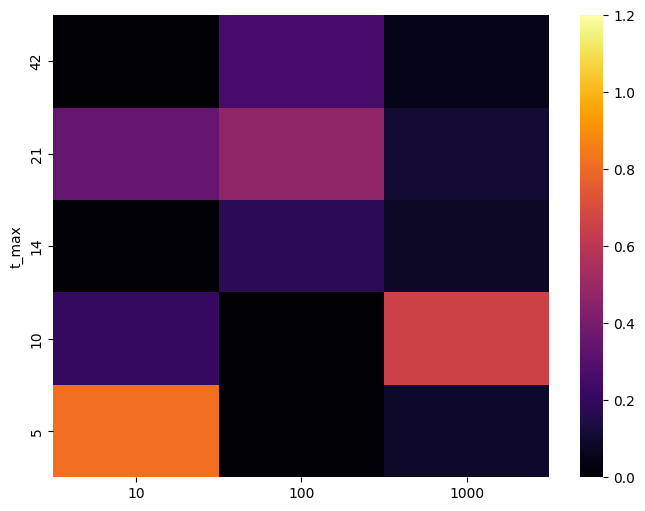

{'formation_length': 126, 'window': 3}
(-0.31, 0.59)


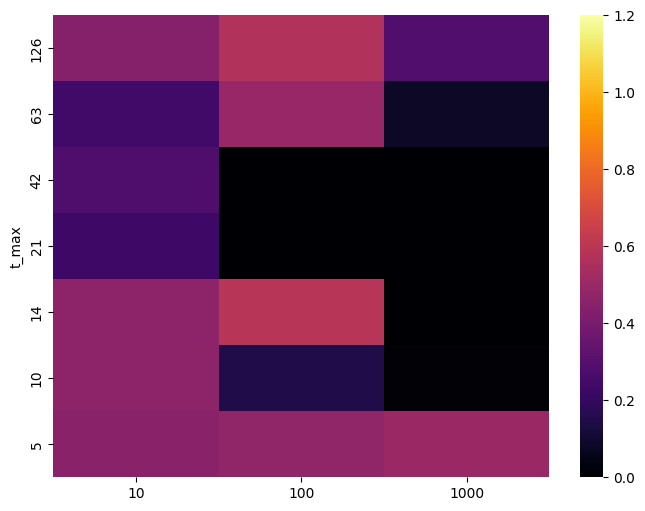

{'formation_length': 126, 'window': 4}
(-0.25, 0.61)


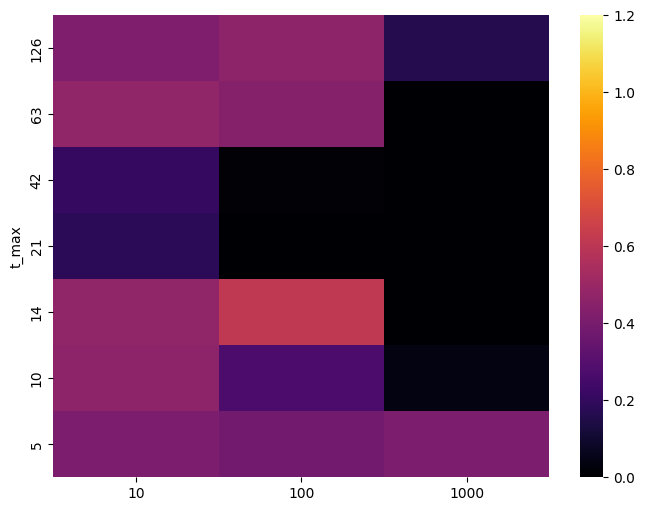

{'formation_length': 42, 'window': 3}
(-0.26, 0.72)


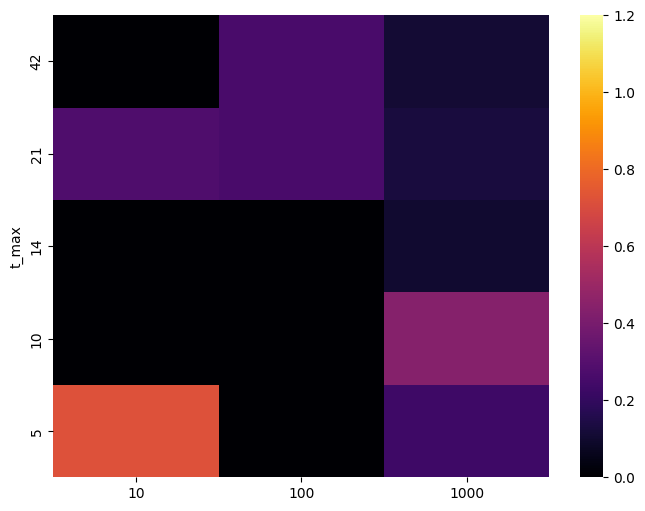

{'formation_length': 63, 'window': 3}
(-0.19, 0.84)


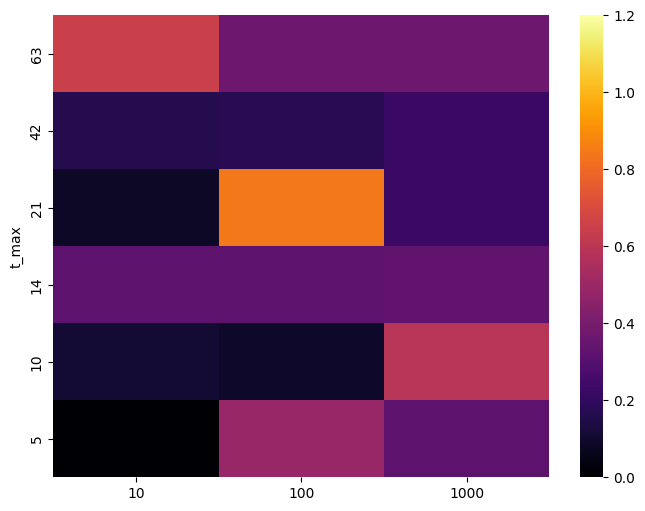

{'formation_length': 126, 'window': 126}
(-0.23, 0.58)


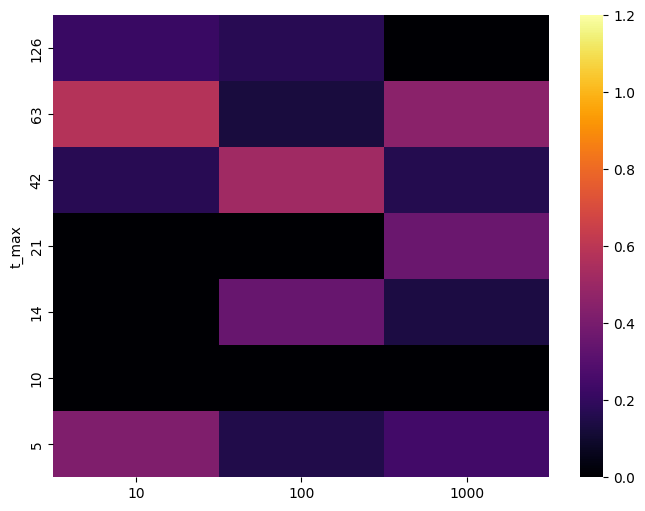

{'formation_length': 42, 'window': 126}
(-0.62, 0.28)


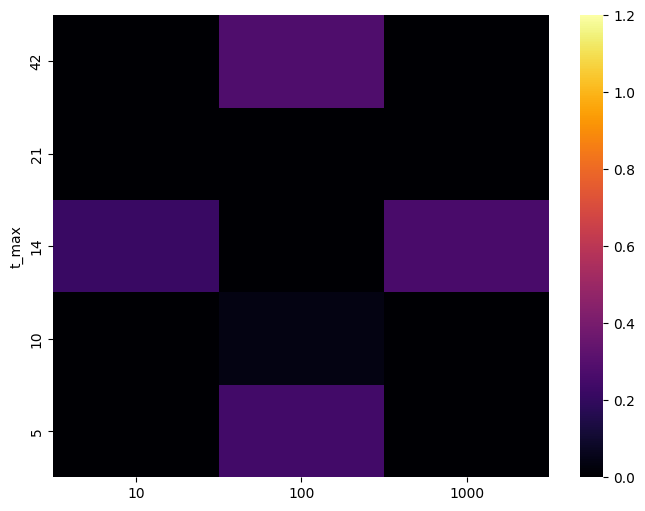

{'formation_length': 42, 'window': 10}
(-0.33, 0.54)


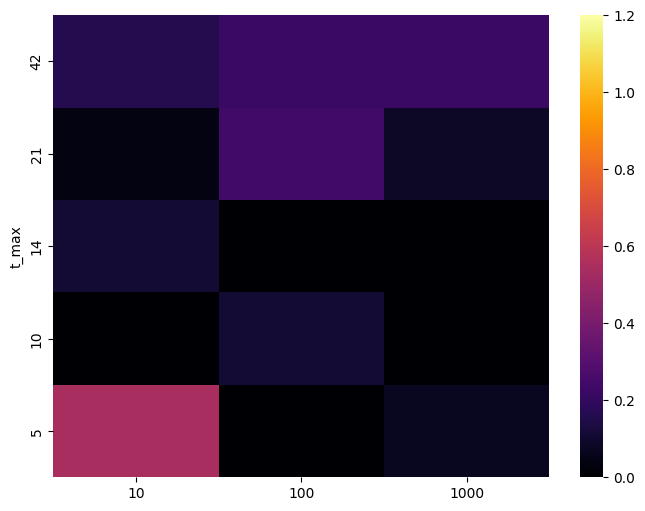

{'formation_length': 63, 'window': 14}
(-0.32, 0.73)


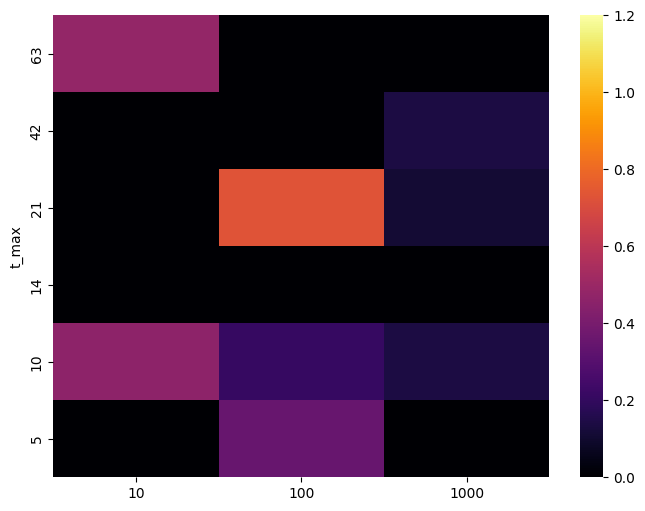

{'formation_length': 63, 'window': 21}
(-0.21, 0.64)


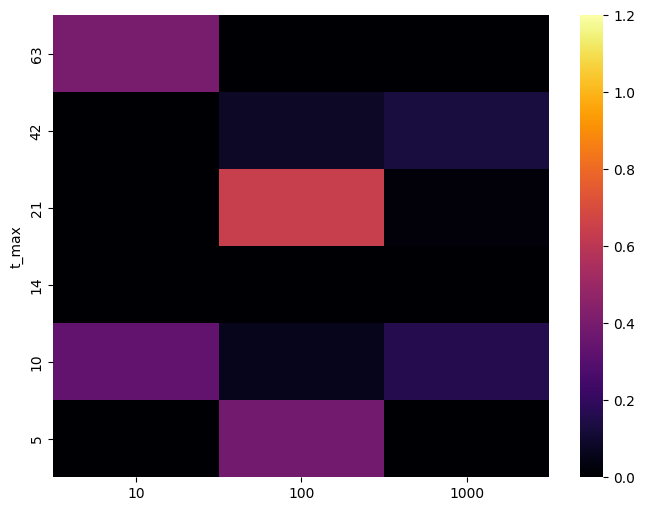

{'formation_length': 42, 'window': 5}
(-0.36, 0.58)


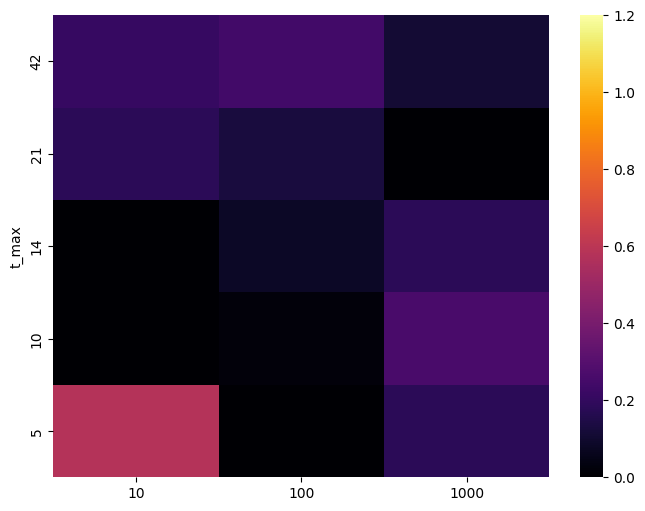

{'formation_length': 126, 'window': 63}
(-0.21, 0.89)


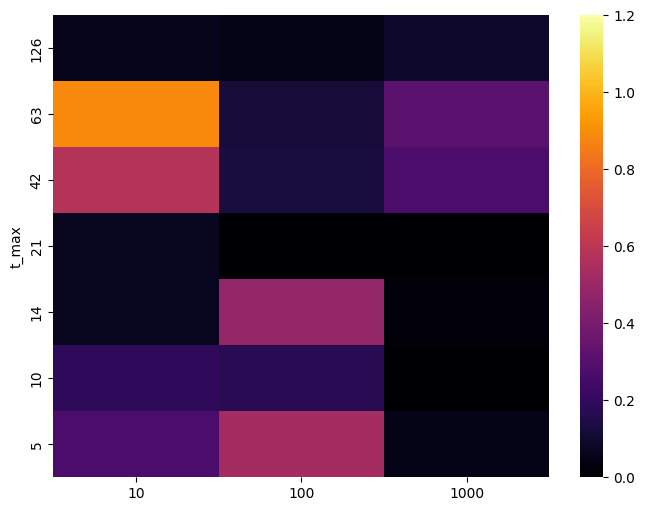

{'formation_length': 63, 'window': 126}
(-0.71, 0.44)


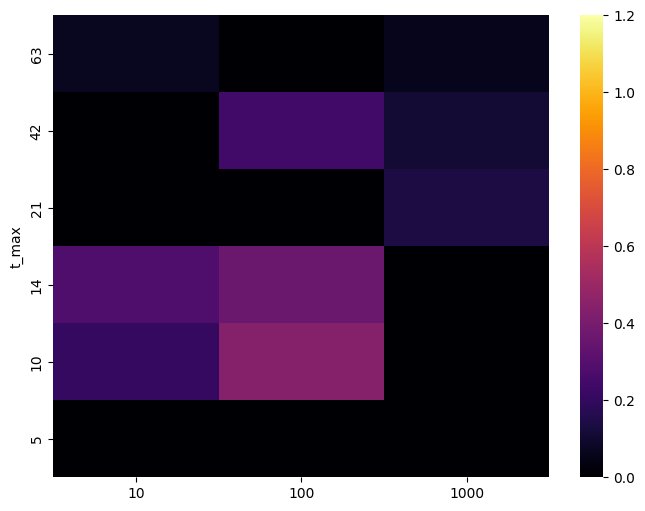

{'formation_length': 42, 'window': 4}
(-0.18, 0.62)


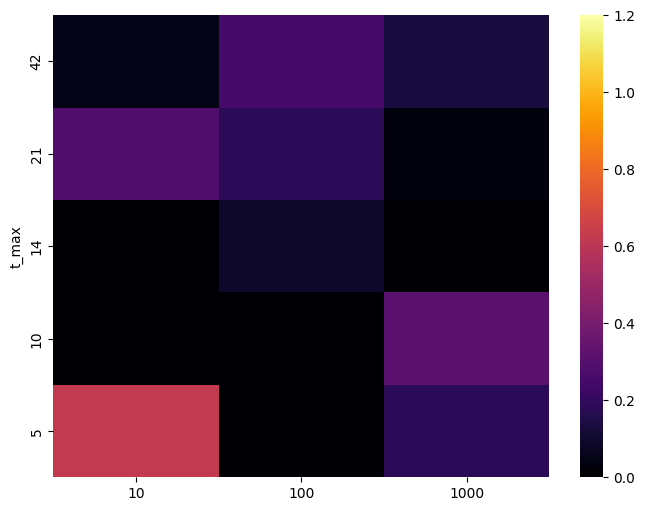

{'formation_length': 63, 'window': 42}
(-0.18, 0.52)


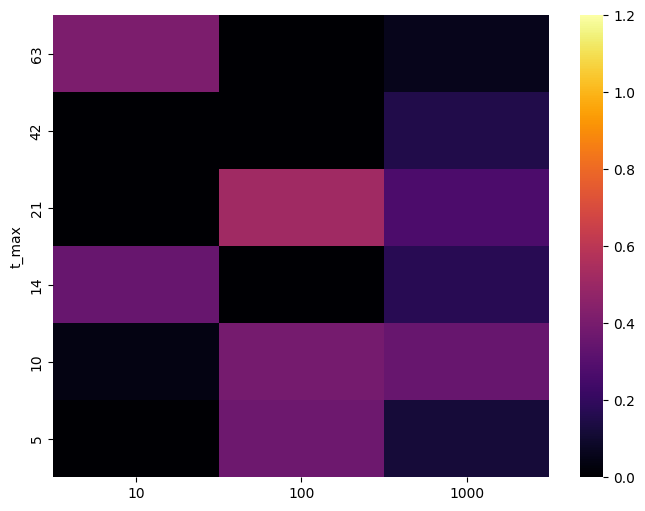

{'formation_length': 126, 'window': 21}
(-0.31, 0.6)


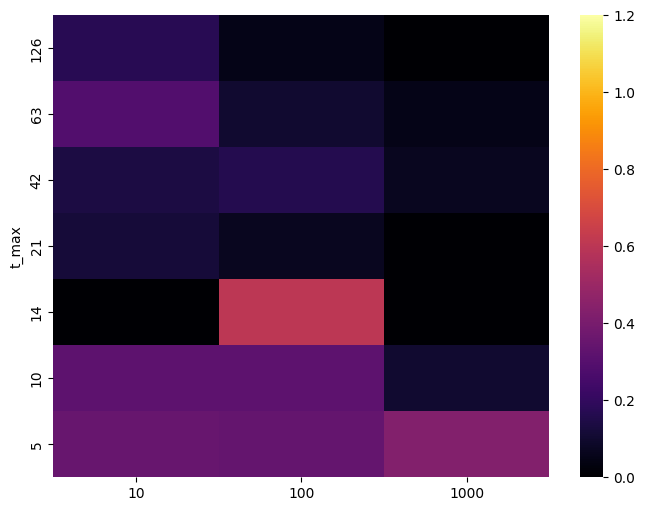

{'formation_length': 63, 'window': 2}
(-0.26, 0.75)


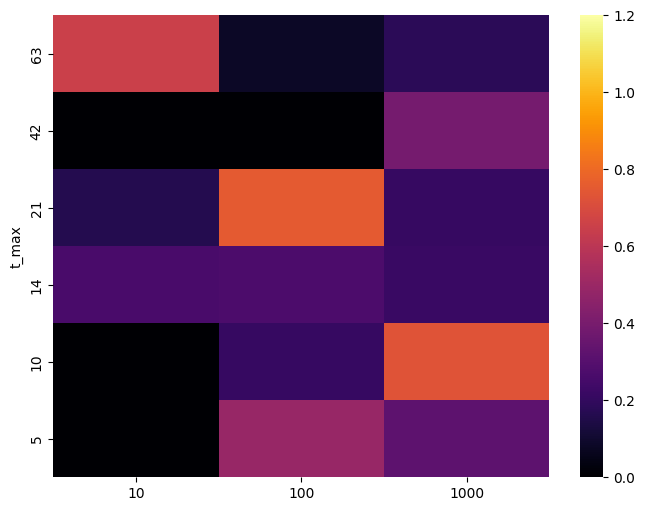

{'formation_length': 42, 'window': 42}
(-0.7, 0.27)


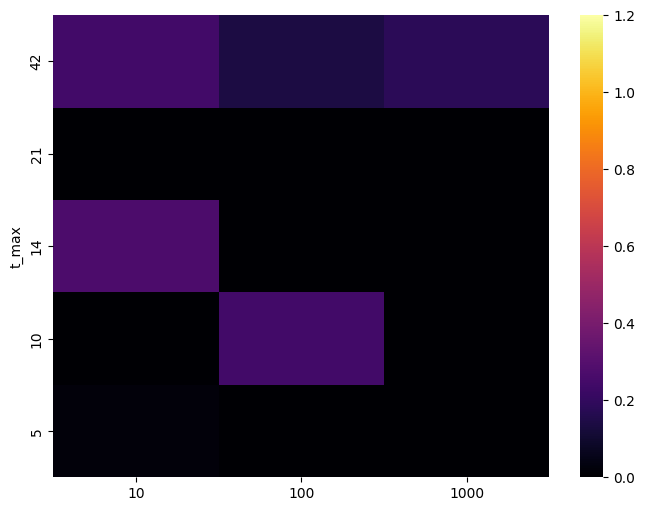

{'formation_length': 63, 'window': 63}
(-0.19, 0.5)


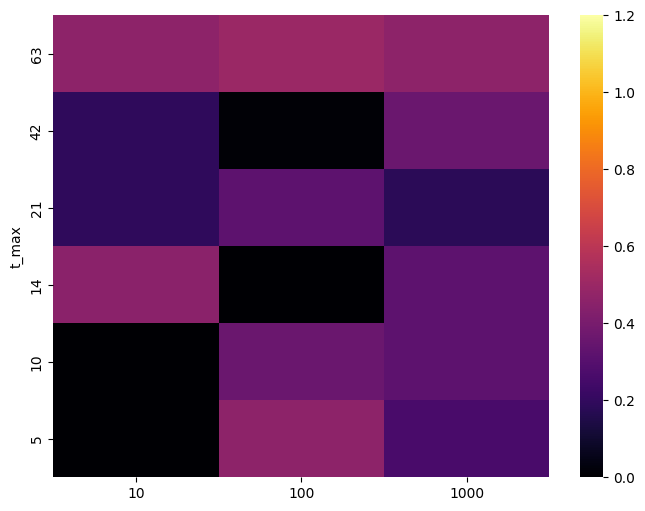

{'formation_length': 42, 'window': 21}
(-0.3, 0.27)


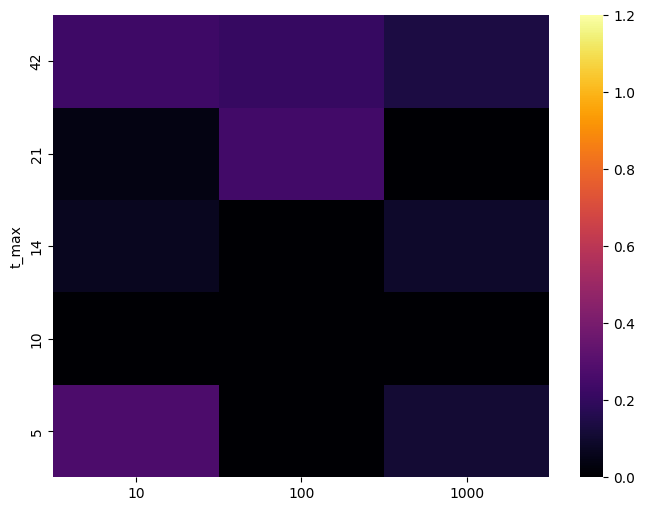

****************************************************************************************************
('t_max', 'window')


{'formation_length': 63, 'n_stocks': 100}
(-0.71, 0.84)


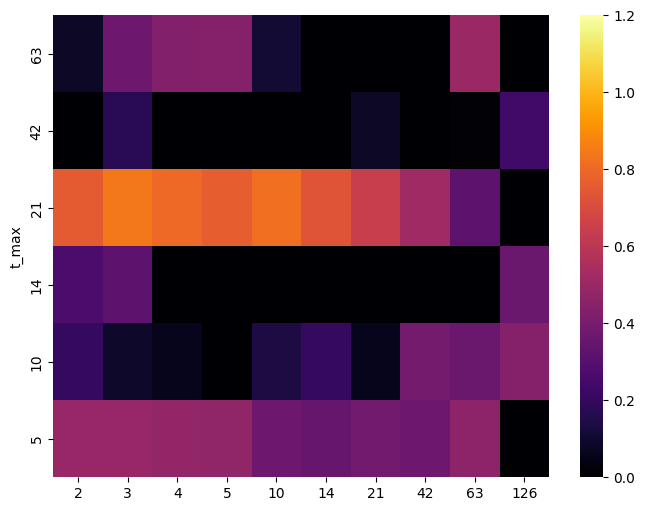

{'formation_length': 63, 'n_stocks': 10}
(-0.25, 0.65)


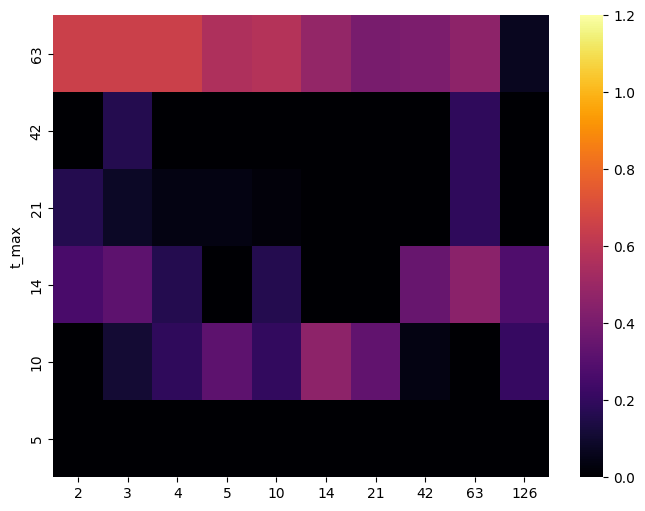

{'formation_length': 126, 'n_stocks': 100}
(-0.35, 1.01)


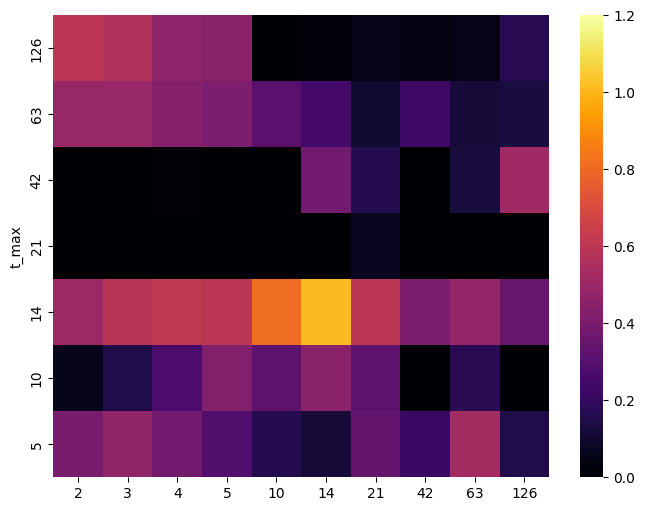

{'formation_length': 126, 'n_stocks': 10}
(-0.2, 0.89)


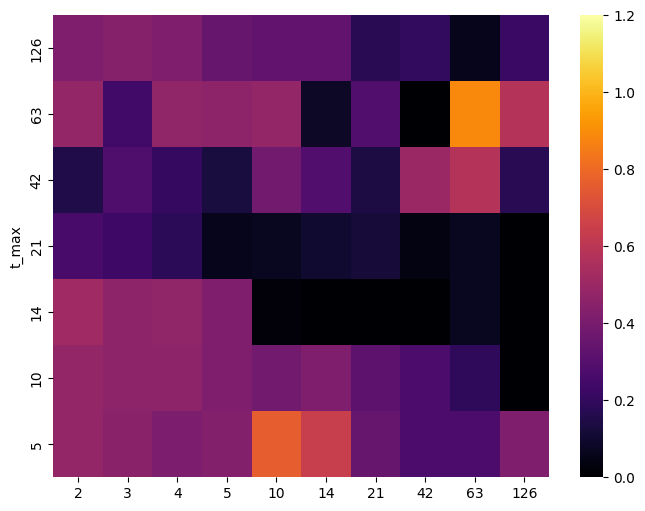

{'formation_length': 42, 'n_stocks': 10}
(-0.7, 0.82)


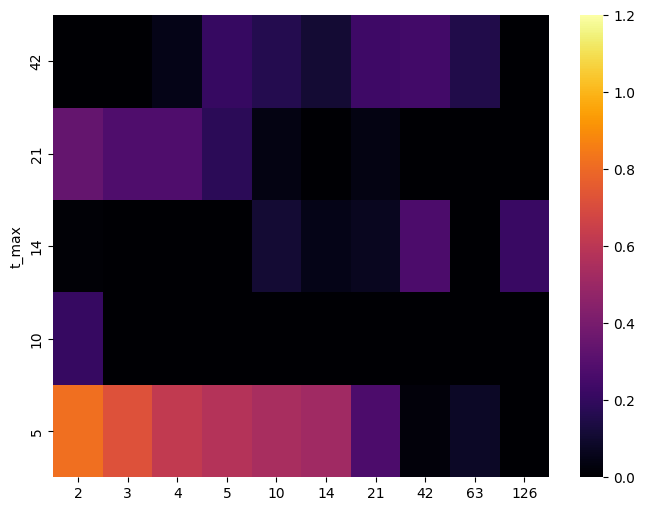

{'formation_length': 126, 'n_stocks': 1000}
(-0.35, 0.83)


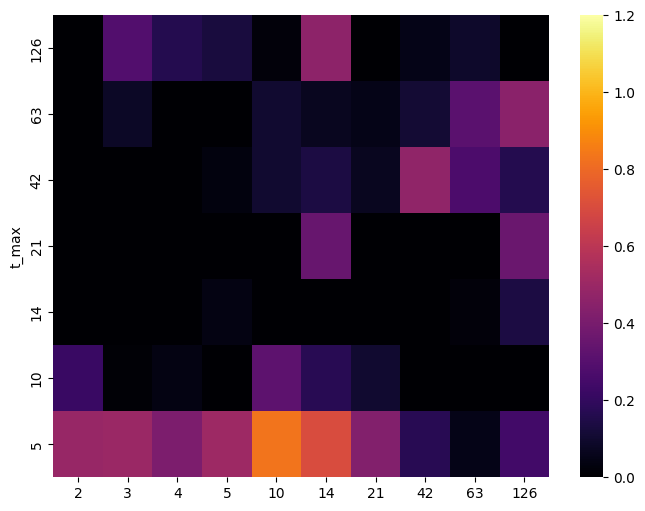

{'formation_length': 63, 'n_stocks': 1000}
(-0.36, 0.73)


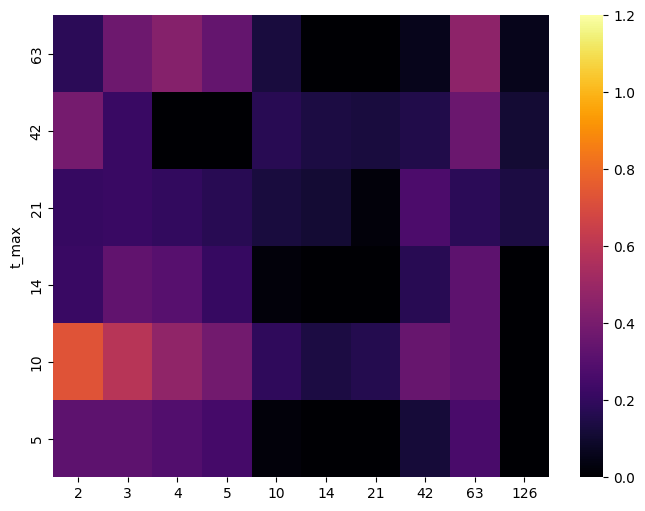

{'formation_length': 42, 'n_stocks': 1000}
(-0.32, 0.66)


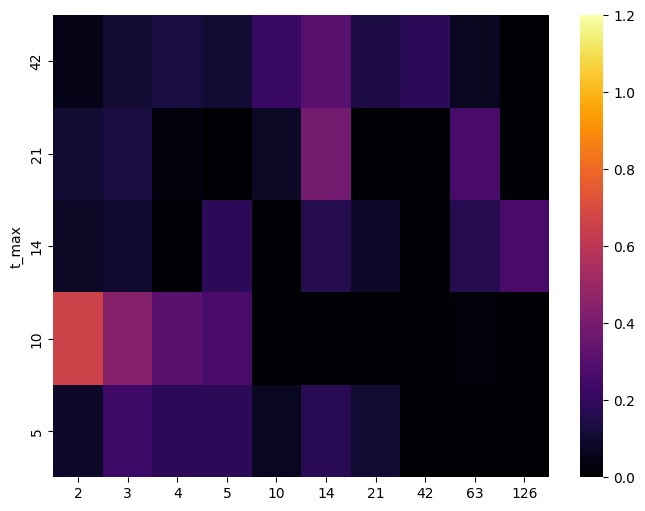

{'formation_length': 42, 'n_stocks': 100}
(-0.62, 0.47)


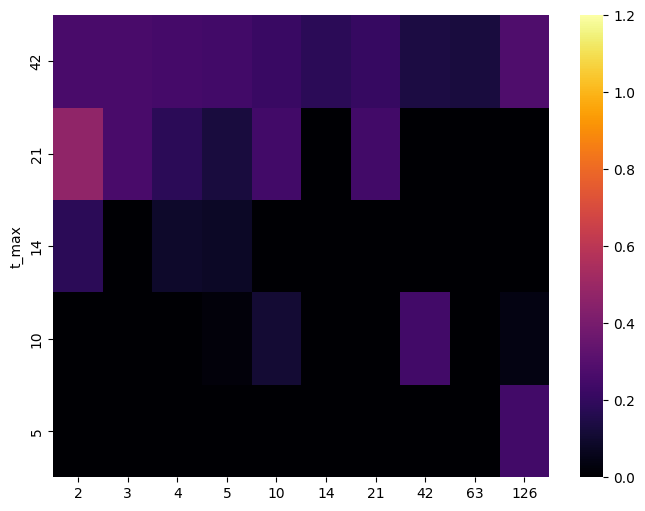

****************************************************************************************************
('n_stocks', 'window')


{'formation_length': 63, 't_max': 21}
(-0.26, 0.84)


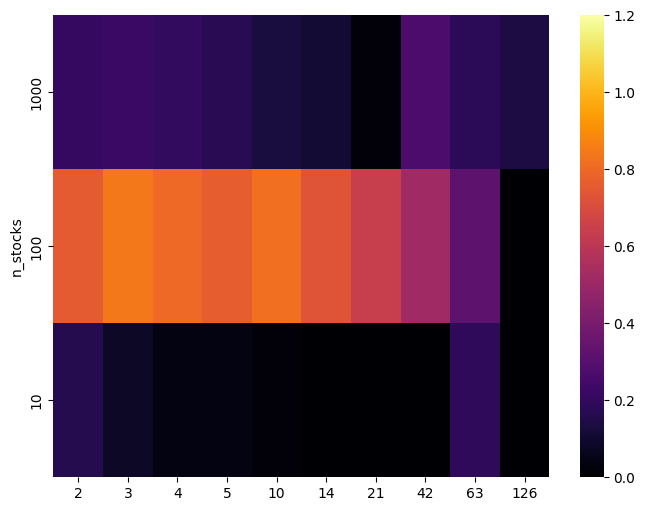

{'formation_length': 63, 't_max': 14}
(-0.2, 0.45)


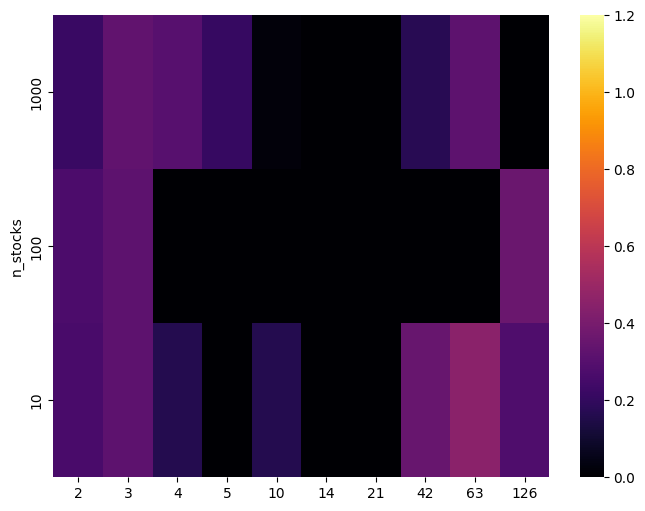

{'formation_length': 126, 't_max': 42}
(-0.3, 0.58)


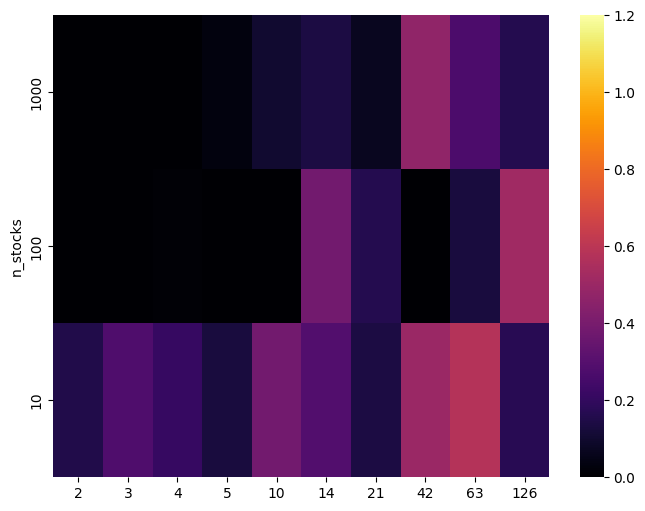

{'formation_length': 63, 't_max': 10}
(-0.22, 0.73)


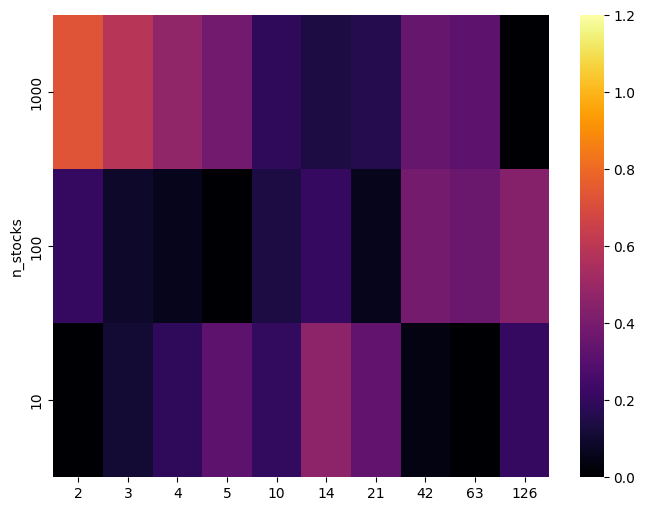

{'formation_length': 126, 't_max': 63}
(-0.28, 0.89)


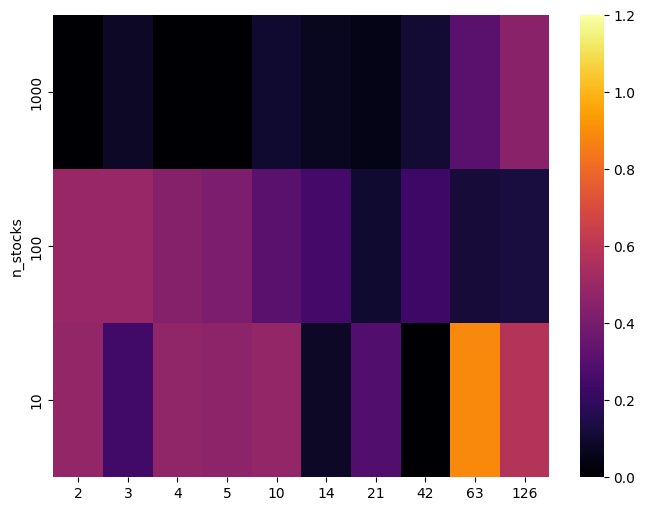

{'formation_length': 42, 't_max': 21}
(-0.46, 0.47)


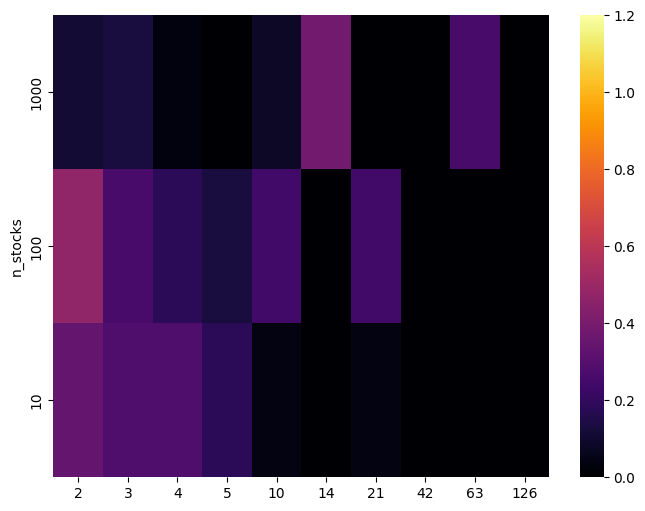

{'formation_length': 126, 't_max': 10}
(-0.23, 0.48)


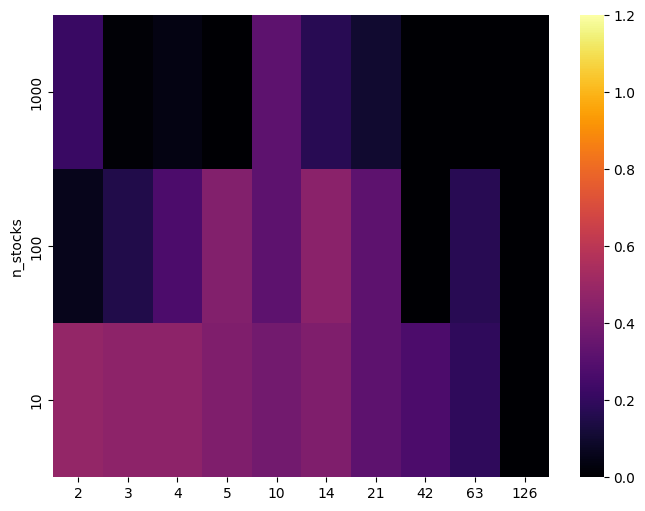

{'formation_length': 42, 't_max': 42}
(-0.32, 0.3)


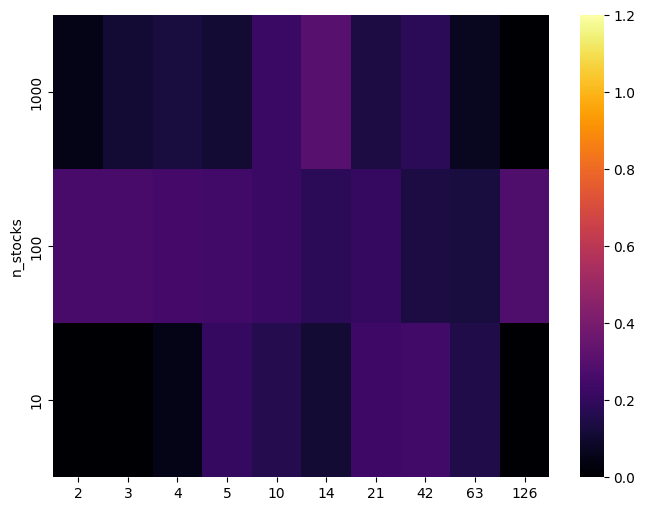

{'formation_length': 63, 't_max': 5}
(-0.71, 0.49)


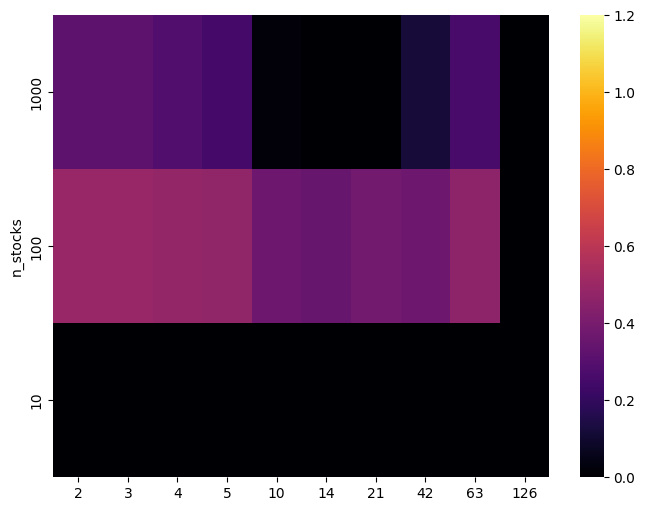

{'formation_length': 42, 't_max': 10}
(-0.7, 0.66)


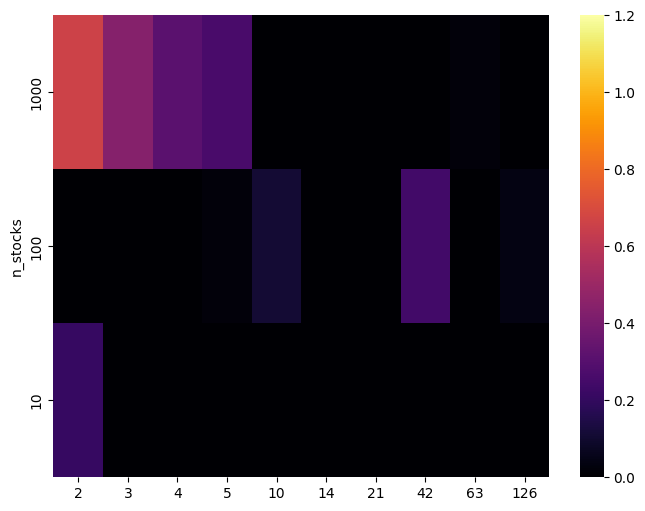

{'formation_length': 42, 't_max': 14}
(-0.62, 0.27)


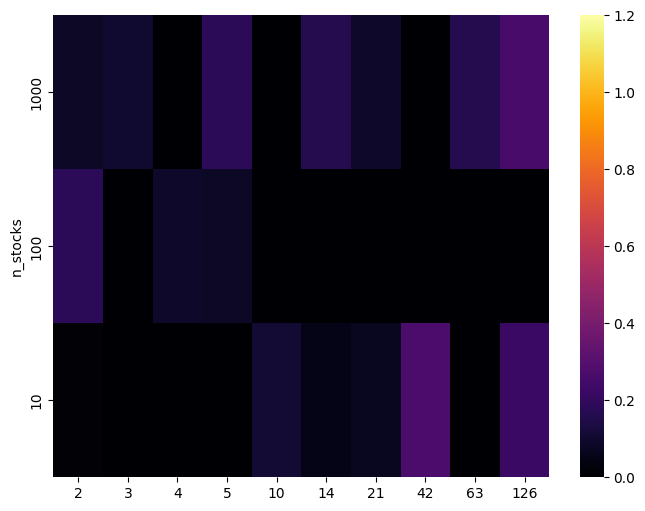

{'formation_length': 126, 't_max': 5}
(0.05, 0.83)


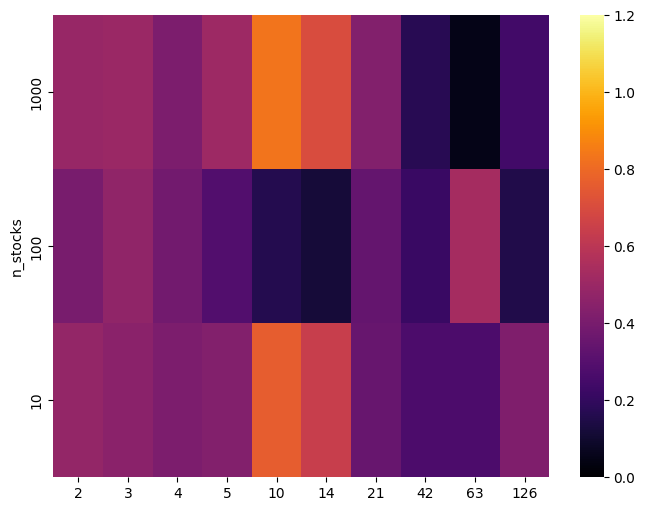

{'formation_length': 126, 't_max': 126}
(-0.13, 0.6)


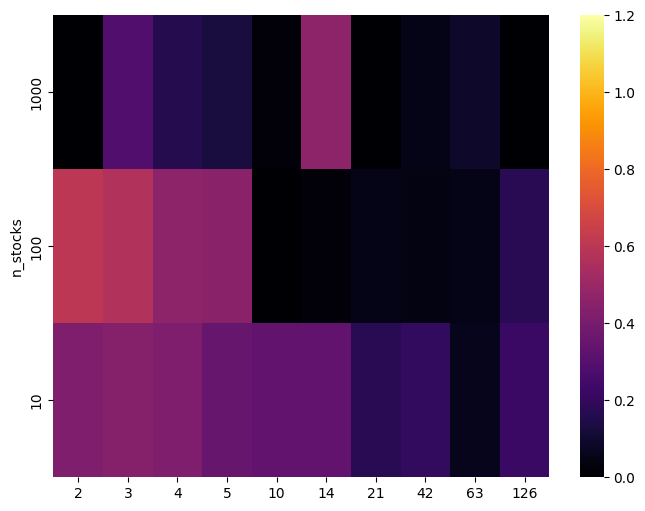

{'formation_length': 126, 't_max': 21}
(-0.35, 0.36)


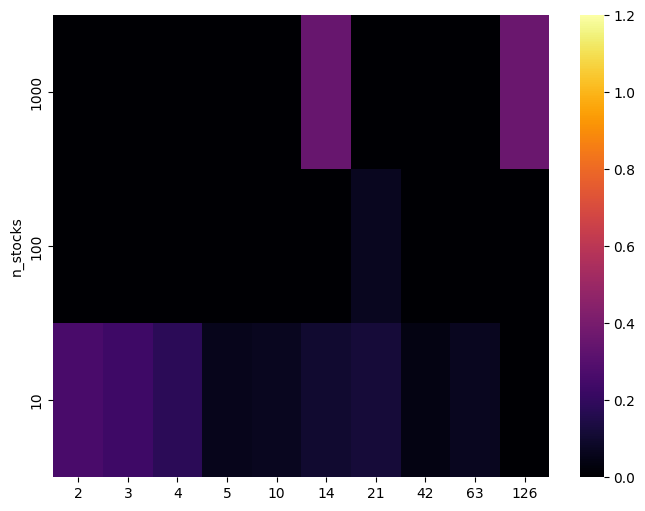

{'formation_length': 63, 't_max': 63}
(-0.31, 0.65)


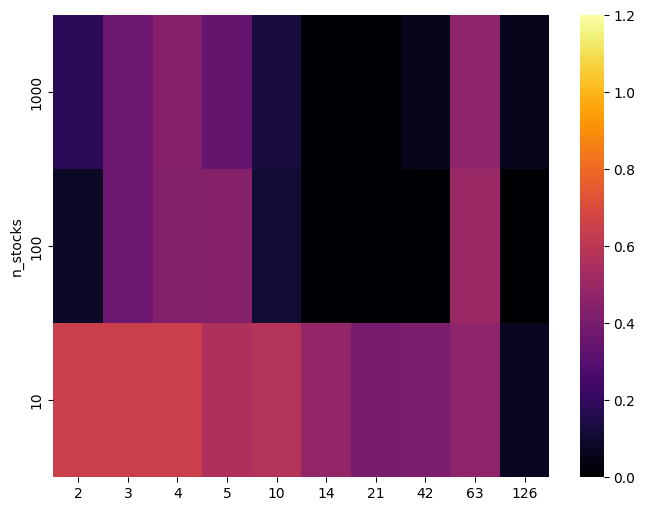

{'formation_length': 126, 't_max': 14}
(-0.31, 1.01)


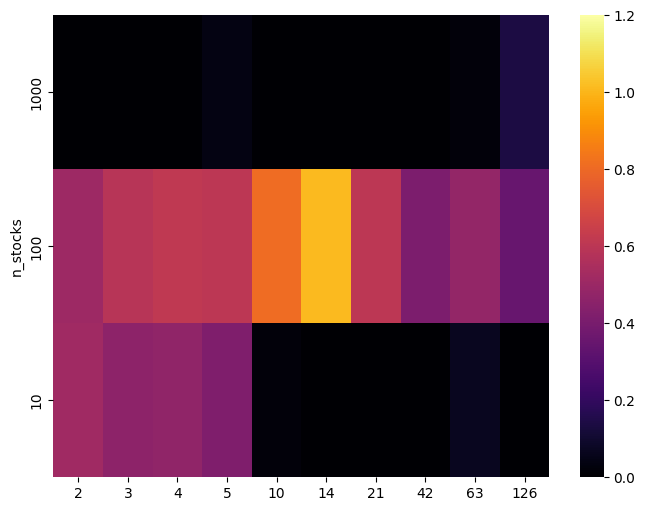

{'formation_length': 63, 't_max': 42}
(-0.32, 0.39)


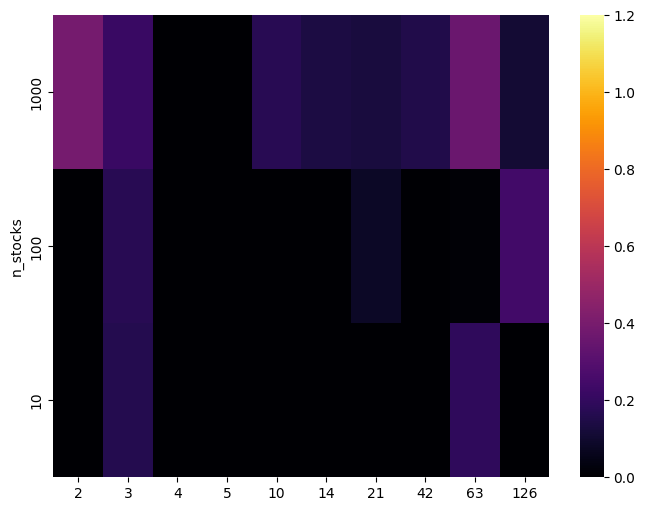

{'formation_length': 42, 't_max': 5}
(-0.53, 0.82)


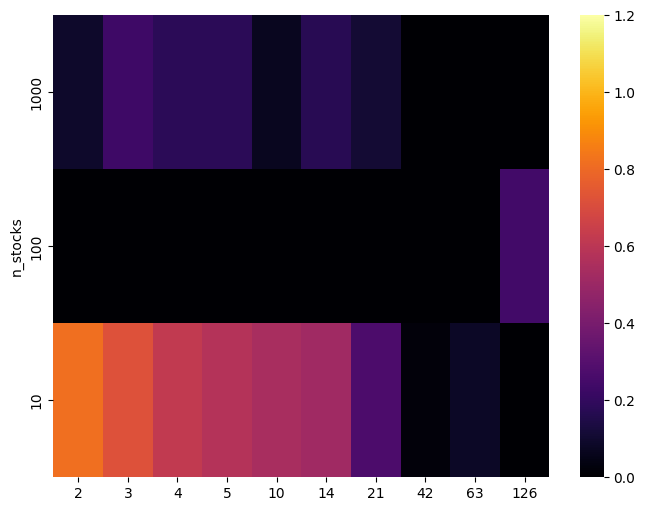

In [12]:
for pair in combinations(hyperparameters_names, 2):
    print('*' * 100)
    print(pair)
    print('\n')
    frozen_names = sorted(set(hyperparameters_names) - set(pair))
    slices = nothing_done.partition_by(frozen_names, as_dict=True)
    for frozen_values, frame in slices.items():
        print(dict(zip(frozen_names, frozen_values)))
        print(
            frame.select(
                pl.col('sharpe').min().alias('min'),
                pl.col('sharpe').max().alias('max'),
        ).row(0))
        values = pivot_to_pd(frame, *pair, 'sharpe').sort_index(ascending=False)
        values = values.reindex(sorted(values, key=int), axis=1)
        plt.figure(figsize=(8, 6))
        heatmap(values, cmap='inferno', vmin=0.0, vmax=1.2)
        plt.show()

# It is very unstable...

In [17]:
nothing_done.select('sharpe', 'path_preprocessing').sort('sharpe').tail().rows()

[(0.82, 'preprocessing/280.parquet'),
 (0.83, 'preprocessing/1688.parquet'),
 (0.84, 'preprocessing/362.parquet'),
 (0.89, 'preprocessing/1576.parquet'),
 (1.01, 'preprocessing/210.parquet')]